# AA Project  - Learning about Pet Adoption using PetFinder.my Dataset

##### Machine Learning / Aprendizagem Automática

##### Sara C. Madeira, 2024/25

## Task 0 - Exploratory Data Analysis

## 0.1. Loading Data

In [6]:
import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)


In [7]:
#LIBS
import pandas as pd 

breeds = pd.read_csv("data/raw/breed_labels.csv")
colors = pd.read_csv("data/raw/color_labels.csv")
states = pd.read_csv("data/raw/state_labels.csv")
df = pd.read_csv("data/raw/PetFinder_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/breed_labels.csv'

## 0.2. Understanding Data

In this task you should **understand better the features**, their distribution of values, potential errors, etc and plan/describe what data preprocessing steps should be performed next. Very important also is the distribution of values in the target (class distribution). 

Here you can find a notebook with some examples of what you can do in **Exploratory Data Analysis**: https://www.kaggle.com/artgor/exploration-of-data-step-by-step/notebook. You can also use Orange widgets for this.

- Observe features and their interactions;.
- Their distribution of values.
- Potential errors.
- **Plan/ describe what data preprocessing**.
- Observe class distribution too!!!



In [3]:
# =========================================================
# 1. Imports & Setup
# =========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline if you're using Jupyter Notebook
get_ipython().run_line_magic('matplotlib', 'inline')

# Use a specific style for your plots
plt.style.use('ggplot')

# Set Pandas display options with fully qualified names
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)


#### Basic info about the dataset

First we processed to check the number of non null features in each row. Straight off the bat we can discern that most nulls are encased in the "Name" and "Description" features (number is lower than 14993).

In [4]:
print("DataFrame Shape:", df.shape)
print("\n--- DataFrame Info ---")
df.info()

DataFrame Shape: (14993, 24)

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 1

Description column adds a lot of volume to each row, dropping it out just for visualization.

In [5]:
# Preview first few rows
df.drop('Description', axis=1).head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,850a43f90,3.0,2


#### Descriptive Statistics

We plotted the various features, to see possible correlations and dynamics in the data.

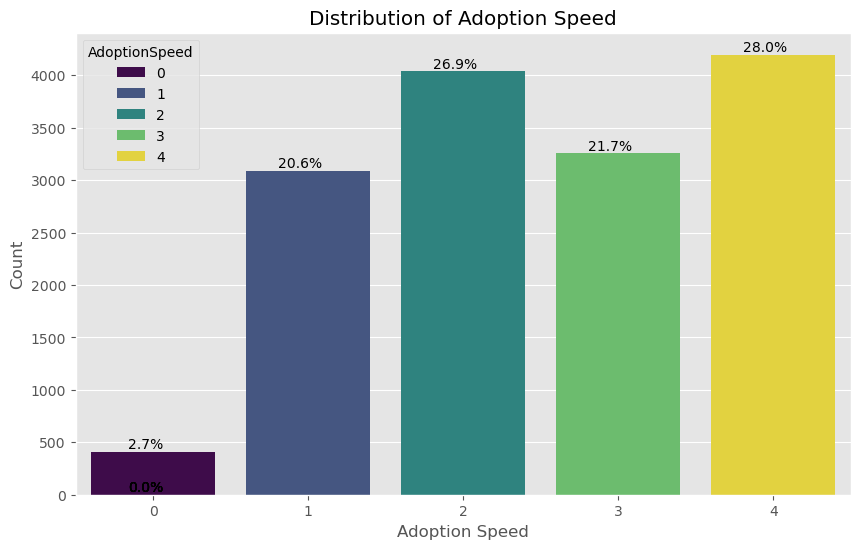

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots are displayed inline if you're using Jupyter Notebook
get_ipython().run_line_magic('matplotlib', 'inline')

# Use a specific style for your plots
plt.style.use('ggplot')

# Set figure size for all plots
plt.rcParams['figure.figsize'] = (5, 2)

# Distribution of AdoptionSpeed
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='AdoptionSpeed', data=df, palette='viridis', hue='AdoptionSpeed')
# Calculate percentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of Adoption Speed')
plt.xlabel('Adoption Speed')
plt.ylabel('Count')
plt.show()


This doesnt take in account the pets in registration with no AdoptionSpeed?

In [7]:
# Count the number of occurrences of the value 4 in the AdoptionSpeed column
null_adoption_speed_count = df['AdoptionSpeed'].value_counts().get(4, 0)
null_adoption_speed_count

4197

There are in fact pets with Null adoption speeds! 


Also it's of note that there are NO pets in this dataset that waited between 90 and 100 days and the time duration of each category is not the same. 


For instance, class 0 is just one day interval while class 1 includes one week and class 3 includes a 60-days.

#### Fees

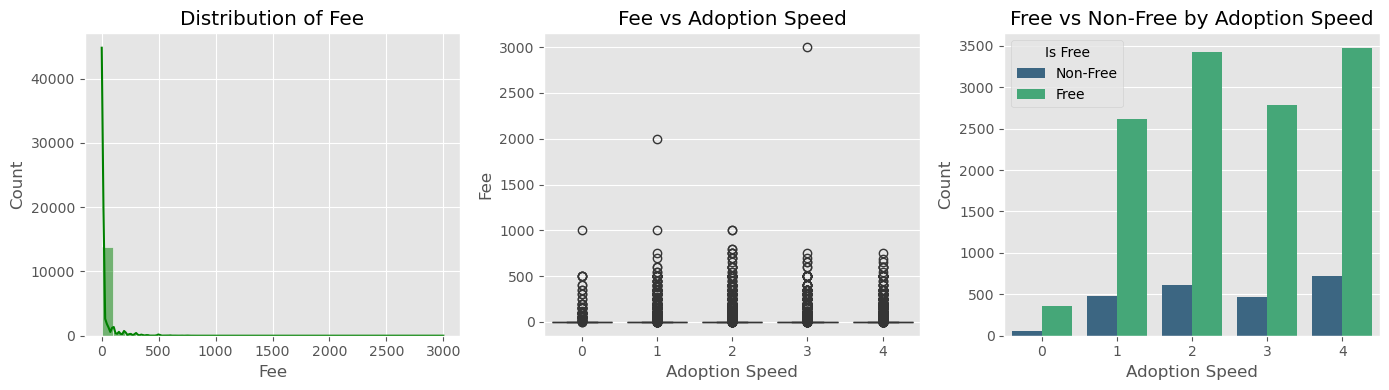

In [8]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Distribution of Fee
sns.histplot(df['Fee'], bins=30, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribution of Fee')
axes[0].set_xlabel('Fee')
axes[0].set_ylabel('Count')

# Fee vs AdoptionSpeed
sns.boxplot(x='AdoptionSpeed', y='Fee', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Fee vs Adoption Speed')
axes[1].set_xlabel('Adoption Speed')
axes[1].set_ylabel('Fee')

# Free vs Non-Free by Adoption Speed
sns.countplot(x='AdoptionSpeed', hue=(df['Fee'] == 0), data=df, palette='viridis', ax=axes[2])
axes[2].set_title('Free vs Non-Free by Adoption Speed')
axes[2].set_xlabel('Adoption Speed')
axes[2].set_ylabel('Count')
axes[2].legend(title='Is Free', labels=['Non-Free', 'Free'])

# Adjust layout
plt.tight_layout()
plt.show()

Most pets are free. Few adoptions cost money (up to 3000) and it seems that they slightly decreases the chance of adoption.

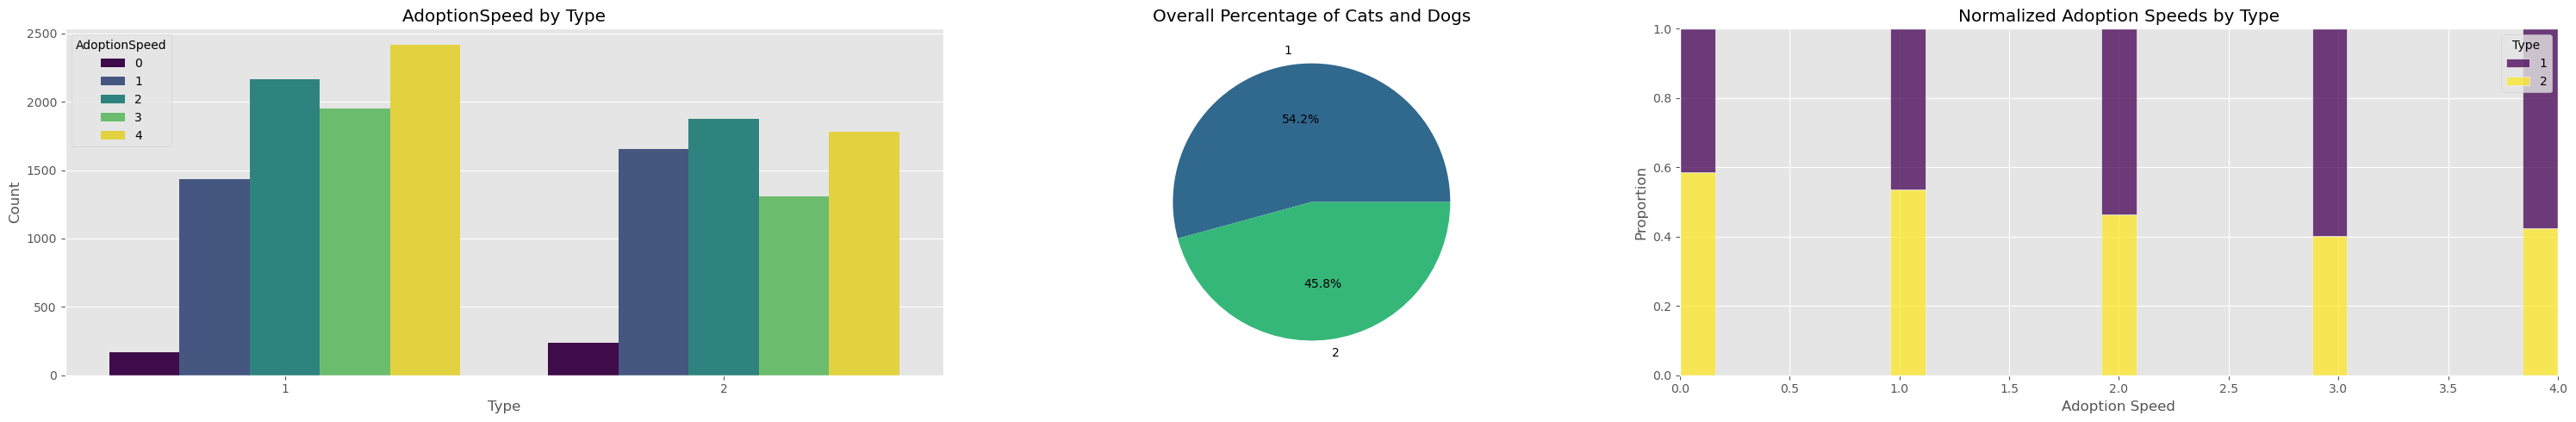

None


In [9]:
def prepare_plot_dict(df, x, main_count):
    """
    Prepares a dictionary mapping each bar's height (raw count)
    to the difference from baseline distribution (%) for that AdoptionSpeed class.
    """
    plot_dict = {}
    for val in df[x].unique():
        subset = df[df[x] == val]
        subset_count = subset['AdoptionSpeed'].value_counts(normalize=True) * 100
        diff = subset_count - main_count
        # For each (AdoptionSpeed class, difference) pair, store in the dictionary
        for class_val, diff_val in diff.items():
            if class_val not in plot_dict:
                plot_dict[class_val] = {}
            plot_dict[class_val][val] = diff_val
    return plot_dict

def make_count_plot(df, x, hue="AdoptionSpeed", title=""):
    """
    1) Plots a countplot of `x` vs. `hue` (default: AdoptionSpeed),
       then annotates each bar with +/- % difference relative to
       the global baseline distribution (main_count).
    2) Creates a second subplot to show overall distribution of Cats & Dogs.
    3) Creates a third subplot to show normalized adoption speeds by the count of type.
    """

    # Calculate the main_count (baseline distribution of AdoptionSpeed in %)
    main_count = df['AdoptionSpeed'].value_counts(normalize=True) * 100

    fig, axes = plt.subplots(1, 3, figsize=(30, 5))

    # --- Subplot 1: Main count plot with difference annotation ---
    ax1 = sns.countplot(x=x, data=df, hue=hue, palette="viridis", ax=axes[0])
    ax1.set_title(f"AdoptionSpeed {title}")
    ax1.set_xlabel(x)
    ax1.set_ylabel("Count")

    # Build the dictionary that maps bar heights to difference-from-baseline
    plot_dict = prepare_plot_dict(df, x, main_count)

    # Annotate each bar
    for patch in ax1.patches:
        h = patch.get_height() if pd.notnull(patch.get_height()) else 0
        # Get the class and value for the current bar
        class_val = int(patch.get_x() + patch.get_width() / 2)
        val = patch.get_x() + patch.get_width() / 2
        # Look up the difference from baseline distribution
        diff_val = plot_dict[class_val][val] if class_val in plot_dict and val in plot_dict[class_val] else 0

    # --- Subplot 2: Overall distribution of Cats vs. Dogs ---
    type_counts = df['Type'].value_counts(normalize=True) * 100
    ax2 = axes[1]
    ax2.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(type_counts)))
    ax2.set_title("Overall Percentage of Cats and Dogs")

    # --- Subplot 3: Normalized adoption speeds by the count of type ---
    ax3 = sns.histplot(data=df, x='AdoptionSpeed', hue='Type', multiple='fill', palette='viridis', ax=axes[2])
    ax3.set_title("Normalized Adoption Speeds by Type")
    ax3.set_xlabel("Adoption Speed")
    ax3.set_ylabel("Proportion")

    plt.tight_layout()
    plt.show()

print(make_count_plot(df, x="Type", hue="AdoptionSpeed", title="by Type"))


Cats are more likely to be adopted early compared to dogs, and the overall percentage of cats not being adopted is lower (4 AdoptionSpeed)


However, does this necessarily indicate a preference for cats? or could it be that the dataset bias. There is a 8.4% higher count of dogs in this dataset.


Another aspect worth exploring is the adoption rates by state, considering that in many Islamic sects, keeping dogs as household pets is controversial and less common compared to cats.

#### Ages

Applying a logarithmic transformation to Age compresses larger values more than smaller ones, helping to reduce skew, so we can better visualise data spanning wide ranges (useful for interpreting distributions with long tails or large variations).

- log10(1) = 0 → Age = 1 month.
- log10(10) = 1 → Age = 10 months.
- log10(100) = 2 → Age = 100 months.

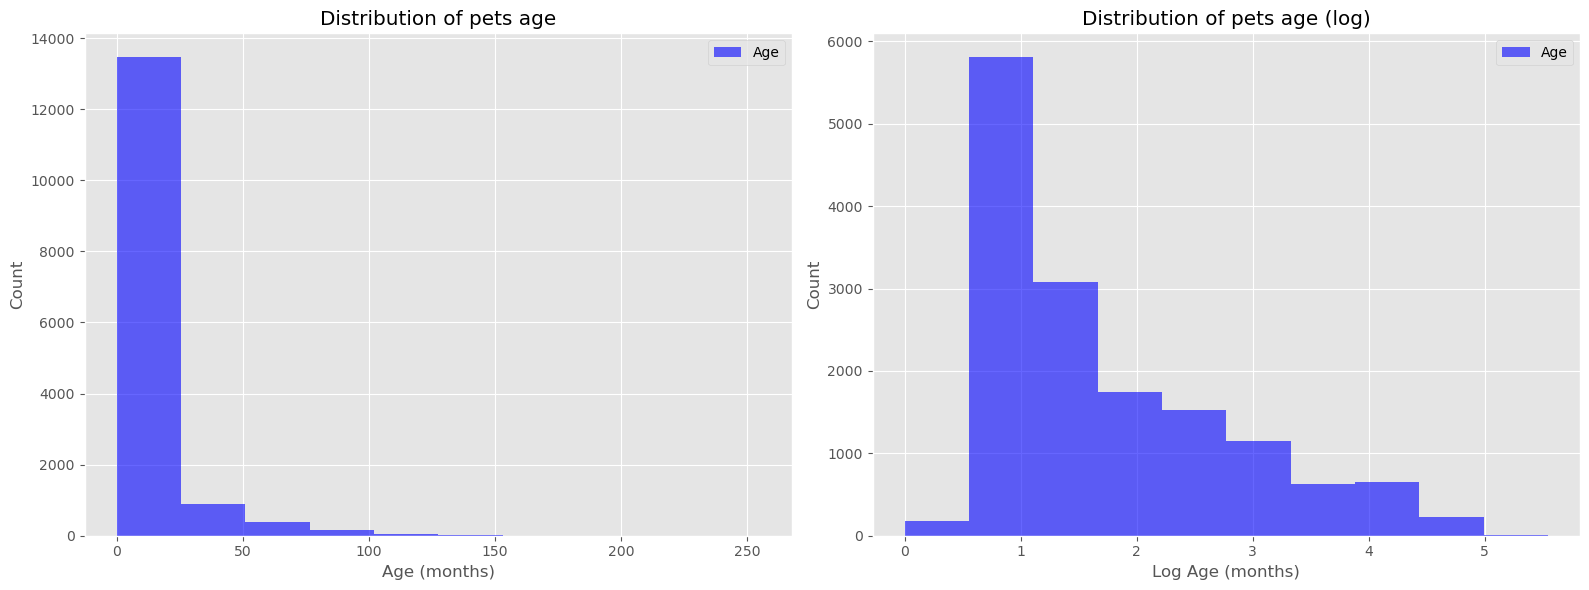

In [10]:

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Subplot (1): Raw Age Distribution
ax[0].set_title('Distribution of pets age')
df['Age'].plot(kind='hist', color='blue', alpha=0.6, ax=ax[0])
ax[0].set_xlabel('Age (months)')
ax[0].set_ylabel('Count')
ax[0].legend()

# Subplot (2): Log Age Distribution
ax[1].set_title('Distribution of pets age (log)')
np.log1p(df['Age']).plot(kind='hist', color='blue', alpha=0.6, ax=ax[1])
ax[1].set_xlabel('Log Age (months)')
ax[1].set_ylabel('Count')
ax[1].legend()

plt.tight_layout()
plt.show()


The dataset is dominated by younger pets, as shown in both plots. Specifically the log-transformed plot reduces the skewness of the distribution, making it easier to visualise this agglomeration around one month of age.

High class imbalance.

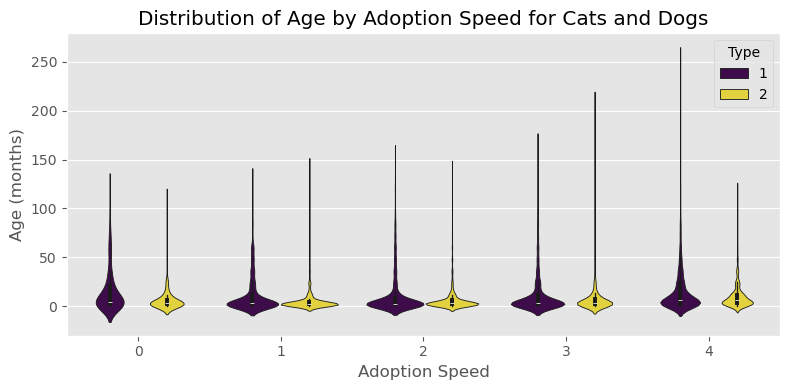

In [11]:
plt.figure(figsize=(8, 4))

sns.violinplot(x='AdoptionSpeed', y='Age', hue='Type', data=df, palette='viridis')
plt.title('Distribution of Age by Adoption Speed for Cats and Dogs')
plt.xlabel('Adoption Speed')
plt.ylabel('Age (months)')
plt.legend(title='Type')

plt.tight_layout()
plt.show()


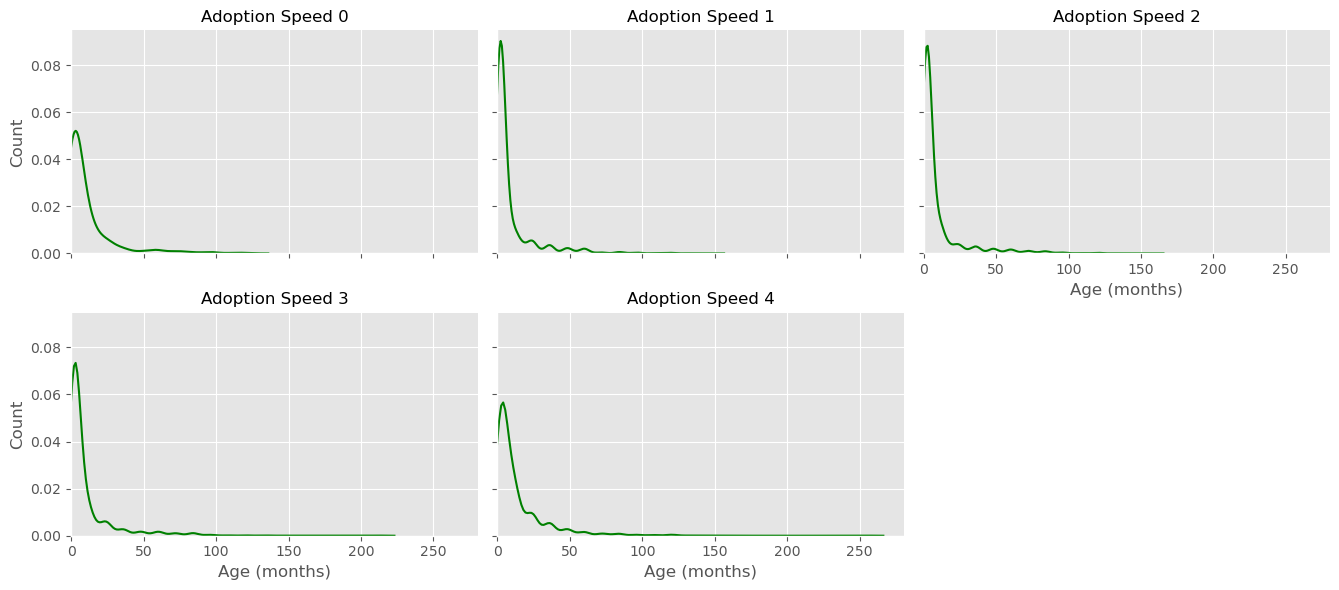

In [12]:
import plotly.graph_objs as go
import plotly.offline as py

# Ensure plots are displayed inline if you're using Jupyter Notebook
get_ipython().run_line_magic('matplotlib', 'inline')
data = []
for a in range(5):
    df_speed = df.loc[df['AdoptionSpeed'] == a]

    data.append(go.Scatter(
        x = df_speed['Age'].value_counts().sort_index().index,
        y = df_speed['Age'].value_counts().sort_index().values,
        name = str(a)
    ))
    
layout = go.Layout(dict(title = "AdoptionSpeed trends by Age",
                  xaxis = dict(title = 'Age (months)'),
                  yaxis = dict(title = 'Counts'),
                  )
                  )
py.iplot(dict(data=data, layout=layout), filename='basic-line')

# Use a specific style for your plots
plt.style.use('ggplot')

# Set figure size for all plots
plt.rcParams['figure.figsize'] = (8, 4)

# Create a FacetGrid with 5 subplots, one for each AdoptionSpeed
g = sns.FacetGrid(df, col="AdoptionSpeed", col_wrap=3, height=3, aspect=1.5)
g.map(sns.kdeplot, "Age", color='green')

# Set titles and labels
g.set_titles("Adoption Speed {col_name}")
g.set_axis_labels("Age (months)", "Count")

# Set x-axis to start from 0
for ax in g.axes.flat:
    ax.set_xlim(left=0)

plt.show()

Young pets are adopted quickly, with the majority being successfully adopted. Most pets in the dataset are under 4 months old, with a significant spike at 2 months. There also appears to be a tendency for some people to approximate ages by rounding them to years or multiples of 12 months. 


- It might be useful to create binary variables based on age for the downstream analysis.

#### Does having names affect Adoption speed?

Not just NaN "Name" entries but also pets with names like no name and unnamed

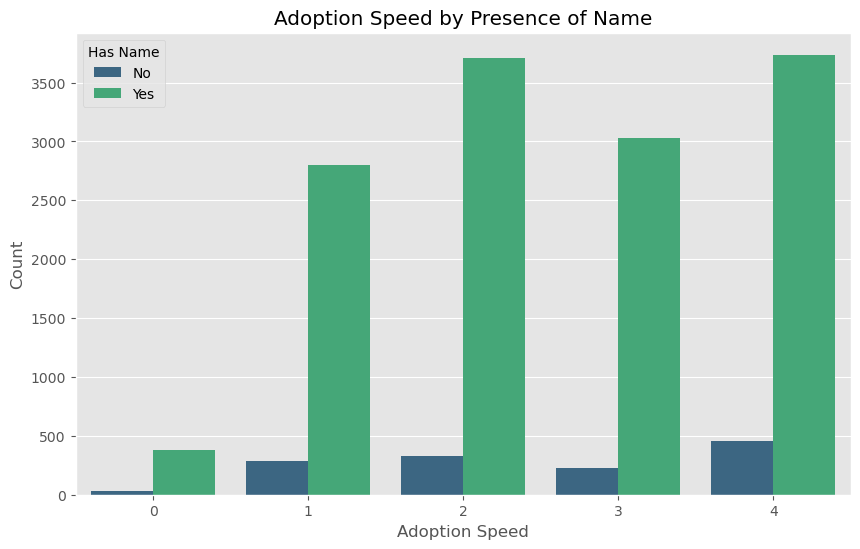

In [13]:
# Create a new column to indicate whether the pet has a name or not

df['HasName'] = df['Name'].apply(lambda x: 0 if pd.isnull(x) or x.strip().lower() in ['no name', 'noname', 'unnamed'] else 1)

# Plot the distribution of AdoptionSpeed for pets with and without names
plt.figure(figsize=(10, 6))
sns.countplot(x='AdoptionSpeed', hue='HasName', data=df, palette='viridis')
plt.title('Adoption Speed by Presence of Name')
plt.xlabel('Adoption Speed')
plt.ylabel('Count')
plt.legend(title='Has Name', labels=['No', 'Yes'])
plt.show()

Pets with no name have much lower rates of adoption.

##### Gender

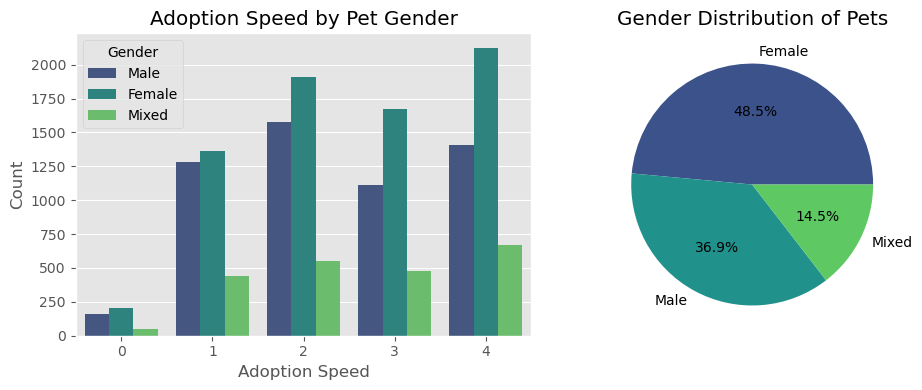

In [14]:
# Define a color palette
palette = sns.color_palette('viridis', 3)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Subplot 1: Adoption Speed by Gender
sns.countplot(x='AdoptionSpeed', hue='Gender', data=df, palette=palette, ax=axes[0])
axes[0].set_title('Adoption Speed by Pet Gender')
axes[0].set_xlabel('Adoption Speed')
axes[0].set_ylabel('Count')
axes[0].legend(title='Gender', labels=['Male', 'Female', 'Mixed'])

# Subplot 2: Gender Distribution
gender_counts = df['Gender'].value_counts()
gender_labels = {1: 'Male', 2: 'Female', 3: 'Mixed'}
gender_counts.index = gender_counts.index.map(gender_labels)
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=palette)
axes[1].set_title('Gender Distribution of Pets')

# Adjust layout
plt.tight_layout()
plt.show()


It seems that male pets are adopted faster than female. This can be just due to an imbalance in male/ female adoption population, having a bigger female population.

#### Colour

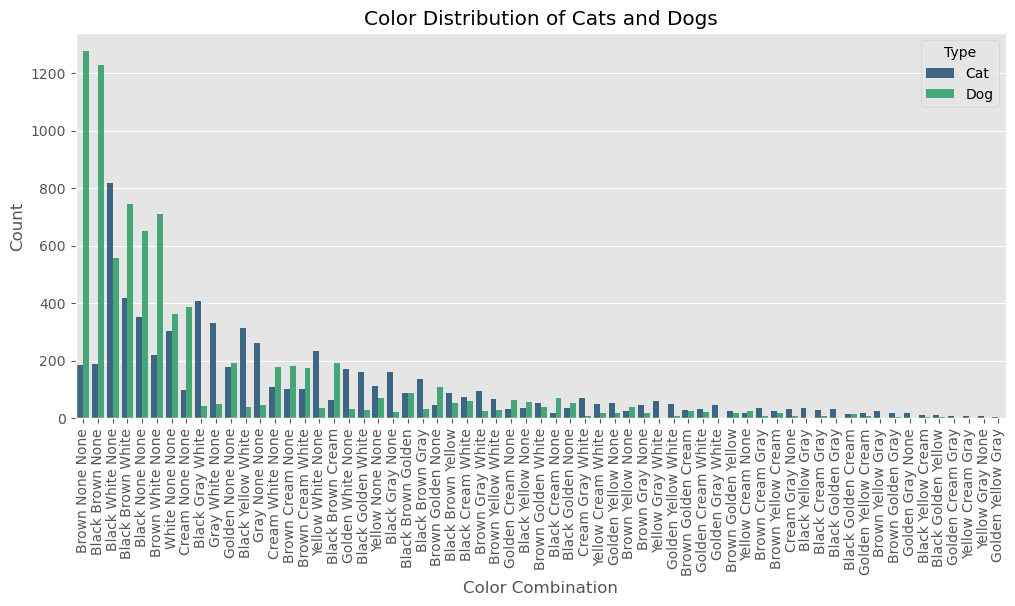

In [15]:
# Create a copy of the original df so we don't modify it
df_colors = df.copy()

# Map Type to 'Dog' and 'Cat' for better readability
df_colors['Type'] = df_colors['Type'].map({1: 'Dog', 2: 'Cat'})

# Merge df_colors with colors for Color1, Color2, Color3
df_colors = df_colors.merge(colors, left_on='Color1', right_on='ColorID', how='left', suffixes=('', '_1'))
df_colors = df_colors.rename(columns={'ColorName': 'ColorName_1'})
df_colors = df_colors.merge(colors, left_on='Color2', right_on='ColorID', how='left', suffixes=('', '_2'))
df_colors = df_colors.rename(columns={'ColorName': 'ColorName_2'})
df_colors = df_colors.merge(colors, left_on='Color3', right_on='ColorID', how='left', suffixes=('', '_3'))
df_colors = df_colors.rename(columns={'ColorName': 'ColorName_3'})

# Fill NaN values with 'None'
df_colors['ColorName_1'].fillna('None', inplace=True)
df_colors['ColorName_2'].fillna('None', inplace=True)
df_colors['ColorName_3'].fillna('None', inplace=True)

# Create a new column for combined colors
df_colors['CombinedColors'] = df_colors[['ColorName_1', 'ColorName_2', 'ColorName_3']] \
                                    .apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Plot color distribution for cats & dogs
plt.figure(figsize=(12, 5))
sns.countplot(
    x='CombinedColors',
    hue='Type',
    data=df_colors,
    palette='viridis',
    order=df_colors['CombinedColors'].value_counts().index
)
plt.title('Color Distribution of Cats and Dogs')
plt.xlabel('Color Combination')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Maturity Size

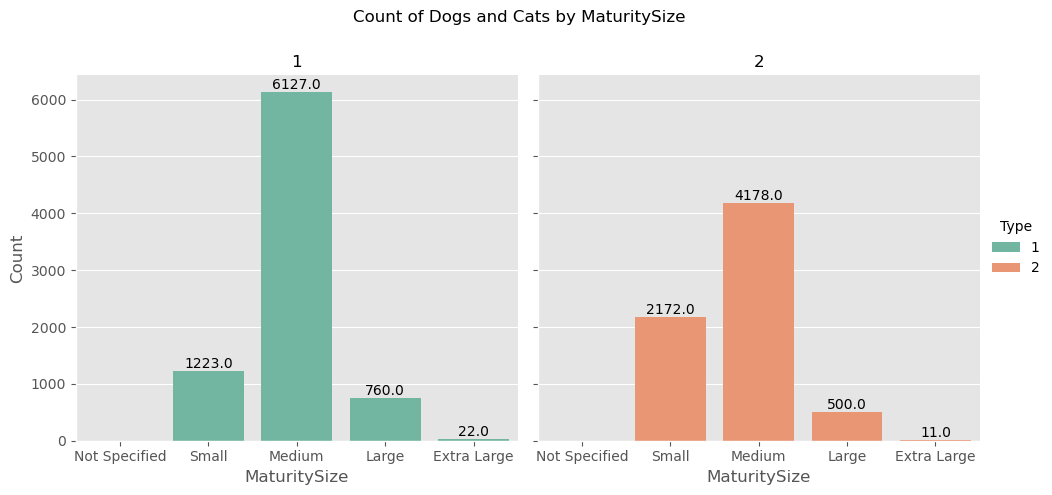

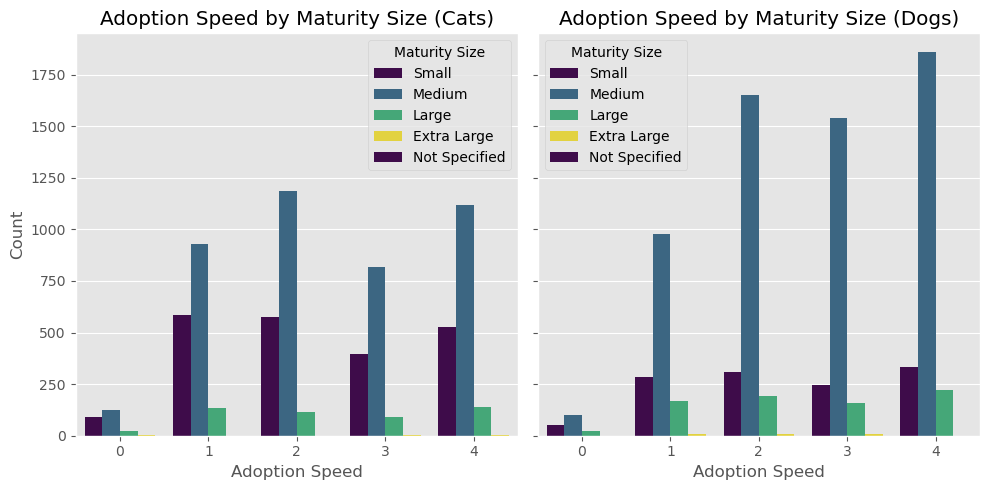

In [16]:
def make_factor_plot(df, x, col, title, hue, ann=False):
    g = sns.FacetGrid(df, col=col, hue=hue, palette='Set2', height=5, aspect=1)
    g.map(sns.countplot, x, order=[0, 1, 2, 3, 4], dodge=True)
    g.add_legend(title=hue.capitalize())
    g.set_axis_labels(x, 'Count')
    g.set_titles('{col_name}')
    g.set(xticks=[0, 1, 2, 3, 4], xticklabels=['Not Specified', 'Small', 'Medium', 'Large', 'Extra Large'])
    
    # Add main title
    g.figure.suptitle(title, fontsize=12)
    
    if ann:
        for ax in g.axes.flat:
            for p in ax.patches:
                height = p.get_height()
                if height > 0:
                    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
    plt.subplots_adjust(top=0.85)
    plt.show()

# Usage of make_factor_plot
make_factor_plot(df, x='MaturitySize', col='Type', title='Count of Dogs and Cats by MaturitySize', hue='Type', ann=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Dogs
sns.countplot(x='AdoptionSpeed', hue='MaturitySize', data=df[df['Type'] == 1], palette='viridis', ax=axes[1])
axes[1].set_title('Adoption Speed by Maturity Size (Dogs)')
axes[1].set_xlabel('Adoption Speed')
axes[1].set_ylabel('Count')
axes[1].legend(title='Maturity Size', labels=['Small', 'Medium', 'Large', 'Extra Large', 'Not Specified'])

# Cats
sns.countplot(x='AdoptionSpeed', hue='MaturitySize', data=df[df['Type'] == 2], palette='viridis', ax=axes[0])
axes[0].set_title('Adoption Speed by Maturity Size (Cats)')
axes[0].set_xlabel('Adoption Speed')
axes[0].set_ylabel('Count')
axes[0].legend(title='Maturity Size', labels=['Small', 'Medium', 'Large', 'Extra Large', 'Not Specified'])


plt.tight_layout()
plt.show()


Medium-sized Cats and Dogs are the most common maturity size in the dataset, followed by small-sized pets, while large and extra-large pets are much less frequent.

AdoptionSpeed 4, representing pets not adopted after 100 days, dominates for most maturity sizes. However, small and medium-sized cats have higher adoption rates across faster adoption speeds. This suggests a potential preference, while large and extra-large cats and all dogs may face adoption challenges.

#### Breeds

In [17]:
# Filter breeds DataFrame for cats and dogs
cat_breeds = breeds[breeds['Type'] == 2]
dog_breeds = breeds[breeds['Type'] == 1]

# Count unique breeds for Breed1 and Breed2
cat_breed1_count = df[df['Breed1'].isin(cat_breeds['BreedID'])]['Breed1'].nunique()
cat_breed2_count = df[df['Breed2'].isin(cat_breeds['BreedID'])]['Breed2'].nunique()
dog_breed1_count = df[df['Breed1'].isin(dog_breeds['BreedID'])]['Breed1'].nunique()
dog_breed2_count = df[df['Breed2'].isin(dog_breeds['BreedID'])]['Breed2'].nunique()

print(f"Number of unique cat breeds in Breed1: {cat_breed1_count}")
print(f"Number of unique cat breeds in Breed2: {cat_breed2_count}")
print(f"Number of unique dog breeds in Breed1: {dog_breed1_count}")
print(f"Number of unique dog breeds in Breed2: {dog_breed2_count}")

Number of unique cat breeds in Breed1: 59
Number of unique cat breeds in Breed2: 51
Number of unique dog breeds in Breed1: 116
Number of unique dog breeds in Breed2: 83


There are more breeds of dogs (1 and 2) than cats. May ignore second type of breeds.

#### Health

There are four features showing health of the pets:

- Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
- Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
- Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
- Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

I think that these features are very important - most people would prefer a healthy pet. While sterilization isn't the main concern, having healty and dewormed pet should have a great importance. Let's see whether I'm right!

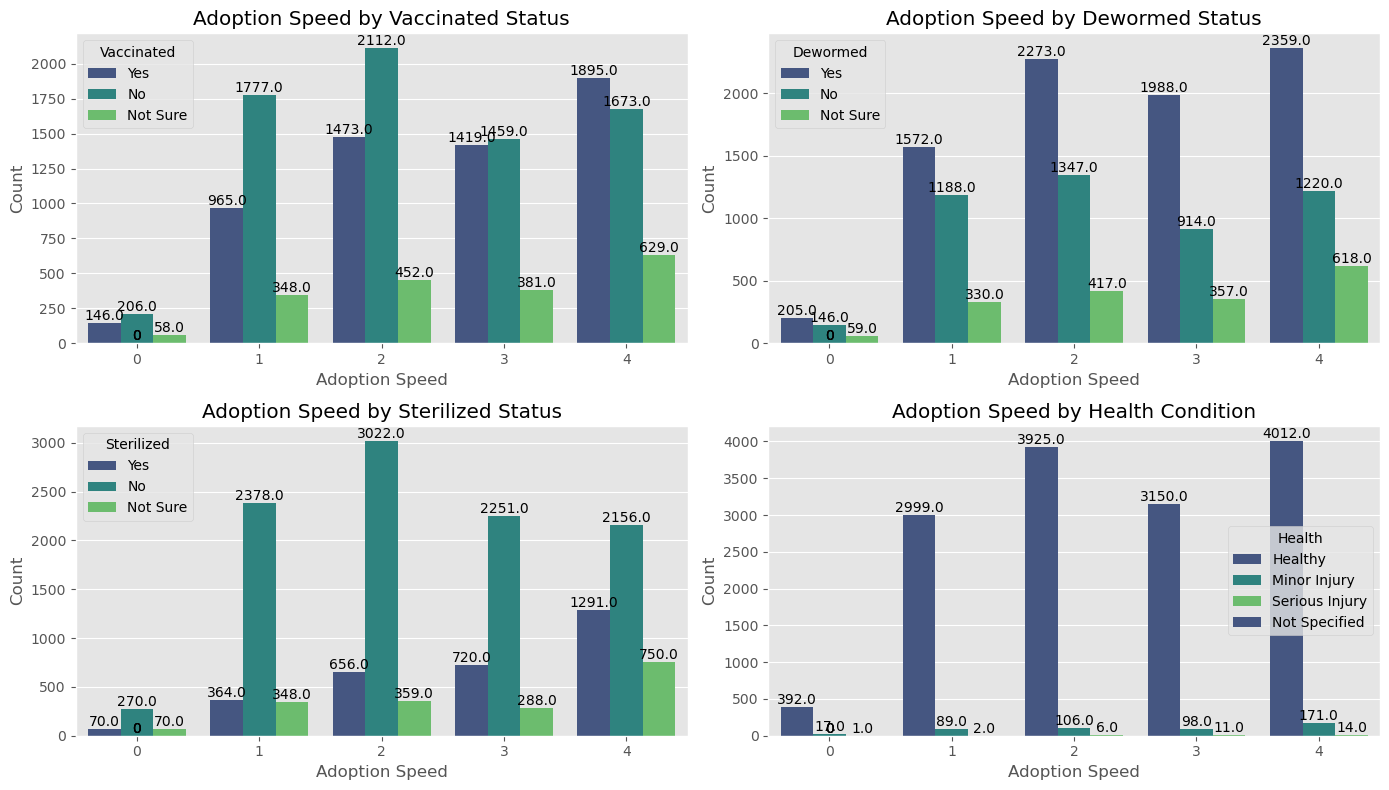

In [18]:
# Define a color palette
palette = sns.color_palette('viridis', 3)

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Subplot 1: Adoption Speed by Vaccinated
ax1 = sns.countplot(x='AdoptionSpeed', hue='Vaccinated', data=df, palette=palette, ax=axes[0, 0])
axes[0, 0].set_title('Adoption Speed by Vaccinated Status')
axes[0, 0].set_xlabel('Adoption Speed')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Vaccinated', labels=['Yes', 'No', 'Not Sure'])

# Annotate bars with counts
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Subplot 2: Adoption Speed by Dewormed
ax2 = sns.countplot(x='AdoptionSpeed', hue='Dewormed', data=df, palette=palette, ax=axes[0, 1])
axes[0, 1].set_title('Adoption Speed by Dewormed Status')
axes[0, 1].set_xlabel('Adoption Speed')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Dewormed', labels=['Yes', 'No', 'Not Sure'])

# Annotate bars with counts
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Subplot 3: Adoption Speed by Sterilized
ax3 = sns.countplot(x='AdoptionSpeed', hue='Sterilized', data=df, palette=palette, ax=axes[1, 0])
axes[1, 0].set_title('Adoption Speed by Sterilized Status')
axes[1, 0].set_xlabel('Adoption Speed')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Sterilized', labels=['Yes', 'No', 'Not Sure'])

# Annotate bars with counts
for p in ax3.patches:
    height = p.get_height()
    ax3.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Subplot 4: Adoption Speed by Health
ax4 = sns.countplot(x='AdoptionSpeed', hue='Health', data=df, palette=palette, ax=axes[1, 1])
axes[1, 1].set_title('Adoption Speed by Health Condition')
axes[1, 1].set_xlabel('Adoption Speed')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Health', labels=['Healthy', 'Minor Injury', 'Serious Injury', 'Not Specified'])

# Annotate bars with counts
for p in ax4.patches:
    height = p.get_height()
    ax4.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

Pets that are healthy, vaccinated, dewormed, and sterilised are adopted more quickly and frequently, as shown by higher adoption counts at faster speeds (0–2). In contrast, pets with unknown or negative statuses in these categories, as well as those with injuries, are more likely to fall into slower adoption speeds, particularly Adoption Speed 4. 


These shows well-cared-for have an improve their likelihood of adoption.

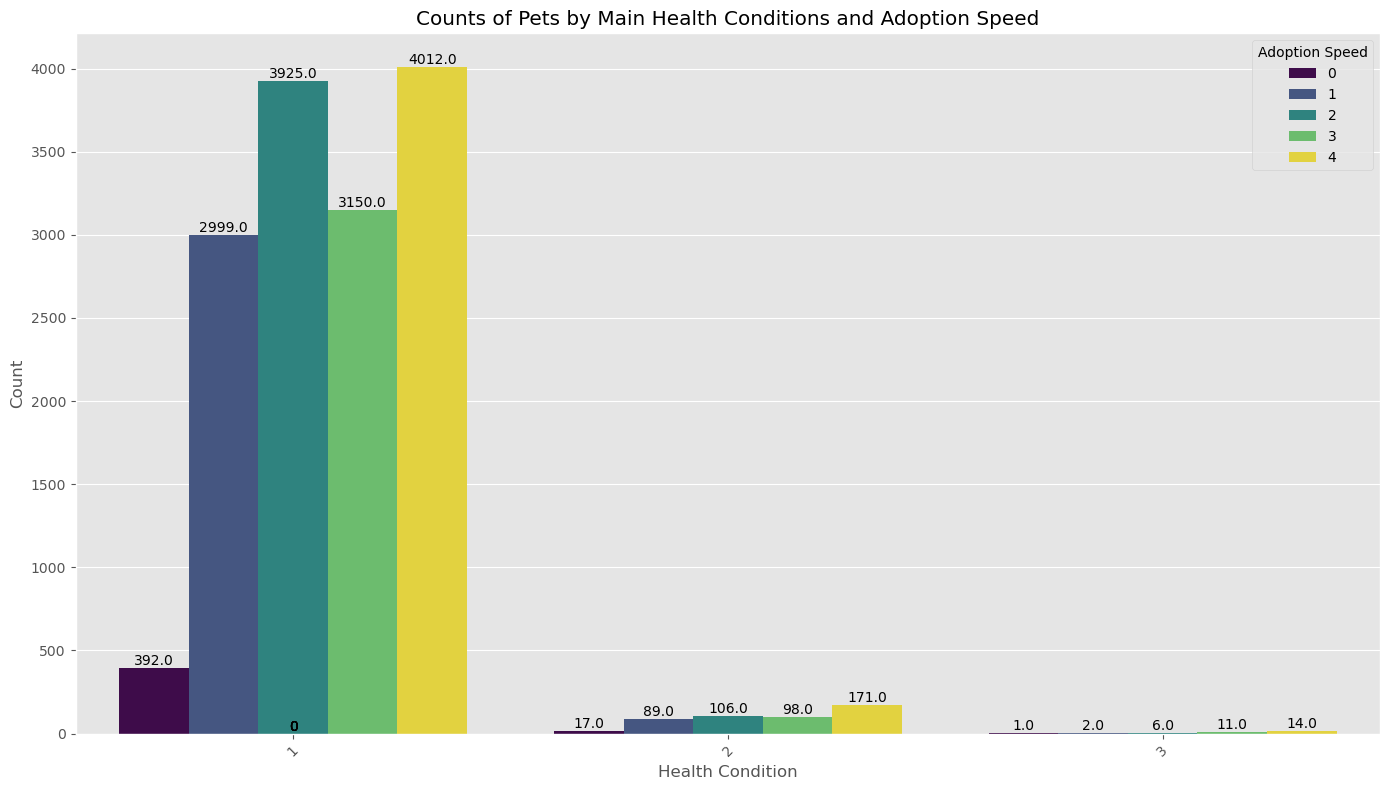

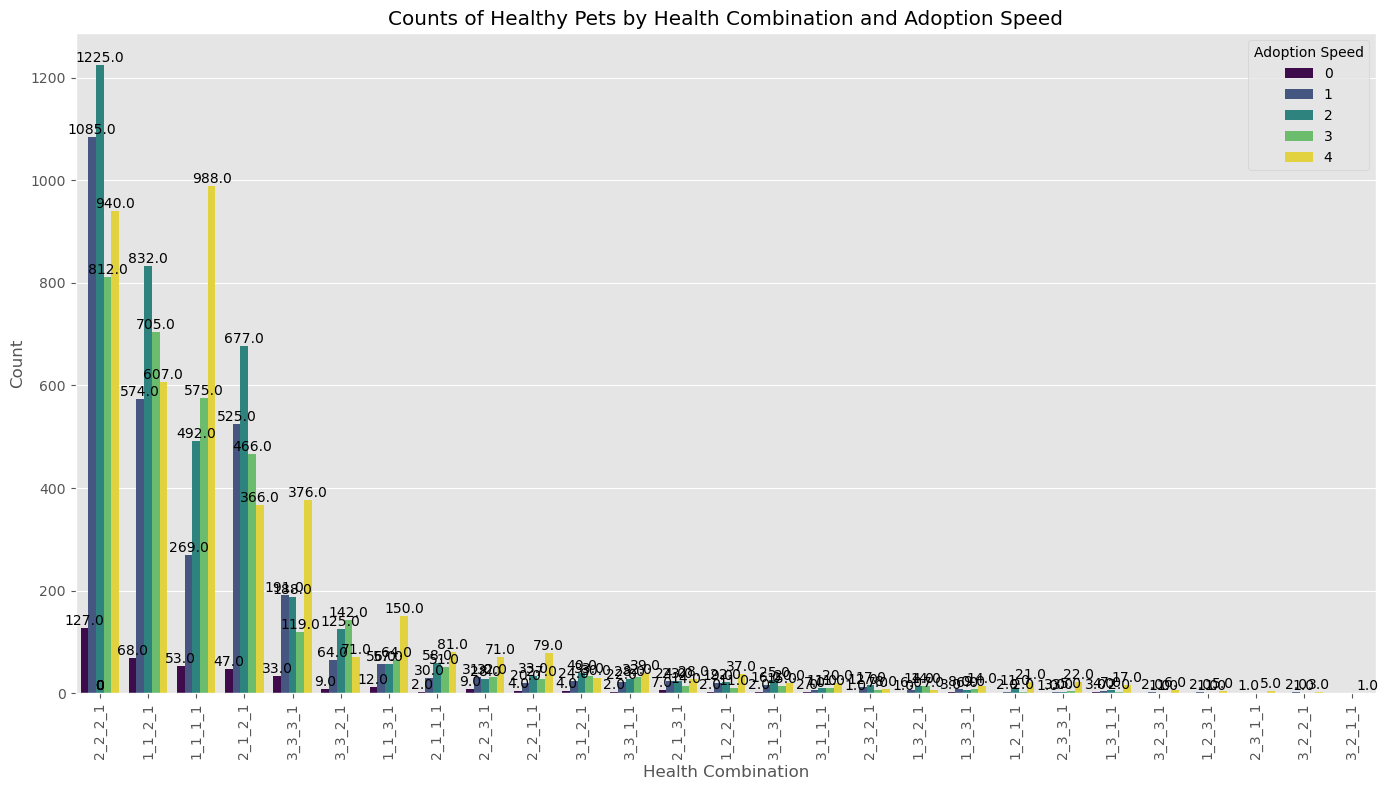

In [19]:
# Filter the DataFrame to include only certain health conditions
filtered_df = df[df['Health'].isin([1, 2, 3])]

# Plot the counts of pets by main health conditions and Adoption Speed
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Health', hue='AdoptionSpeed', data=filtered_df, palette='viridis')
plt.title('Counts of Pets by Main Health Conditions and Adoption Speed')
plt.xlabel('Health Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Adoption Speed')

# Annotate each bar with the count
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()
# Create a new column for the combination of health-related conditions
df['HealthCombo'] = df.apply(lambda row: f"{row['Vaccinated']}_{row['Dewormed']}_{row['Sterilized']}_{row['Health']}", axis=1)

# Filter the DataFrame to include only healthy pets
healthy_df = df[df['Health'] == 1]

# Plot the counts of healthy pets by health combination and Adoption Speed
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='HealthCombo', hue='AdoptionSpeed', data=healthy_df, palette='viridis', order=healthy_df['HealthCombo'].value_counts().index)
plt.title('Counts of Healthy Pets by Health Combination and Adoption Speed')
plt.xlabel('Health Combination')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Adoption Speed')

# Annotate each bar with the count
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Healthy, vaccinated, dewormed, and non-sterilised pets (1_1_2_1) are adopted more quickly, than sterilised ones.


#### Quantity

There can be more than one pet per entry/ row. Lets see how it affect AdoptionSpeeds.

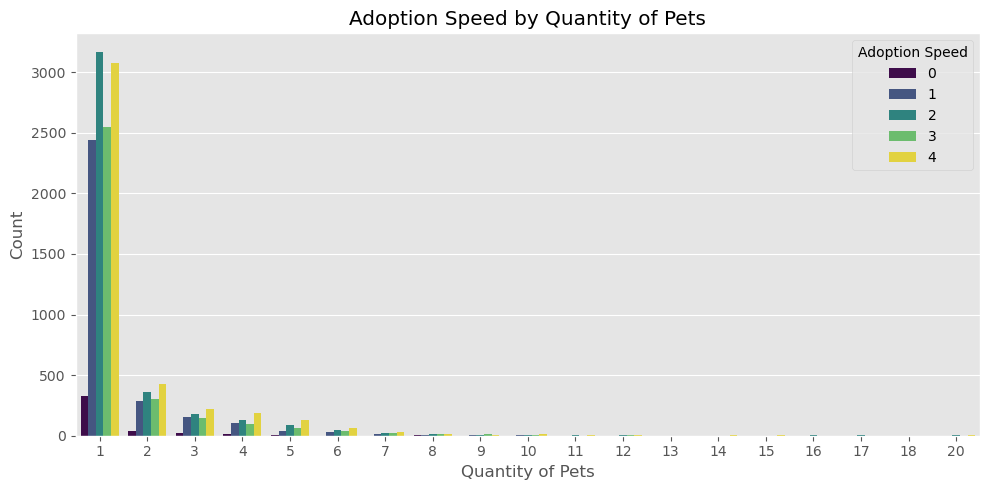

In [20]:
# Create a figure with subplots
plt.figure(figsize=(10, 5))

# Plot the distribution of AdoptionSpeed for different quantities of pets
sns.countplot(x='Quantity', hue='AdoptionSpeed', data=df, palette='viridis')
plt.title('Adoption Speed by Quantity of Pets')
plt.xlabel('Quantity of Pets')
plt.ylabel('Count')
plt.legend(title='Adoption Speed')

# Show the plot
plt.tight_layout()
plt.show()
#

Looks like counts are proportional to differing amounts of the sets. Seems quantity has little to do with adoption speed.

Most entries are of individual pets.

#### Photo and Video Amount

Do they affect adoption speeds?

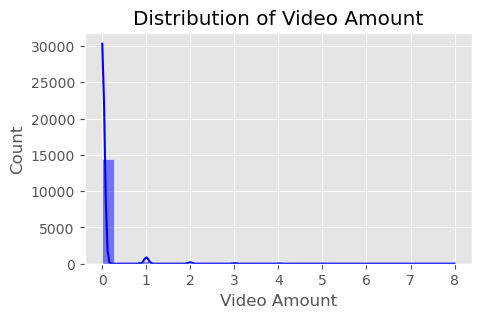

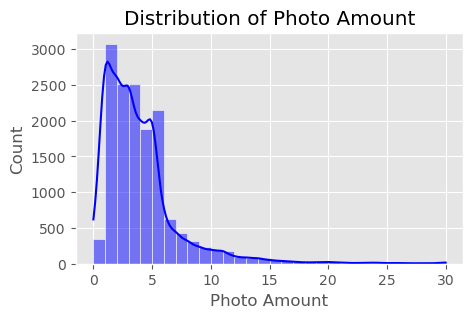

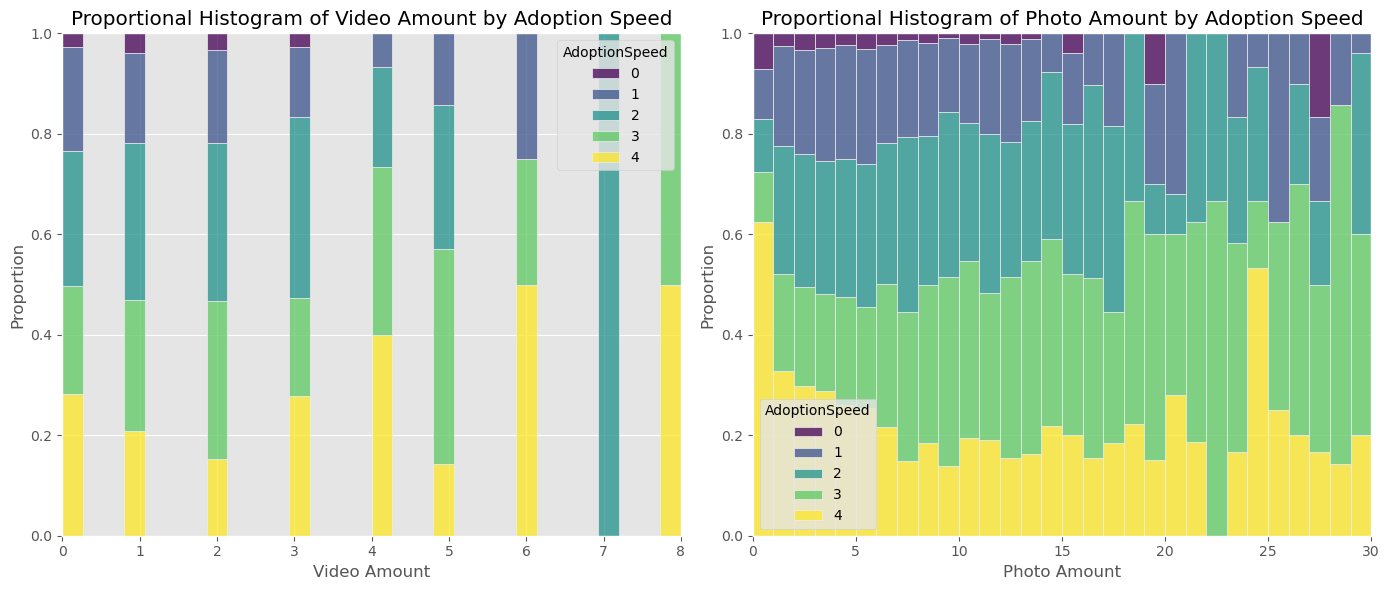

In [21]:
# Distribution of VideoAmt
plt.figure(figsize=(5, 3))
sns.histplot(df['VideoAmt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Video Amount')
plt.xlabel('Video Amount')
plt.ylabel('Count')
plt.show()

# Distribution of PhotoAmt
plt.figure(figsize=(5, 3))
sns.histplot(df['PhotoAmt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Photo Amount')
plt.xlabel('Photo Amount')
plt.ylabel('Count')
plt.show()


# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Histogram of Video Amount by Adoption Speed
sns.histplot(df, x='VideoAmt', bins=30, kde=False, hue='AdoptionSpeed', multiple='fill', ax=axes[0], palette='viridis')
axes[0].set_title('Proportional Histogram of Video Amount by Adoption Speed')
axes[0].set_xlabel('Video Amount')
axes[0].set_ylabel('Proportion')

# Subplot 2: Histogram of Photo Amount by Adoption Speed
sns.histplot(df, x='PhotoAmt', bins=30, kde=False, hue='AdoptionSpeed', multiple='fill', ax=axes[1], palette='viridis')
axes[1].set_title('Proportional Histogram of Photo Amount by Adoption Speed')
axes[1].set_xlabel('Photo Amount')
axes[1].set_ylabel('Proportion')

# Adjust layout
plt.tight_layout()
plt.show()

More photos seem to  increase the adoption speed 2 and 3 and decrease number 4.

Distributions for both is very heavy on low values, which may cause issues of class imbalance.

#### States

Top three states account for ~90% of ads (Selangor, Kuala Lumpur, and  Pulau Pinang). Is it just because of their bigger population?

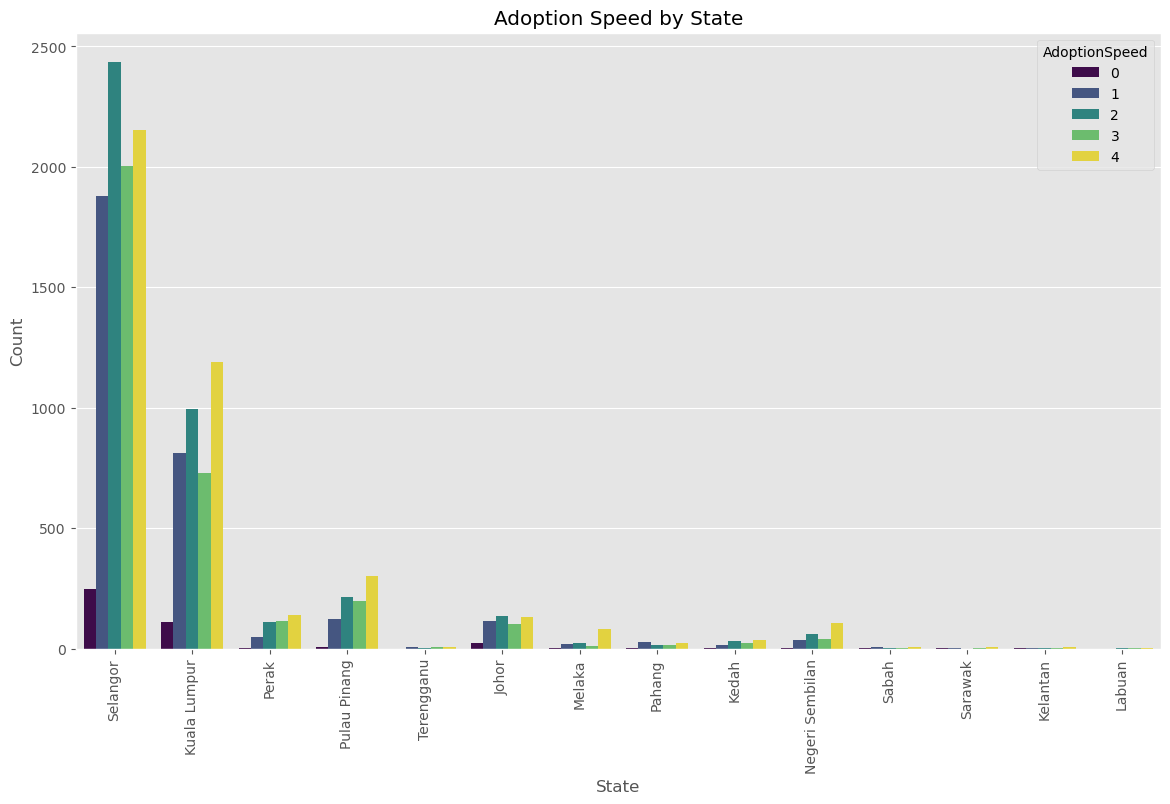

In [22]:

# Merge df with states to get state names
df = df.merge(states, left_on='State', right_on='StateID', how='left')

# Adoption Speed by State
plt.figure(figsize=(14, 8))
sns.countplot(x='StateName', hue='AdoptionSpeed', data=df, palette='viridis')
plt.title('Adoption Speed by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

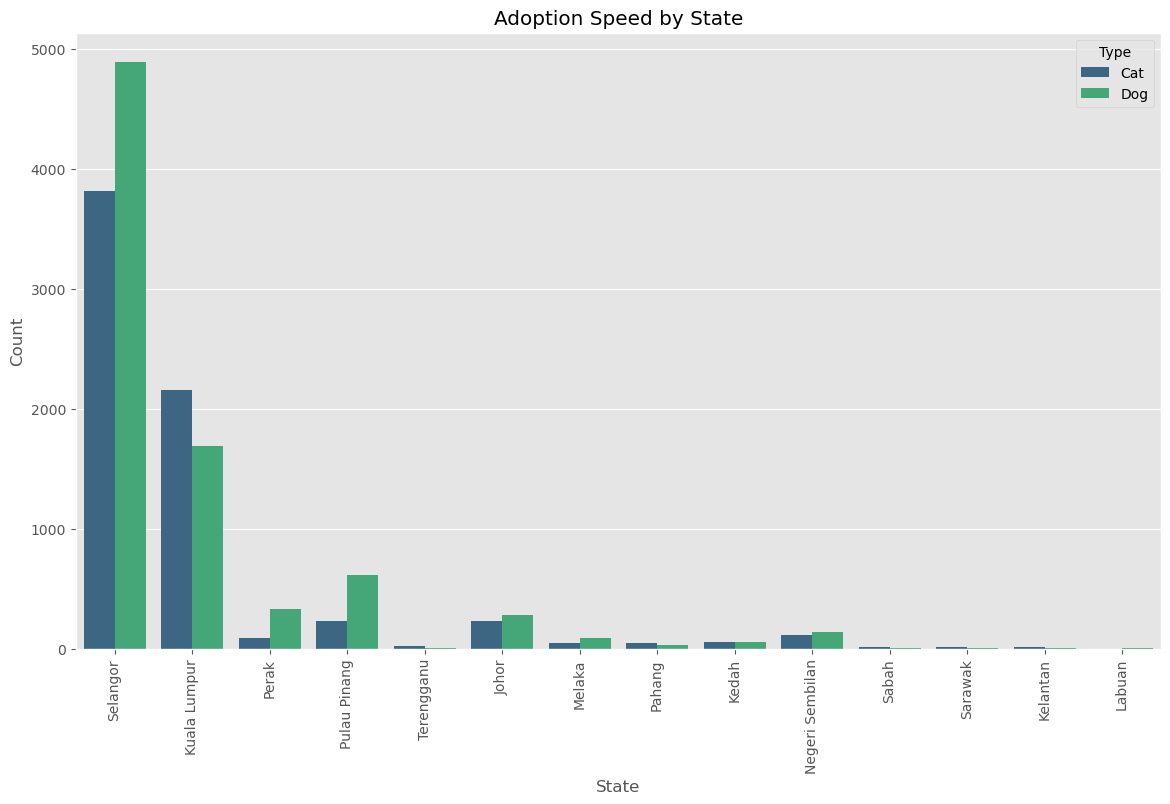

In [23]:

# Merge df with states to get state names
df = df.merge(states, left_on='State', right_on='StateID', how='left', suffixes=('', '_y'))

# Drop the duplicate columns created by the merge
df.drop(['StateID_y', 'StateName_y'], axis=1, inplace=True)

# Map Type to 'Dog' and 'Cat'
df['Type'] = df['Type'].map({1: 'Dog', 2: 'Cat'})

# Adoption Speed by State
plt.figure(figsize=(14, 8))
sns.countplot(x='StateName', hue='Type', data=df, palette='viridis')
plt.title('Adoption Speed by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Kuala Lumpur has a noticable preference for cats, unlike most other states. 

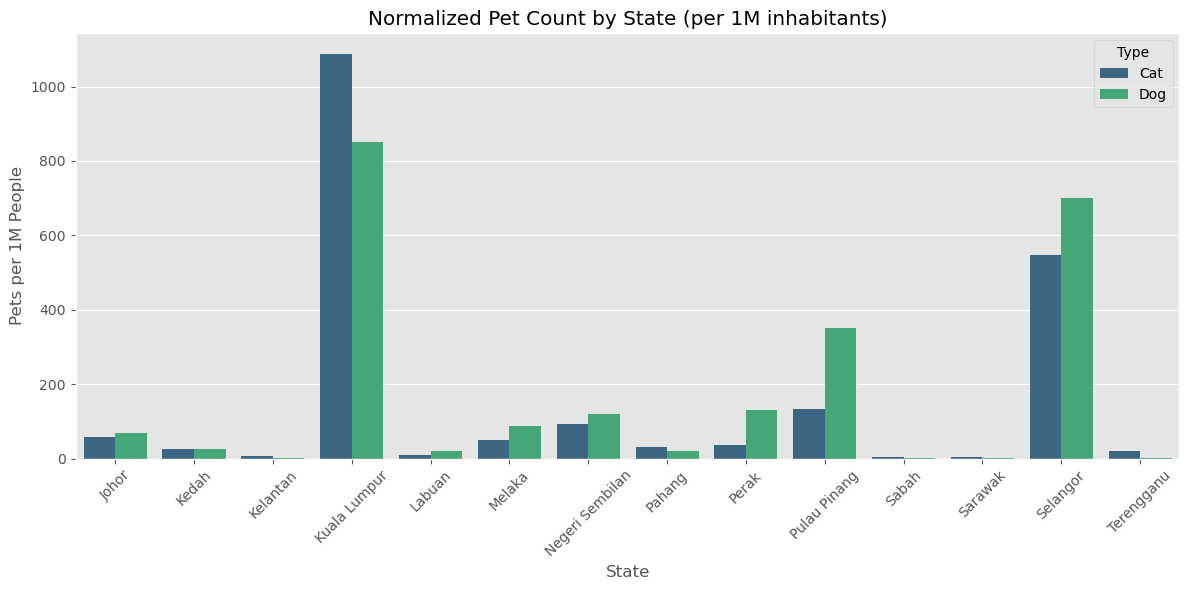

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# Drop existing StateID and StateName columns to avoid conflicts
df.drop(['StateID', 'StateName'], axis=1, inplace=True)

df = df.merge(states, left_on='State', right_on='StateID', how='left')

# ---------------------------------------------------------
population_data = {
    "Johor": 4009670,
    "Kedah": 2131427,
    "Kelantan": 1792501,
    "Kuala Lumpur": 1982112,  # Also sometimes 'FT Kuala Lumpur'
    "Labuan": 95120,
    "Melaka": 998428,         # Instead of "Malacca"
    "Negeri Sembilan": 1199974,
    "Pahang": 1591295,
    "Perak": 2496041,
    "Perlis": 284885,
    "Pulau Pinang": 1740405,  # Also "Penang" if needed
    "Sabah": 3418785,
    "Sarawak": 2453677,
    "Selangor": 6994423,
    "Terengganu": 1149440
}


grouped = df.groupby(["StateName", "Type"]).size().reset_index(name="count")


# ---------------------------------------------------------
grouped["Population"] = grouped["StateName"].map(population_data)

# Example: number of pets per 1,000,000 people
grouped["Pets_per_million"] = (grouped["count"] / grouped["Population"]) * 1_000_000

# Check for any states that didn’t match in population_data
missing_states = grouped[grouped["Population"].isnull()]["StateName"].unique()
if len(missing_states) > 0:
    print("WARNING: The following states have no population data:", missing_states)


# ---------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(x="StateName", y="Pets_per_million", hue="Type", data=grouped, palette="viridis")

plt.title("Normalized Pet Count by State (per 1M inhabitants)")
plt.xlabel("State")
plt.ylabel("Pets per 1M People")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


When normalised per habitants in the state (info taken from wikipedia https://en.wikipedia.org/w/index.php?title=Demographics_of_Malaysia&oldformat=true#Ethnolinguistic_groups) the three states are remain the same. Different adoptions may be due to unknown biases like muslim. 

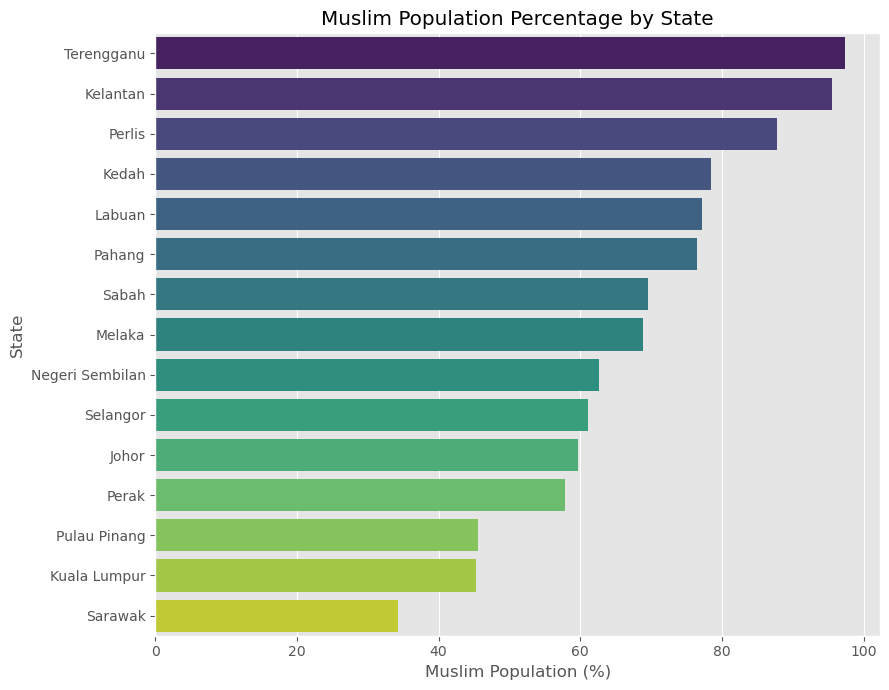

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dictionary of Muslim population (%) keyed by StateName
muslim_data = {
    "Johor": 59.7,
    "Kedah": 78.5,
    "Kelantan": 95.5,
    "Kuala Lumpur": 45.3,
    "Labuan": 77.2,
    "Melaka": 68.9,
    "Negeri Sembilan": 62.6,
    "Pahang": 76.5,
    "Perak": 57.9,
    "Perlis": 87.8,
    "Pulau Pinang": 45.5,
    "Sabah": 69.6,
    "Sarawak": 34.2,
    "Selangor": 61.1,
    "Terengganu": 97.3
}

# 2. Convert the dictionary to a pandas DataFrame
df_muslim = pd.DataFrame(
    list(muslim_data.items()), 
    columns=["StateName", "Muslim_Percent"]
)

# 3. Sort by percentage (optional, here descending)
df_muslim.sort_values("Muslim_Percent", ascending=False, inplace=True)

# 4. Create a horizontal barplot
plt.figure(figsize=(9, 7))

ax = sns.barplot(
    x="Muslim_Percent", 
    y="StateName", 
    data=df_muslim, 
    palette="viridis"
)

plt.title("Muslim Population Percentage by State")
plt.xlabel("Muslim Population (%)")
plt.ylabel("State")

# 5. Position the percentage text *inside* each bar at the center
for p in ax.patches:
    # X-position: half of the bar length
    x_center = p.get_width() / 2

    # Label for the bar
    label_text = f"{p.get_width():.1f}%"



# 6. Adjust the x-axis limit so labels are not cut off
max_percent = df_muslim["Muslim_Percent"].max()
plt.xlim(0, max_percent + 5)

plt.tight_layout()
plt.show()


States with less muslim population seems to compose the higher adoption States.

In [119]:
# Merge the main dataframe with the breeds dataframe to get breed names
df_breeds = df.merge(breeds, left_on='Breed1', right_on='BreedID', how='left')

# Calculate the average AdoptionSpeed for each breed
breed_adoption_speed = df_breeds.groupby('BreedName')['AdoptionSpeed'].mean().reset_index()

# Sort the breeds by average AdoptionSpeed in ascending order
breed_adoption_speed_sorted = breed_adoption_speed.sort_values(by='AdoptionSpeed')

# Display the breeds with the lowest average AdoptionSpeed
print(breed_adoption_speed_sorted.head(10))

                 BreedName  AdoptionSpeed
43     Chinese Crested Dog       0.000000
151  Sphynx (hairless cat)       0.000000
123             Ragamuffin       1.000000
93                  Kuvasz       1.000000
70                Foxhound       1.000000
114               Papillon       1.000000
59          Dutch Shepherd       1.000000
45               Chow Chow       1.000000
130          Saint Bernard       1.200000
80               Himalayan       1.333333


## 0.3. Preprocessing Data

Preprocessing is a crucial phase in any machine learning project. It involves transforming raw data into a clean and structured format suitable for analysis and modeling. It has the finality of making data consistent, free from errors, and appropriately formatted, all this through **feature engineering** and transformation.

### 1. Library Imports and Configurations

First, we import all necessary libraries required for data manipulation, visualization, and preprocessing. Additionally, we configure pandas to treat infinite values as missing to prevent errors during transformations.

In [68]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect, DetectorFactory
from tqdm import tqdm
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)

# Configure pandas to treat infinity as NaN
pd.set_option("use_inf_as_na", True)


### 2. Data Loading and Merging

Next, we loaded the main dataset (`PetFinder_dataset.csv`) and its auxiliary datasets containing breed labels, color labels, and state labels are loaded. These auxiliary files provide mappings between IDs and their corresponding descriptive labels of categorical features. They were later merged through **One-Hot Encoding**.

Additionally, reasoning the state dynamics visualised before, the **socioeconomic data** of state GDP and population figures are incorporated by mapping state-specific IDs to their GDP and population values to enrich the dataset and potentially help certain biases. Also a new feature, gdp_vs_population, is created to capture the relationship between GDP and population for each state, offering a nuanced socioeconomic indicator that could influence pet adoption patterns.

In [69]:
# Load auxiliary CSV files
breeds = pd.read_csv("data/raw/breed_labels.csv")
colors = pd.read_csv("data/raw/color_labels.csv")
states = pd.read_csv("data/raw/state_labels.csv")

# Load the main PetFinder dataset
df = pd.read_csv("data/raw/PetFinder_dataset.csv")

# Load or define state GDP & population for merging
state_gdp = {
    41336: 116.679,
    41325: 40.596,
    41367: 23.02,
    41401: 190.075,
    41415: 5.984,
    41324: 37.274,
    41332: 42.389,
    41335: 52.452,
    41330: 67.629,
    41380: 5.642,
    41327: 81.284,
    41345: 80.167,
    41342: 121.414,
    41326: 280.698,
    41361: 32.270
}

state_population = {
    41336: 33.48283,
    41325: 19.47651,
    41367: 15.39601,
    41401: 16.74621,
    41415: 0.86908,
    41324: 8.21110,
    41332: 10.21064,
    41335: 15.00817,
    41330: 23.52743,
    41380: 2.31541,
    41327: 15.61383,
    41345: 32.06742,
    41342: 24.71140,
    41326: 54.62141,
    41361: 10.35977
}

# Map state GDP and population into the DataFrame
if "State" in df.columns:
    df["state_gdp"] = df["State"].map(state_gdp)
    df["state_population"] = df["State"].map(state_population)
    df["gdp_vs_population"] = df["state_gdp"] / df["state_population"]

- State GDP and Population: We define dictionaries for state GDP and population based on state IDs (got name in their `.csv`). These metrics provide additional socioeconomic context that may influence adoption speed. (https://en.wikipedia.org/wiki/List_of_Malaysian_states_by_GDP)

- Mapping Data: We map the State column in the main dataset to state_gdp and state_population, and compute a new feature gdp_vs_population to capture the relationship between GDP and population for each state.

### 3. Textual Feature

The `Description` feature is textual, making it challenging to use directly. However, it contains valuable information that could improve the accuracy of category predictions in machine learning models. This section focuses on cleaning the textual data and engineering features two feature types to hopefully increase the dataset's predictive power.

The cleaning process involves several steps: **handling punctuation** by inserting spaces around punctuation marks to facilitate accurate tokenization, **correcting common misspellings and contractions** using a predefined dictionary, and **standardizing numerical representations** by replacing numbers with hash symbols based on their length.**Extraneous characters** are removed to reduce noise, and multiple consecutive spaces are condensed into single spaces for consistency. **Lemmatization** is performed using spaCy to reduce words to their base forms, ensuring that different forms of the same word are treated uniformly.

This cleaning process results in a `Description_cleaned` column that is free from irrelevant characters, standardized in form, and ready for further analysis such as **sentiment scoring** and **embedding generation**.

In [70]:
# Ensure reproducibility in language detection
DetectorFactory.seed = 0
import re
from nltk.stem import PorterStemmer 
import spacy

# Download VADER lexicon
nltk.download('vader_lexicon')


# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()


# Load spaCy model (ensure you've downloaded 'en_core_web_md' or 'en_core_web_lg')
nlp = spacy.load('en_core_web_md')

# Define punctuations and misspellings
puncts = [
    '。', ',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', 
    '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•', '~', '_', '{', '}', 
    '^', '`', '<', '°', '™', '♥', '½', '…', '“', '”', '–', '●', '²', '¬', '↑',
    '—', '：', '’', '☆', 'é', '¯', '♦', '‘', '）', '↓', '、', '（', '，', '♪', 
    '³', '❤', 'ï', '√'
]

mispell_dict = {
    "I'd": 'I would',
    "I'll": 'I will',
    "I'm": 'I am',
    "I've": 'I have',
    "ain't": 'is not',
    "aren't": 'are not',
    "can't": 'cannot',
    'cancelled': 'canceled',
    'centre': 'center',
    'colour': 'color',
    "could've": 'could have',
    "couldn't": 'could not',
    "didn't": 'did not',
    "doesn't": 'does not',
    "don't": 'do not',
    'enxiety': 'anxiety',
    'favourite': 'favorite',
    "hadn't": 'had not',
    "hasn't": 'has not',
    "haven't": 'have not',
    "he'd": 'he would',
    "he'll": 'he will',
    "he's": 'he is',
    "here's": 'here is',
    "how's": 'how is',
    "i'd": 'i would',
    "i'll": 'i will',
    "i'm": 'i am',
    "i've": 'i have',
    "isn't": 'is not',
    "it'll": 'it will',
    "it's": 'it is',
    'labour': 'labor',
    "let's": 'let us',
    "might've": 'might have',
    "must've": 'must have',
    'organisation': 'organization',
    "she'd": 'she would',
    "she'll": 'she will',
    "she's": 'she is',
    "shouldn't": 'should not',
    "that's": 'that is',
    'theatre': 'theater',
    "there's": 'there is',
    "they'd": 'they would',
    "they'll": 'they will',
    "they're": 'they are',
    "they've": 'they have',
    'travelling': 'traveling',
    "wasn't": 'was not',
    'watsapp': 'whatsapp',
    "we'd": 'we would',
    "we'll": 'we will',
    "we're": 'we are',
    "we've": 'we have',
    "weren't": 'were not',
    "what's": 'what is',
    "where's": 'where is',
    "who'll": 'who will',
    "who's": 'who is',
    "who've": 'who have',
    "won't": 'will not',
    "would've": 'would have',
    "wouldn't": 'would not',
    "you'd": 'you would',
    "you'll": 'you will',
    "you're": 'you are',
    "you've": 'you have',
    '，': ',',
    '／': '/',
    '？': '?'
}

import re
from collections import defaultdict

def clean_text(x):
    x = str(x)
    for p in puncts:
        x = x.replace(p, f" {p} ")
    return x

def clean_numbers(x):
    x = re.sub(r'\b\d{5,}\b', '#####', x)
    x = re.sub(r'\b\d{4}\b', '####', x)
    x = re.sub(r'\b\d{3}\b', '###', x)
    x = re.sub(r'\b\d{2}\b', '##', x)
    return x

def _get_mispell(mispell_dict):
    # Build a regex pattern for misspellings
    pattern = '|'.join([re.escape(key) for key in mispell_dict.keys()])
    mispell_re = re.compile(r'\b(' + pattern + r')\b', re.IGNORECASE)
    return mispell_dict, mispell_re

mispellings, mispellings_re = _get_mispell(mispell_dict)

def replace_typical_misspell(text):
    def replace(match):
        word = match.group(0)
        # Preserve the case of the first character
        first_char = word[0]
        replacement = mispellings.get(word.lower(), word)
        return replacement.capitalize() if first_char.isupper() else replacement
    return mispellings_re.sub(replace, text)

def process_text_advanced(txt):
    # Combine cleaning steps
    txt = clean_text(str(txt))
    txt = replace_typical_misspell(txt)
    txt = clean_numbers(txt)
    # Remove extraneous characters
    for c in '()*,./:;\\\t\n':
        txt = txt.replace(c, '')
    # Reduce multiple spaces to single space
    txt = re.sub(r'\s+', ' ', txt)
    # Lemmatize using spaCy
    doc = nlp(txt)
    txt = ' '.join([token.lemma_ for token in doc])
    return txt.strip()




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


- Downloading the **VADER** (Valence Aware Dictionary and Sentiment Reasoner) sentiment lexicon is essential for sentiment analysis.

- Loading the medium-sized English **spaCy** model (en_core_web_md) provides robust word embeddings for text processing tasks. 


We implement this in the section ahead.

### 3. Handling Missing Values, Erros and Typos - Textual Features

We identify and address missing values in the dataset, specifically in the `Name` and `Description` columns. Additionally, we converted `Name` textual categorical data into Binary numerical formats suitable for machine learning models.

#### a. Visualize Missing Data

Using the `missingno` library, missing values are visualized to identify patterns and the extent of *missingness* across different columns. In this dataset, significant *missingness* is observed in the `Name` column, with over 8% of entries missing, while the `Description` column has a minimal amount of missing data. 

<Figure size 600x200 with 0 Axes>

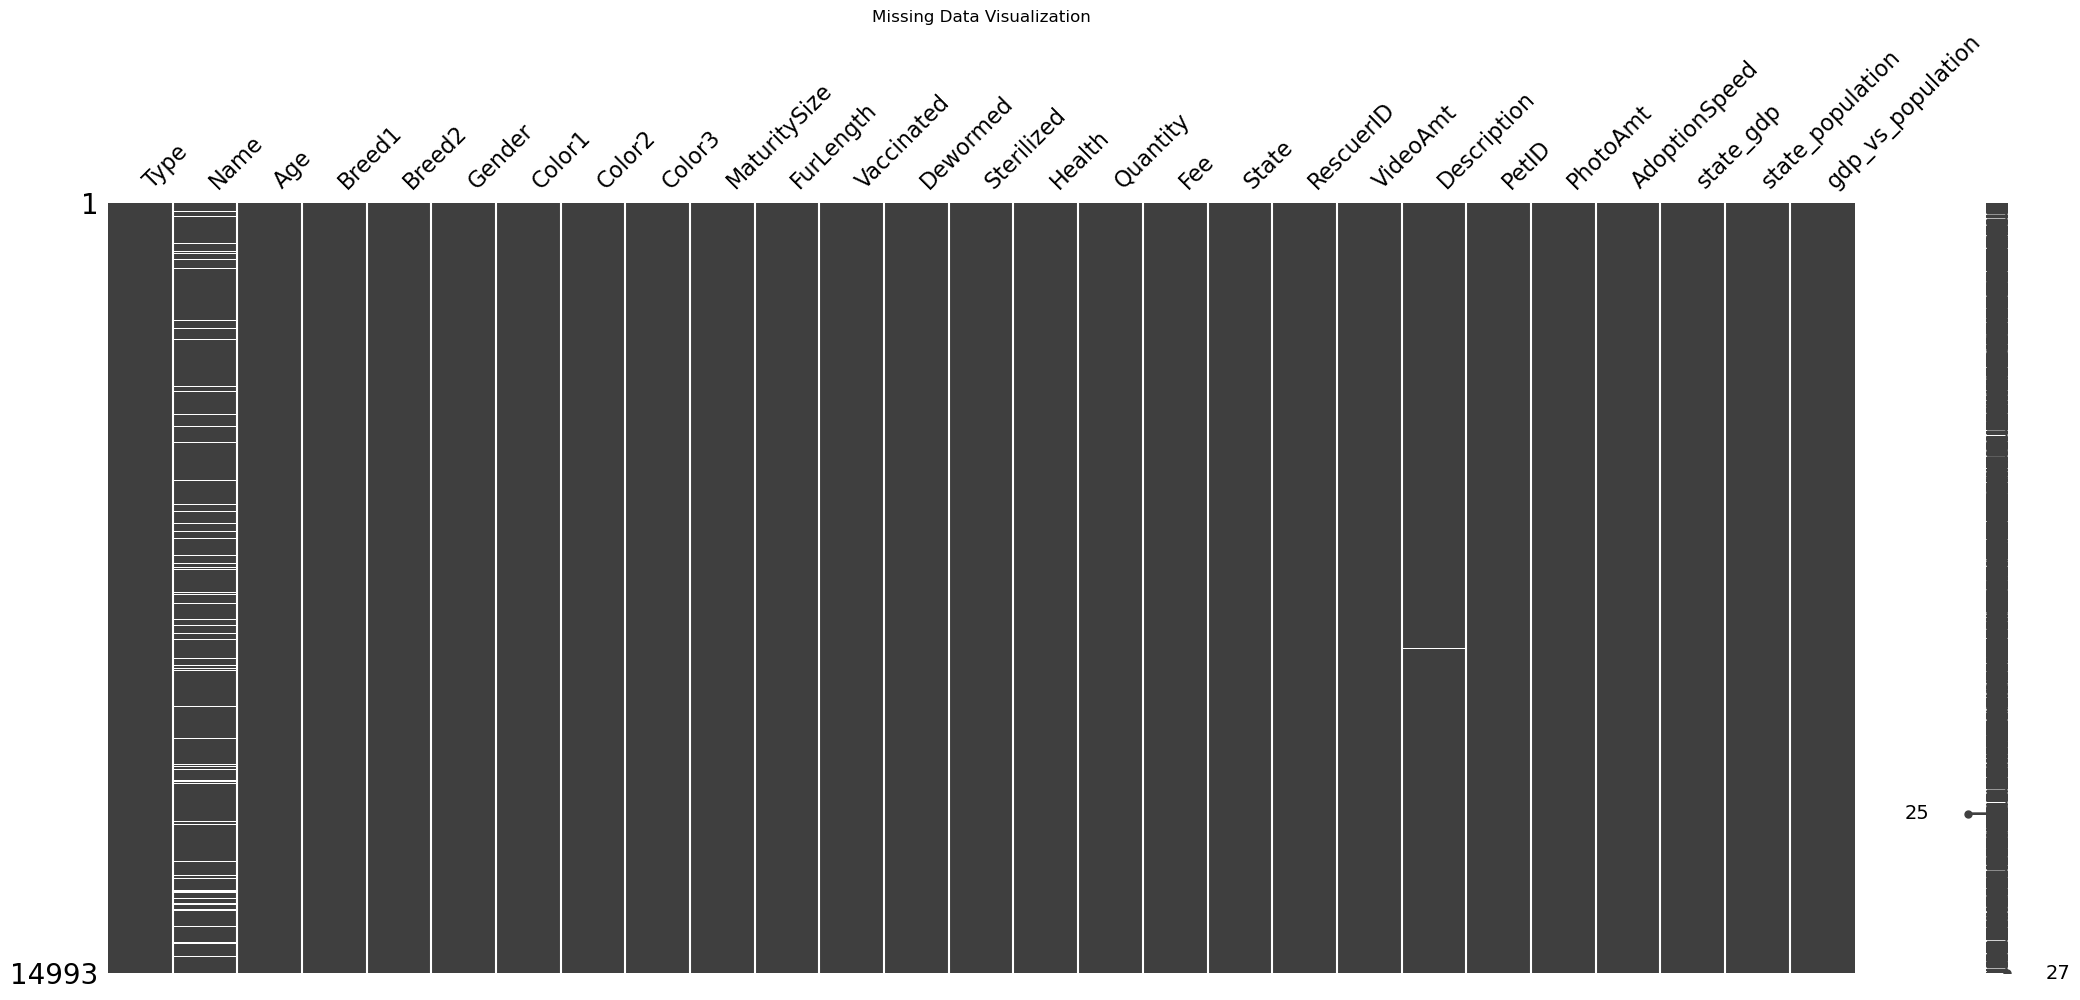

Missing data summary:
          Column  Missing Values  Percentage
1          Name            1265    8.437271
20  Description              13    0.086707


In [4]:
import missingno as msno

# 1. Visualize missing data
plt.figure(figsize=(6, 2))
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

# 2. Summarize missing data
missing_data_summary = df.isnull().sum().reset_index()
missing_data_summary.columns = ['Column', 'Missing Values']
missing_data_summary['Percentage'] = (missing_data_summary['Missing Values'] / len(df)) * 100
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0]
missing_data_summary = missing_data_summary.sort_values(by='Missing Values', ascending=False)

print("Missing data summary:\n", missing_data_summary)


#### b. Transforming Textual Features

To handle this, missing `Description`entries are filled with empty strings to prevent errors during text processing. The Prior explained transformation is done to the text, producing `Description_cleaned` column. After these transformations, the original `Description` column is dropped.

The `Name` column, which contains textual data indicating whether a **pet has a name**, is converted into a **binary feature**. Entries like "no name," "unnamed," or "not named" are encoded as 0, representing the absence of a meaningful name, while valid names are encoded as 1. This binary encoding simplifies the feature, reducing dimensionality and makes it less prone to overfit the model. 

In [5]:
# Fill missing descriptions with empty string
if "Description" in df.columns:
    df["Description"].fillna("", inplace=True)
    # Apply dynamic cleaning to each description with progress bar
    tqdm.pandas()
    df["Description_cleaned"] = df["Description"].progress_apply(process_text_advanced)

# Process the 'Name' column into a binary feature
if "Name" in df.columns:
    invalid_names = ["no name", "no name yet", "unnamed", "not named"]
    df["Name"] = df["Name"].apply(
        lambda x: 0 if pd.isnull(x) or str(x).strip().lower() in invalid_names else 1
    )
    
# Drop the original 'Description' column
df.drop(columns=["Description"], inplace=True)


/var/folders/dd/q59hq4f165zf1s43dyw9y7d80000gn/T/ipykernel_30812/2925593368.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Description"].fillna("", inplace=True)
100%|██████████| 14993/14993 [02:39<00:00, 94.09it/s] 


Seeing how `Description` cleaning was somewhat slow, we quickly saved the data frame to a `.csv` file to save time on reruns on further preprocessing-

In [147]:
# Save the processed DataFrame to a CSV file
# skip_path = 'data/processed/skip_processed.csv'
# df.to_csv(skip_path, index=False)

In [441]:
df = pd.read_csv('data/processed/skip_processed.csv')

### 5.  Features Removal and Creation

To optimize modeling, certain features that do not contribute meaningful information and could potentially introduce noise should be removed. The `PetID` column, being a unique identifier, does not provide predictive value and is thus dropped.

In [442]:
drop_cols = ["PetID"]
for col in drop_cols:
    if col in df.columns:
        df.drop(columns=[col], inplace=True, errors="ignore")


To improve the dataset's predictive power and minimize dimensionality issues, new features are engineered to capture key factors that may influence adoption speed. For instance, the feature `IsFree` is introduced to indicate whether a pet is being offered for adoption free of charge.

Another challenge was the high dimensionality of pet breeds, with over 300 breeds combined in the `Breed1` and `Breed2` columns. To address this, a new feature, `Pure_Breed`, is derived to differentiate between purebred and mixed-breed pets. This is accomplished by analyzing the `Breed1` and `Breed2` columns, ensuring that pets with only a single breed entry and no indication of being mixed are labeled as purebred. This engineered feature simplifies the dataset and reduces potential issues in subsequent analysis.

`Breed1` and `Breed2` were dropped, while `Fee` was kept and later normalized.


In [443]:
# Load the breed labels CSV file
breed_labels = pd.read_csv("data/raw/breed_labels.csv")

# Define pure_breeds_df
pure_breeds_df = df[((df['Breed2'] == 0) | (df['Breed2'].isnull())) & (~df['Breed1'].isin(breed_labels[breed_labels['BreedName'].str.contains('mixed', case=False)]['BreedID']))]

# Calculate the percentage of pure breed and non-pure breed entries
total_entries = len(df)
pure_breed_entries = len(pure_breeds_df)
non_pure_breed_entries = total_entries - pure_breed_entries

pure_breed_percentage = (pure_breed_entries / total_entries) * 100
non_pure_breed_percentage = (non_pure_breed_entries / total_entries) * 100

print(f"Percentage of Pure Breed Entries: {pure_breed_percentage:.2f}%")
print(f"Percentage of Non-Pure Breed Entries: {non_pure_breed_percentage:.2f}%")


Percentage of Pure Breed Entries: 41.53%
Percentage of Non-Pure Breed Entries: 58.47%


In [444]:
df["IsFree"] = (df["Fee"] == 0).astype(int)

if "Breed2" in df.columns:
    df["Pure_Breed"] = df.apply(lambda x: 0 if x["Breed2"] != 0 or "mixed" in str(breeds[breeds['BreedID'] == x["Breed1"]]['BreedName'].values).lower() or "mixed" in str(breeds[breeds['BreedID'] == x["Breed2"]]['BreedName'].values).lower() else 1, axis=1)
    if "Breed1" in df.columns:
        df.drop(columns=["Breed1", "Breed2"], inplace=True)

### 6. Sentiment Analysis and Language Detection

As previously stated, textual descriptions of pets contain rich information that can influence adoption decisions. To quantify this, **sentiment analysis** is performed using **VADER's** `SentimentIntensityAnalyzer`. 

This assigns a compound sentiment score to each pet's description, ranging from -1 (most negative) to +1 (most positive). These scores are stored in a new column, `SentimentScore`, providing a numerical representation of the emotional tone conveyed in the descriptions. This scores can be easily applied in most models.

In [445]:
def analyze_sentiment_vader(text):
    """
    Analyze sentiment using VADER and return the compound score.
    """
    if not text or pd.isnull(text):
        return 0.0  # Neutral sentiment for empty or null descriptions
    
    text = str(text)  # Ensure the text is a string
    try:
        scores = sid.polarity_scores(text)
        compound = scores['compound']  # Compound score ranges from -1 to +1
        return compound
    except Exception as e:
        print(f"Error processing text: {e}")
        return 0.0  # Neutral sentiment on error

# Apply sentiment analysis with progress bar
tqdm.pandas()
df['SentimentScore'] = df['Description_cleaned'].progress_apply(analyze_sentiment_vader)


100%|██████████| 14993/14993 [00:08<00:00, 1757.69it/s]


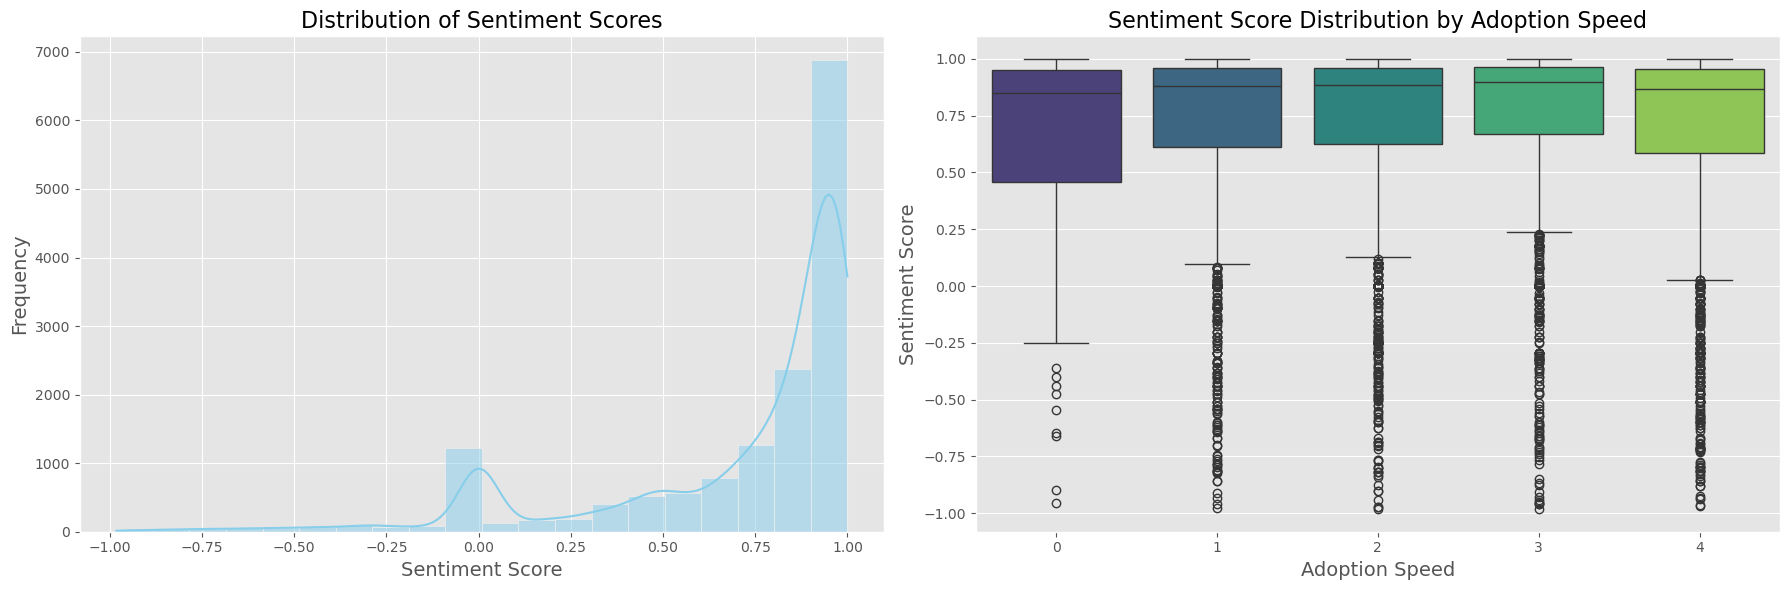

In [446]:
# Create a figure with 3 subplots arranged in a single row
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Distribution of Sentiment Scores
sns.histplot(df['SentimentScore'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Sentiment Scores', fontsize=16)
axes[0].set_xlabel('Sentiment Score', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)

# Subplot 2: Sentiment Scores vs. Adoption Speed
sns.boxplot(x='AdoptionSpeed', y='SentimentScore', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Sentiment Score Distribution by Adoption Speed', fontsize=16)
axes[1].set_xlabel('Adoption Speed', fontsize=14)
axes[1].set_ylabel('Sentiment Score', fontsize=14)


# Adjust layout
plt.tight_layout()
plt.show()


Sentiment scores are mostly positive. This can cause issues in the modelling so some changes have to be made to normalize this.

#### 7. Word Embeddings With GloVe

However, sentiment analysis can sometimes be **limited in capturing the full context and nuances of textual data** by transforming all that info into a single score. Word embeddings might be better than sentiment analysis in some cases because they capture the context and semantic meaning of words, rather than just their emotional tone. This allows the capture of relationships between words and phrases that can be better at identifying unseen relations. For instance, embeddings can help identify "not good" and "good," which sentiment analysis might struggle with. 

**Essentially, embeddings can capture nuances of context-specific meanings that sentiment analysis might miss.**

To better capture the semantic relationships within the textual descriptions, word embeddings are employed using the **GloVe** (Global Vectors for Word Representation) algorithm. GloVe embeddings convert words into numerical vectors that encapsulate their meanings based on their co-occurrence. 

In this project, a **50-dimensional GloVe embedding** (pre-made and not associate to adoption speed) is loaded and used to transform each cleaned description into an embedding vector. This transformation involves splitting each description into individual words, retrieving their corresponding embedding vectors, and averaging these vectors to obtain a single fixed-size vector representing the entire description. 

These embedding vectors can then be expanded into separate columns/ features (`Embedding_0` to `Embedding_49`) within the dataset, allowing machine learning models to utilize the rich semantic information they contain.


**Unfortunately, these features introduce high dimensionality (and noise) into the data set, which does not work well with all models (better in deep learning and linear models).**

Used `glove.6B.50d.txt` a Wikipedia 2014 + Gigaword 5 pre-trained word vectors (from https://nlp.stanford.edu/projects/glove/).


#### a. GloVe Embedding Vector

In [447]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Step 1: Download and define stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
custom_stop_words = {'get', 'too'}
stop_words = stop_words.union(custom_stop_words)

# Step 2: Define the function to remove stopwords
def remove_stopwords(text, stop_words):
    if not isinstance(text, str):
        return ""
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)



# Step 3: Apply stopword removal
df['Description_cleaned'] = df['Description_cleaned'].apply(lambda x: remove_stopwords(x, stop_words))

# Step 4: Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Path to your GloVe file (ensure this path is correct)
glove_file_path = 'data/raw/glove.6B.50d.txt'
glove_embeddings = load_glove_embeddings(glove_file_path)

# Step 5: Define the function to convert text to embedding
def text_to_embedding(text, embeddings_index, embedding_dim=50):
    if not isinstance(text, str):
        text = ""
    words = text.split()
    if not words:
        return np.zeros(embedding_dim)
    embedding_matrix = np.zeros((len(words), embedding_dim))
    for i, word in enumerate(words):
        embedding_vector = embeddings_index.get(word.lower())
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return np.mean(embedding_matrix, axis=0)

# Step 6: Apply the embedding function to the DataFrame
df['Description_embedding'] = df['Description_cleaned'].apply(lambda x: text_to_embedding(x, glove_embeddings))

# Optional: View the DataFrame
df.head()


[nltk_data] Downloading package stopwords to /Users/dan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Type,Name,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,...,PhotoAmt,AdoptionSpeed,state_gdp,state_population,gdp_vs_population,Description_cleaned,IsFree,Pure_Breed,SentimentScore,Description_embedding
0,2,1,3,1,1,7,0,1,1,2,...,1.0,2,280.698,54.62141,5.138974,Nibble 3 + month old ball cuteness energetic p...,0,1,0.9568,"[0.4242530545840661, 0.09937444744961492, 0.00..."
1,2,0,1,1,1,2,0,2,2,3,...,2.0,0,190.075,16.74621,11.350329,find alone yesterday near apartment shake brin...,1,1,0.1280,"[0.6310670805925672, 0.15799418091773987, 0.26..."
2,1,1,1,1,2,7,0,2,2,1,...,7.0,3,280.698,54.62141,5.138974,pregnant mother dump irresponsible owner roads...,1,0,0.7717,"[0.2946637384593487, -0.06790470851487235, -0...."
3,1,1,4,2,1,2,0,2,1,1,...,8.0,2,190.075,16.74621,11.350329,good guard dog alert active obedience wait goo...,0,0,0.9509,"[0.009357360527954169, 0.10980105275909106, 0...."
4,1,1,1,1,1,0,0,2,1,2,...,3.0,2,280.698,54.62141,5.138974,handsome yet cute boy adoption playful pal ' s...,1,0,0.9885,"[0.19053560879232512, 0.18217155589042483, -0...."


#### b. Inserting Different Embedding Columns

In [448]:
# Assuming df['Description_embedding'] contains the embedding vectors
embedding_dim = len(df['Description_embedding'].iloc[0])  # Get the dimension of the embedding

# Create separate columns for each dimension of the embedding
for i in range(embedding_dim):
    df[f'Embedding_{i}'] = df['Description_embedding'].apply(lambda x: x[i])

# Drop the original 'Description_embedding' column as it's no longer needed
df.drop(columns=['Description_embedding'], inplace=True)
df.drop(columns=['Description_cleaned'], inplace=True)

# Display the updated DataFrame
df.head()

,Type,Name,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,...,Embedding_40,Embedding_41,Embedding_42,Embedding_43,Embedding_44,Embedding_45,Embedding_46,Embedding_47,Embedding_48,Embedding_49
0,2,1,3,1,1,7,0,1,1,2,...,-0.201235,0.008499,0.095274,0.286440,0.172607,-0.059868,0.034386,-0.127625,0.125993,0.288571
1,2,0,1,1,1,2,0,2,2,3,...,-0.319809,0.011397,0.145234,0.162899,0.063953,0.127860,-0.190219,-0.170029,0.059100,0.148273
2,1,1,1,1,2,7,0,2,2,1,...,-0.163248,-0.049792,0.069196,0.133326,0.299867,-0.029917,-0.121014,-0.150702,0.195308,0.168613
3,1,1,4,2,1,2,0,2,1,1,...,0.146328,-0.112142,-0.084792,0.232549,0.267054,-0.048593,0.139874,0.002309,0.118232,0.523242
4,1,1,1,1,1,0,0,2,1,2,...,-0.152609,0.025604,-0.049727,0.200530,0.342749,-0.039782,0.063229,-0.230484,0.100442,0.354877


### 8. Defining Numerical and Categorical Features

Apart from `xIDs`, `Name`, and `Description`, our dataset primarily consisted of '*numbers*'. However, most of these represented indexes for categorical features. Planning to use these numbers as their values would be completely unreliable, as they lack inherent order or numerical significance. For instance, the `Health` feature (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified) does not imply that a value of 1 is inherently less than 3. Therefore, these features require preprocessing.

Similarly, most numeric features (as observed during data exploration) exhibit a right-skewed distribution and need normalization. On the other hand, the `SentimentScore` feature shows a left-skewed distribution.

To streamline preprocessing, features are categorized into numerical and categorical types:

- **Numerical features** include continuous variables such as `Age`, `Fee`, as well as the embedding dimensions.
- **Categorical features** include variables such as `Type`, `Gender`, and various color indicators. 


In [449]:
# Define numerical and categorical features
all_num_features = [
    "Age", "Quantity", "Fee", "VideoAmt", "PhotoAmt", 'state_gdp', 
    'state_population', 'gdp_vs_population', 'SentimentScore'
] 

all_cat_features = [
    "Type", "Gender", "Color1", "Color2", "Color3", "Name", 
    "IsFree", "Vaccinated", "Dewormed", "Sterilized", 
    "State", "RescuerID", "Pure_Breed", "MaturitySize", "FurLength", "Health"
]

# Fill missing numerical values with -1, even though it was not necessary
for col in all_num_features:
    if col in df.columns:
        df[col].fillna(-1, inplace=True)


- `all_num_features`: Lists features with numerical values, which will be subject to scaling and transformation.

- `all_cat_features`: Lists features with categorical values, which will be encoded into numerical formats suitable for modeling.

#### 9. One-Hot Encoding

Categorical variables are transformed into numerical representations through one-hot encoding, a technique that converts each category within a feature into separate binary columns. This method is particularly effective for features with a manageable number of unique categories, such as `Type`, `Gender`, and color indicators. 

High-cardinality features, like `RescuerID`, are excluded from this process to avoid an explosion in the number of features, which could lead to increased computational complexity and a heightened risk of overfitting. 

The one-hot encoding process involves fitting a `OneHotEncoder` to the selected categorical features and transforming them into binary columns while dropping the first category to avoid multicollinearity. The encoded features are then concatenated with the original dataset, replacing the original categorical columns.

Essentially, this transformation ensures that categorical variables are represented in a format that interpret, making models able to use categorical features without assuming any inherent ordinal relationships.

In [450]:
# Filter out rows where Type and Gender is 3
df = df[df['Type'].isin([1, 2])]

from sklearn.preprocessing import OneHotEncoder

# Identify categorical features to one-hot encode
# Exclude high-cardinality features like 'RescuerID'
onehot_features = [
    'Type', 'Gender', 'Color1', 'Color2', 'Color3', 
    'Vaccinated', 'Dewormed', 'Sterilized', 'State', 'Health', "MaturitySize", "FurLength"
]

# Initialize OneHotEncoder
# drop='first' avoids the dummy variable trap by removing the first category
# sparse=False returns a dense array
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform the specified categorical features
encoded_features = encoder.fit_transform(df[onehot_features])

# Retrieve the new feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(onehot_features)

# Define mappings for categorical features
state_labels = states.set_index('StateID')['StateName'].to_dict()
color_labels = colors.set_index('ColorID')['ColorName'].to_dict()
gender_labels = {1: 'Male', 2: 'Female', 3: 'Mixed_Gender'}
species_labels = {1: 'Dog', 2: 'Cat'}
vaccinated_labels = {1: 'Vaccinated_Yes', 2: 'Vaccinated_No', 3: 'Vaccinated_Not_Sure'}
dewormed_labels = {1: 'Dewormed_Yes', 2: 'Dewormed_No', 3: 'Dewormed_Not_Sure'}
sterilized_labels = {1: 'Sterilized_Yes', 2: 'Sterilized_No', 3: 'Sterilized_Not_Sure'}

# Update the column names for the encoded features
encoded_feature_names = [
    species_labels.get(int(category), category) if feature == 'Type' else
    gender_labels.get(int(category), category) if feature == 'Gender' else
    state_labels.get(int(category), category) if feature == 'State' else
    color_labels.get(int(category), category) if feature in ['Color1', 'Color2', 'Color3'] else
    vaccinated_labels.get(int(category), category) if feature == 'Vaccinated' else
    dewormed_labels.get(int(category), category) if feature == 'Dewormed' else
    sterilized_labels.get(int(category), category) if feature == 'Sterilized' else
    category
    for feature, categories in zip(onehot_features, encoder.categories_)
    for category in categories[1:]  # Skip the first category to avoid the dummy variable trap
]

# Create a DataFrame with the updated encoded feature names
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df.index)

# Concatenate the encoded features with the original dataframe
df_encoded = pd.concat([df.drop(columns=onehot_features), encoded_df], axis=1)

# Update numerical and categorical feature lists
all_cat_features = [col for col in all_cat_features if col not in onehot_features]

df_encoded
# Define mappings for additional categorical features
maturity_size_labels = {1: 'Small_Mat', 2: 'Medium_Mat', 3: 'Large_Mat', 4: 'Extra_Large_Mat', 0: 'Not_Specified_Mat'}
furlength_labels = {1: 'Short_Fur', 2: 'Medium_Fur', 3: 'Long_Fur', 0: 'Not_Specified_Fur'}
health_labels = {1: 'Healthy', 2: 'Minor_Injury', 3: 'Serious_Injury', 0: 'Not_Specified_Injury'}

# Update the column names for the encoded features
encoded_feature_names = [
    species_labels.get(int(category), category) if feature == 'Type' else
    gender_labels.get(int(category), category) if feature == 'Gender' else
    state_labels.get(int(category), category) if feature == 'State' else
    color_labels.get(int(category), category) if feature in ['Color1', 'Color2', 'Color3'] else
    vaccinated_labels.get(int(category), category) if feature == 'Vaccinated' else
    dewormed_labels.get(int(category), category) if feature == 'Dewormed' else
    sterilized_labels.get(int(category), category) if feature == 'Sterilized' else
    maturity_size_labels.get(int(category), category) if feature == 'MaturitySize' else
    furlength_labels.get(int(category), category) if feature == 'FurLength' else
    health_labels.get(int(category), category) if feature == 'Health' else
    category
    for feature, categories in zip(onehot_features, encoder.categories_)
    for category in categories[1:]  # Skip the first category to avoid the dummy variable trap
]

# Create a DataFrame with the updated encoded feature names
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df.index)

# Concatenate the encoded features with the original dataframe
df_encoded = pd.concat([df.drop(columns=onehot_features), encoded_df], axis=1)

# Update numerical and categorical feature lists
all_cat_features = [col for col in all_cat_features if col not in onehot_features]

df_encoded

,Name,Age,Quantity,Fee,RescuerID,VideoAmt,PhotoAmt,AdoptionSpeed,state_gdp,state_population,...,Kelantan,Kuala Lumpur,Labuan,Minor_Injury,Serious_Injury,Medium_Mat,Large_Mat,Extra_Large_Mat,Medium_Fur,Long_Fur
0,1,3,1,100,8480853f516546f6cf33aa88cd76c379,0,1.0,2,280.698,54.62141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,0,3082c7125d8fb66f7dd4bff4192c8b14,0,2.0,0,190.075,16.74621,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,1,1,0,fa90fa5b1ee11c86938398b60abc32cb,0,7.0,3,280.698,54.62141,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,4,1,150,9238e4f44c71a75282e62f7136c6b240,0,8.0,2,190.075,16.74621,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,1,1,0,95481e953f8aed9ec3d16fc4509537e8,0,3.0,2,280.698,54.62141,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,0,2,4,0,61c84bd7bcb6fb31d2d480b1bcf9682e,0,3.0,2,280.698,54.62141,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14989,1,60,2,0,1d5096c4a5e159a3b750c5cfcf6ceabf,0,3.0,4,280.698,54.62141,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14990,1,2,5,30,6f40a7acfad5cc0bb3e44591ea446c05,0,5.0,3,280.698,54.62141,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
14991,1,9,1,0,c311c0c569245baa147d91fa4e351ae4,0,3.0,4,116.679,33.48283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### `!extra!` Dummy Variable Trap

The **dummy variable trap** occurs when one-hot encoding creates redundant features. For example, if a categorical feature `Dewormed` has three categories (`Yes`, `No`, and `Not Sure`), encoding them produces three binary columns. The sum of these columns for each row will always equal 1, introducing multicollinearity (a perfect linear relationship between the variables). This redundancy can negatively impact models like linear regression and logistic regression by making it difficult to interpret the coefficients.

##### Avoiding the Dummy Variable Trap

To escape this, one category is dropped during the encoding process. For instance, if `Yes`, `No`, and `Not Sure` are encoded, only two columns (`B` and `C`) are retained, as the third category can be inferred from the absence of the others. This avoids redundancy while preserving all meaningful information.

For Binary Features like `Type` only one of teh features remains, in our case `Cat`.

We did this by:
- The parameter `drop='first'` in the `OneHotEncoder` ensures that the first category of each feature is dropped automatically, preventing the dummy variable trap.
- The encoder skips the first category in each feature (`categories[1:]`), simplifying the feature set while maintaining data integrity.

#### 10. Frequency Encoding 

To address high-cardinality categorical features, frequency encoding is applied to the `RescuerID` feature. Instead of creating numerous binary columns, each unique rescuer ID is replaced with the frequency of its occurrence in the dataset. This transformation reduces dimensionality while preserving valuable information about the rescuer's activity level.

A new numerical feature, `RescuerID_freq`, is created to represent these frequencies, and the original `RescuerID` column is subsequently dropped.

However, **care must be taken to avoid potential target leakage**, ensuring that frequency encoding does not introduce biases that compromise the model's ability to generalize effectively (might overfit model).


In [451]:
# Frequency encoding for RescuerID
rescuer_freq = df_encoded['RescuerID'].value_counts().to_dict()
df_encoded['RescuerID_freq'] = df['RescuerID'].map(rescuer_freq)

# Drop the original RescuerID column
df_encoded.drop(columns=['RescuerID'], inplace=True)

# Add 'RescuerID_freq' to all_num_features
all_num_features.append('RescuerID_freq')

# Display the updated DataFrame
df_encoded.head()

,Name,Age,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,state_gdp,state_population,gdp_vs_population,...,Kuala Lumpur,Labuan,Minor_Injury,Serious_Injury,Medium_Mat,Large_Mat,Extra_Large_Mat,Medium_Fur,Long_Fur,RescuerID_freq
0,1,3,1,100,0,1.0,2,280.698,54.62141,5.138974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,0,1,1,0,0,2.0,0,190.075,16.74621,11.350329,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,1,1,1,0,0,7.0,3,280.698,54.62141,5.138974,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,459
3,1,4,1,150,0,8.0,2,190.075,16.74621,11.350329,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50
4,1,1,1,0,0,3.0,2,280.698,54.62141,5.138974,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,134


#### 11. Numeric Feature Normalization

Scaling numerical features is particularly **important for some models, such as linear regression, logistic regression, and neural networks**. 

While **it is not required for distance-based or tree-based models, such as K-Means Clustering, Support Vector Machines, Decision Trees, and Random Forests,** we still opted to do it.

Numerical features are scaled using the `MinMaxScaler`, which normalizes each feature to a range between 0 and 1. This scaling ensures that all numerical variables contribute equally to the models, preventing features with larger magnitudes from overshadowing those with smaller scales. 

Normalization is essential  for algorithms sensitive to feature magnitudes, such as K-Nearest Neighbors, Support Vector Machines, and Neural Networks. By applying it to numerical features like `Age`, `Fee`, and the embedding dimensions, the dataset is prepared for effective modeling. Essentially, this does improves model performance with faster convergence during training, particularly for gradient-based algorithms. Moreover, it preserves the relationships between feature values, maintaining the integrity of the data structure.


In [452]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize numerical features
df_encoded[all_num_features] = scaler.fit_transform(df_encoded[all_num_features])


#### Final Check

In [453]:
print("Final shape after preprocessing:", df_encoded.shape)
df_encoded.head(5)


Final shape after preprocessing: (14993, 110)


,Name,Age,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,state_gdp,state_population,gdp_vs_population,...,Kuala Lumpur,Labuan,Minor_Injury,Serious_Injury,Medium_Mat,Large_Mat,Extra_Large_Mat,Medium_Fur,Long_Fur,RescuerID_freq
0,1,0.011765,0.0,0.033333,0.0,0.033333,2,1.000000,1.000000,0.369734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015284
1,0,0.003922,0.0,0.000000,0.0,0.066667,0,0.670119,0.295376,1.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000
2,1,0.003922,0.0,0.000000,0.0,0.233333,3,1.000000,1.000000,0.369734,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.000000
3,1,0.015686,0.0,0.050000,0.0,0.266667,2,0.670119,0.295376,1.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.106987
4,1,0.003922,0.0,0.000000,0.0,0.100000,2,1.000000,1.000000,0.369734,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.290393


In [454]:
df_encoded.rename(columns={'Type_2': 'cat (not dog)'}, inplace=True)

Two datasets were saved to `.cvs` files. One with word embedding and one without.

In [455]:
# List of embedding feature columns
embedding_features = [f'Embedding_{i}' for i in range(50)]

# Create a DataFrame with embedding features
df_with_embedding = df_encoded.copy()

# Create a DataFrame without embedding features
df_without_embedding = df_encoded.drop(columns=embedding_features)


In [456]:

df_without_embedding

,Name,Age,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,state_gdp,state_population,gdp_vs_population,...,Kuala Lumpur,Labuan,Minor_Injury,Serious_Injury,Medium_Mat,Large_Mat,Extra_Large_Mat,Medium_Fur,Long_Fur,RescuerID_freq
0,1,0.011765,0.000000,0.033333,0.0,0.033333,2,1.000000,1.000000,0.369734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015284
1,0,0.003922,0.000000,0.000000,0.0,0.066667,0,0.670119,0.295376,1.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000
2,1,0.003922,0.000000,0.000000,0.0,0.233333,3,1.000000,1.000000,0.369734,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.000000
3,1,0.015686,0.000000,0.050000,0.0,0.266667,2,0.670119,0.295376,1.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.106987
4,1,0.003922,0.000000,0.000000,0.0,0.100000,2,1.000000,1.000000,0.369734,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.290393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,0,0.007843,0.157895,0.000000,0.0,0.100000,2,1.000000,1.000000,0.369734,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.006550
14989,1,0.235294,0.052632,0.000000,0.0,0.100000,4,1.000000,1.000000,0.369734,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.004367
14990,1,0.007843,0.210526,0.010000,0.0,0.166667,3,1.000000,1.000000,0.369734,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.039301
14991,1,0.035294,0.000000,0.000000,0.0,0.100000,4,0.402946,0.606741,0.201879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008734


In [457]:
df_with_embedding.to_csv("data/processed/PetFinder_processed_with_embedding.csv", index=False)
df_without_embedding.to_csv("data/processed/PetFinder_processed_WITHOUT_embedding.csv", index=False)

## Task 1 (Supervised Learning) - Predicting Adoption and Adoption Speed

In this taskyou should target 3 classification tasks:
1. **Predicting  Adoption (binary classification)**: create a new target from AdoptionSpeed that is 1 if AdoptionSpeed <> 4 and 0 otherwise.
2. **Predicting AdoptionSpeed (multiclass classification)**: in this task you should use the original target `AdoptionSpeed`, whose values are in the set {0, 1, 2, 3 , 4} (5 classes). This is a very difficult problem. You might also want to consider 3 classes (for instance {0-1, 2-3, 4}, or other sets that make sense). 
3. **Train specialized models for cats and dogs**: train with cat/dog instances and check whether the classification performance changes/improves when Predicting Adoption and Predicting AdoptionSpeed. 

**You should:**

* Choose **5 classifiers** from **at least 3 of the following categories**: Tree models, Probabilistic models, Distance-based models and Linear models. You can also try one Ensemble Classifier (https://scikit-learn.org/1.5/modules/ensemble.html). 
* Use **cross-validation** to evaluate the results. 
* Present and discuss the results for different evaluation measures, present confusion matrices. Remember that not only overall results are important. Check what happens when learning to predict each class. Remember also that some metrics might be more adequate than others according to the problem at hand.

* Describe the parameters used for each classifier and how their choice impacted or not the results.

----------- 


* Choose the best classifier and fundament you choice.
* **Discuss critically your choices and the results!**

## 1.1. Specific Data Preprocessing for Classification

##### 1. Load Preprocessed Data

In [535]:
import pandas as pd

# Load the preprocessed dataset with embeddings
df = pd.read_csv("data/processed/PetFinder_processed_WITHOUT_embedding.csv")

df.columns

Index(['Name', 'Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt',
       'AdoptionSpeed', 'state_gdp', 'state_population', 'gdp_vs_population',
       'IsFree', 'Pure_Breed', 'SentimentScore', 'Cat', 'Female',
       'Mixed_Gender', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White',
       'Brown.1', 'Golden.1', 'Yellow.1', 'Cream.1', 'Gray.1', 'White.1',
       'Golden.2', 'Yellow.2', 'Cream.2', 'Gray.2', 'White.2', 'Vaccinated_No',
       'Vaccinated_Not_Sure', 'Dewormed_No', 'Dewormed_Not_Sure',
       'Sterilized_No', 'Sterilized_Not_Sure', 'Kedah', 'Selangor',
       'Pulau Pinang', 'Perak', 'Negeri Sembilan', 'Pahang', 'Johor',
       'Sarawak', 'Sabah', 'Terengganu', 'Kelantan', 'Kuala Lumpur', 'Labuan',
       'Minor_Injury', 'Serious_Injury', 'Medium_Mat', 'Large_Mat',
       'Extra_Large_Mat', 'Medium_Fur', 'Long_Fur', 'RescuerID_freq'],
      dtype='object')

In [536]:
# Drop the specified columns from the DataFrame
columns_to_drop = ['Golden.2', 'Yellow.2', 'Cream.2', 'Gray.2', 'White.2', 'state_population', 'gdp_vs_population']
df.drop(columns=columns_to_drop, inplace=True)


##### 2. Creating the Binary Target Variable for Predicting Adoption

We'll create a new binary target variable based on `AdoptionSpeed`. This transformation simplifies the problem into predicting whether a pet is adopted (`1`) or not (`0`).

However, as observed during Data Exploration, the `AdoptionSpeed` classes have varying distributions. By merging four of the five classes into one, the resulting dataset becomes highly imbalanced, with a disproportionate representation of the `not adopted` class. This imbalance could negatively impact model performance, as the model might favour the majority class.

To address this, techniques such as resampling (oversampling the minority class or undersampling the majority class), generating synthetic samples (e.g., using SMOTE), or applying class weights during model training can be employed to mitigate the effects of class imbalance.


In [537]:
# Create a binary target variable for Adoption
df['Adopted'] = df['AdoptionSpeed'].apply(lambda x: 1 if x != 4 else 0)

# Verify the distribution of the new target variable
df['Adopted'].value_counts(normalize=True) * 100


Adopted
1    72.006937
0    27.993063
Name: proportion, dtype: float64

The dataset is imbalanced with a majority of instances labeled as 1 (`Adopted`). This imbalance needs to be addressed to prevent models from being biased towards the majority class.

##### 3. Creating the Multiclass Target Variable for Predicting AdoptionSpeed

For the multiclass classification task, using the original `AdoptionSpeed` variable was considered. However, due to the complexity of a five-class classification problem and the low accuracy rates observed in preliminary experiments, we decided to **consolidate the classes into three broader categories**.

1. `AdoptionSpeed_consolidated` in *df_multi_V1* data set:
   - 0 = 0 and 1 classes
   - 1 = 2 and 3 classes
   - 2 = 4 class

In [ ]:
# Create a copy of the original DataFrame
df_multi_V1 = df.copy()

def consolidate_adoption_speed(x):
    if x in [0, 1]:
        return 0  # Fast adoption
    elif x in [2, 3]:
        return 1  # mod/slow adoption
    else:
        return 2  # not adoption

df_multi_V1['AdoptionSpeed_consolidated'] = df_multi_V1['AdoptionSpeed'].apply(consolidate_adoption_speed)

# Verify the distribution of the new consolidated target variable
df_multi_V1['AdoptionSpeed_consolidated'].value_counts(normalize=True) * 100


AdoptionSpeed_consolidated
1    48.662709
2    27.993063
0    23.344227
Name: proportion, dtype: float64

#### 4. Initial Train-Test Split

Seeing how we were **not provided a test set**, we create one ourselves (**hold-out set**). Splitting the data ensures that we can evaluate the model's performance on **unseen data**, so we are able to determinate if a given is model well **generalised** or **overfitted**. 

We'll use stratified splitting to maintain class distributions in both training and testing sets.

With this even if we use Stratified K-Fold Cross-Validation to rigorously train and tune our classifiers on the training data, the separate test set remains untouched until the very end. By doing so, we can better assess the true generalization performance of our models on unseen data, thus preventing overfitting and perhaps have a better idea of how our classifiers  perform in real-world pet adoption scenarios.

- **Stratified Splitting** ensures that the class distribution in the training and testing sets are equivalent to each other and the entire dataset.
- The test size was set to **20%** of the whole set, meaning the training set will be **80%**.
- `random_state` is set to a specific seed for reproducibility.

In [539]:
from sklearn.model_selection import train_test_split

# Define features and targets for binary classification
X_binary = df.drop(columns=['AdoptionSpeed', 'Adopted'])
y_binary = df['Adopted']

# Split the data for binary classification
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Define features and targets for multiclass classification
# Using consolidated classes
X_multi = df_multi_V1.drop(columns=['AdoptionSpeed', 'AdoptionSpeed_consolidated', 'Adopted'])
y_multi = df_multi_V1['AdoptionSpeed_consolidated']

# Split the data for multiclass classification
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

# Display the shapes of the splits
print("Binary Classification - Training set:", X_train_bin.shape, y_train_bin.shape)
print("Binary Classification - Testing set:", X_test_bin.shape, y_test_bin.shape)
print("Multiclass Classification - Training set:", X_train_multi.shape, y_train_multi.shape)
print("Multiclass Classification - Testing set:", X_test_multi.shape, y_test_multi.shape)


Binary Classification - Training set: (11994, 52) (11994,)
Binary Classification - Testing set: (2999, 52) (2999,)
Multiclass Classification - Training set: (11994, 52) (11994,)
Multiclass Classification - Testing set: (2999, 52) (2999,)


#### 5. Fixing Class Imbalance

Even thought we did stratified splitting a problem remains, **Class imbalance**.

The binary classification task exhibits significant class imbalance, with 72% of pets being adopted and only 28% not adopted. Without addressing this, models are likely to become biased towards the majority class, resulting in poor performance for the minority class.

To tackle this, we will used **Synthetic Minority Over-sampling Technique (SMOTE)**. This method **generates synthetic samples for the minority class** by interpolating between existing instances, effectively balancing the dataset. 

With this we hope to improve the model's predictions, making sure that the minority classes are adequately represented during training.


**We only apply SMOTE to the training set to prevent data leakage, meaning that information from the testing is not inadvertently used during the training process.** The test set remains untouched to provide an unbiased evaluation of the model's performance.

In [540]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data for binary classification
X_train_bin_res, y_train_bin_res = smote.fit_resample(X_train_bin, y_train_bin)

# Verify the new class distribution
print("After SMOTE - Binary Classification Training set:")
print(y_train_bin_res.value_counts())

# Note: 

After SMOTE - Binary Classification Training set:
Adopted
0    8637
1    8637
Name: count, dtype: int64


## 1.2. Learning and Evaluating Classifiers

We select five classifiers representing at least three distinct categories of machine learning models:

- **Tree-Based Models**
  - Random Forest Ensembles
  - Gradient Boosting Classifier

- **Probabilistic Models**:
  - Naive Bayes

- **Distance-Based Models**:
  - K-Nearest Neighbors (KNN)

- **Linear Models**:
  - Logistic Regression

#### 1. Defining Evaluation Metrics and Cross-Validation Strategy

##### Evaluation Metrics

Given the class imbalance, especially in binary classification, it is necessary to evaluate metrics beyond accuracy to provide a good assessment of model performance. We will focus on the following metrics:

- **Accuracy**: The overall correctness of predictions, useful for assessing general model performance.
- **Precision**: The proportion of correctly identified positive predictions, measuring the correctness of positive classifications.
- **Recall (Sensitivity)**: The ability to identify all positive instances, reflecting the model's capability to detect true positives.
- **F1-Score**: The harmonic mean of precision and recall, balancing these two metrics for imbalanced datasets.
- **ROC-AUC**: The area under the Receiver Operating Characteristic curve, evaluating the model's ability to distinguish between classes.

#####  Cross-Validation Strategy
For performance evaluation we employ **Nested Stratified K-Fold Cross-Validation** with **five folds**. It's composed of two loops:

**Outer Cross-Validation (Model Evaluation)**

It evaluates the model's ability to generalize to unseen data.
  1. Split the dataset into **k folds**.
  2. For each iteration, reserve one fold as the **test set**, and use the remaining folds as the **training set**.
  3. Train the model on the training set, including hyperparameter tuning through the inner loop.
  4. Evaluate the model's performance on the test set from the outer loop.

Essentially the outer loop a estimation of how the model will perform on new, unseen data.

**Inner Cross-Validation (Hyperparameter Tuning)**

Used **optimizes the model's hyperparameters** by tuning them without introducing information from the outer loop's test set (avoid overfitting and data leakage).
  1. Take the training data from the outer loop and split it further into **m folds**.
  2. Within each iteration, designate one fold as the **validation set**, and use the rest as the **inner training set**.
  3. Train the model on the inner training set and validate it on the validation set.
  4. Evaluate various combinations of hyperparameters and select the ones that perform best on the validation set.

The best hyperparameters from the inner loop are used to train the model in the outer loop.

**Benefits of Nested Cross-Validation**

- **Prevents Data Leakage**: Ensures that the test data in the outer loop remains completely isolated from the hyperparameter tuning process, maintaining the integrity of the evaluation.
- **Unbiased Evaluation**: Provides a realistic estimate of the model's generalization performance by strictly separating tuning and testing phases.
- **Effective Hyperparameter Optimization**: Ensures that hyperparameters are fine-tuned robustly, minimizing the risk of overfitting to specific subsets of data.


In [548]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, make_scorer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 2. Binary Classification: Predicting Adopted

##### a. Preparing the Data

To begin the binary classification task of predicting whether a pet is adopted (`1`) or not (`0`), we ensure that the dataset is correctly loaded and preprocessed. This involves:

- Using the **resampled training set** (`X_train_bin_res`, `y_train_bin_res`);
- Retaining the **Hold-Out test set** untouched.

We'll initialize each classifier with a hyperparameter tuning strategy integrated within cross-validation. This ensures that each combination of hyperparameters is evaluated reliably across multiple folds.


#### b. Training and Hyperparameter Tuning

We perform hyperparameter tuning for each classifier using the resampled training data (X_train_bin_res, y_train_bin_res). 

**This takes some time**.

In [575]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define classifiers and their hyperparameter grids for Binary Classification
binary_classifiers = {
    'Decision Tree': (
        DecisionTreeClassifier(random_state=42),
        {'max_depth': [3, 5, 7, 10, None], 'min_samples_split': [2, 5, 10]}
    ),
    'Random Forest': (
        RandomForestClassifier(random_state=42),
        {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7, 10, None]}
    ),
    'Naive Bayes': (
        GaussianNB(),
        {'var_smoothing': [1e-9, 1e-8, 1e-7]}
    ),
    'K-Nearest Neighbors': (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
    ),
    'Logistic Regression': (
        LogisticRegression(random_state=42),
        {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs'], 'max_iter': [100, 200, 300]}
    )
}

# Define outer and inner cross-validation strategies for Binary Classification
binary_outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
binary_inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define scoring metrics for Binary Classification
binary_scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1': make_scorer(f1_score, average='weighted', zero_division=0)
}

# Initialize lists to store results and best hyperparameters
binary_results = []
binary_best_params = {clf_name: [] for clf_name in binary_classifiers.keys()}

# Loop over classifiers for Binary Classification
for clf_name, (clf, param_grid) in binary_classifiers.items():
    print(f"Processing Binary Classifier: {clf_name}")
    for fold, (train_idx, test_idx) in enumerate(binary_outer_cv.split(X_train_bin_res, y_train_bin_res), 1):
        # Split data into training and testing folds
        X_train_fold, X_test_fold = X_train_bin_res.iloc[train_idx], X_train_bin_res.iloc[test_idx]
        y_train_fold, y_test_fold = y_train_bin_res.iloc[train_idx], y_train_bin_res.iloc[test_idx]
        
        # Create a pipeline with scaling and the classifier
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', clf)
        ])
        
        # Initialize RandomizedSearchCV
        random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions={'classifier__' + key: value for key, value in param_grid.items()},
            n_iter=10,
            cv=binary_inner_cv,
            random_state=42,
            n_jobs=-1
        )
        
        # Fit RandomizedSearchCV on the training fold
        random_search.fit(X_train_fold, y_train_fold)
        
        # Get the best hyperparameters and store them
        binary_best_params[clf_name].append(random_search.best_params_)
        
        # Predict on the test fold
        y_pred = random_search.predict(X_test_fold)
        
        # Calculate standard metrics
        accuracy = accuracy_score(y_test_fold, y_pred)
        precision = precision_score(y_test_fold, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test_fold, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test_fold, y_pred, average='weighted', zero_division=0)
        
        # Calculate ROC-AUC if the classifier has predict_proba method
        if hasattr(random_search.best_estimator_.named_steps['classifier'], 'predict_proba'):
            y_pred_proba = random_search.predict_proba(X_test_fold)[:, 1]  # Probability for the positive class
            try:
                roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
            except ValueError:
                roc_auc = np.nan
        else:
            roc_auc = np.nan
        
        # Store the metrics
        binary_results.append({
            'Classifier': clf_name,
            'Fold': fold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc
        })

# Convert Binary Classification results to a DataFrame
binary_results_df = pd.DataFrame(binary_results)

# Calculate mean and std per classifier for Binary Classification
binary_summary = binary_results_df.groupby("Classifier").agg({
    "Accuracy": ["mean", "std"],
    "Precision": ["mean", "std"],
    "Recall": ["mean", "std"],
    "F1-Score": ["mean", "std"],
    "ROC-AUC": ["mean", "std"],
}).reset_index()

# Flatten MultiIndex columns
binary_summary.columns = ['Classifier', 'Accuracy_mean', 'Accuracy_std',
                          'Precision_mean', 'Precision_std',
                          'Recall_mean', 'Recall_std',
                          'F1-Score_mean', 'F1-Score_std',
                          'ROC-AUC_mean', 'ROC-AUC_std']

# Display Binary Classification Performance Metrics
print("Binary Classification Performance Metrics:")
binary_summary



Processing Binary Classifier: Decision Tree
Processing Binary Classifier: Random Forest
Processing Binary Classifier: Naive Bayes
Processing Binary Classifier: K-Nearest Neighbors
Processing Binary Classifier: Logistic Regression
Binary Classification Performance Metrics:


,Classifier,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1-Score_mean,F1-Score_std,ROC-AUC_mean,ROC-AUC_std
0,Decision Tree,0.764906,0.015086,0.765255,0.014841,0.764906,0.015086,0.764823,0.015156,0.823074,0.030378
1,K-Nearest Neighbors,0.779495,0.008239,0.792839,0.006894,0.779495,0.008239,0.776938,0.008663,0.855116,0.009230
2,Logistic Regression,0.663308,0.009469,0.663337,0.009470,0.663308,0.009469,0.663294,0.009470,0.728955,0.011888
3,Naive Bayes,0.592047,0.039655,0.635880,0.009044,0.592047,0.039655,0.551071,0.077865,0.671741,0.017149
4,Random Forest,0.849137,0.005462,0.849239,0.005525,0.849137,0.005462,0.849126,0.005457,0.930057,0.004510


Results show that the **Random Forest** classifier outperforms other models, achieving the highest accuracy (85%), F1-Score (85%), and ROC-AUC (0.93), with minimal variance across folds. This superior performance is likely due to Random Forest's **ensemble approach**, which combines **multiple decision trees** to capture complex, non-linear patterns and reduce overfitting.

In contrast, the **Decision Tree** classifier, while good, is prone to overfitting, especially with imbalanced datasets, leading to lower generalization performance. The **K-Nearest Neighbors (KNN)** algorithm, though effective in certain scenarios, can struggle with high-dimensional data and is sensitive to the choice of 'k' and feature scaling, which may have contributed to its comparatively lower performance. 

**Logistic Regression**, being a linear model, is probably not adequate to capture the complex relationships present in our data, resulting in suboptimal performance. Similarly, **Naive Bayes** assumes feature independence, an **assumption clearly violated in our dataset**, leading to decreased accuracy. 

In [576]:
# Print the optimal hyperparameters for Random Forest in Binary Classification
print("\nOptimal Hyperparameters for Random Forest (Binary Classification) across folds:")
rf_binary_best_params = binary_best_params["Random Forest"]
rf_binary_best_params_df = pd.DataFrame(rf_binary_best_params)
rf_binary_best_params_df


Optimal Hyperparameters for Random Forest (Binary Classification) across folds:


,classifier__n_estimators,classifier__max_depth
0,100,None
1,100,None
2,100,None
3,100,None
4,100,None


The optimal hyperparameters for the Random Forest:

- **`n_estimators = 100`**: Means the model used 100 decision trees, normally the more there are the better but we have to balance the computacional performance too.
- **`max_depth = None`**: Trees grow fully until leaves are pure, capturing the full details of the data.

**Cats Only**

In [583]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define classifiers and their hyperparameter grids for Binary Classification
binary_classifiers = {
    'Decision Tree': (
        DecisionTreeClassifier(random_state=42),
        {'max_depth': [3, 5, 7, 10, None], 'min_samples_split': [2, 5, 10]}
    ),
    'Random Forest': (
        RandomForestClassifier(random_state=42),
        {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7, 10, None]}
    ),
    'Naive Bayes': (
        GaussianNB(),
        {'var_smoothing': [1e-9, 1e-8, 1e-7]}
    ),
    'K-Nearest Neighbors': (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
    ),
    'Logistic Regression': (
        LogisticRegression(random_state=42),
        {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs'], 'max_iter': [100, 200, 300]}
    )
}

# Define outer and inner cross-validation strategies for Binary Classification
binary_outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
binary_inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define scoring metrics for Binary Classification
binary_scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1': make_scorer(f1_score, average='weighted', zero_division=0)
}

# Initialize lists to store results and best hyperparameters
binary_results = []
binary_best_params = {clf_name: [] for clf_name in binary_classifiers.keys()}

mask = X_train_bin_res['Cat'] == 1
X_train_cats_bin_res = X_train_bin_res[mask].drop(columns=['Cat'])
y_train_cats_bin_res = y_train_bin_res[mask]

# Loop over classifiers for Binary Classification
for clf_name, (clf, param_grid) in binary_classifiers.items():
    print(f"Processing Binary Classifier: {clf_name}")
    for fold, (train_idx, test_idx) in enumerate(binary_outer_cv.split(X_train_cats_bin_res, y_train_cats_bin_res), 1):
        # Split data into training and testing folds
        X_train_fold, X_test_fold = X_train_cats_bin_res.iloc[train_idx], X_train_cats_bin_res.iloc[test_idx]
        y_train_fold, y_test_fold = y_train_cats_bin_res.iloc[train_idx], y_train_cats_bin_res.iloc[test_idx]
        
        # Create a pipeline with scaling and the classifier
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', clf)
        ])
        
        # Initialize RandomizedSearchCV
        random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions={'classifier__' + key: value for key, value in param_grid.items()},
            n_iter=10,
            cv=binary_inner_cv,
            random_state=42,
            n_jobs=-1
        )
        
        # Fit RandomizedSearchCV on the training fold
        random_search.fit(X_train_fold, y_train_fold)
        
        # Get the best hyperparameters and store them
        binary_best_params[clf_name].append(random_search.best_params_)
        
        # Predict on the test fold
        y_pred = random_search.predict(X_test_fold)
        
        # Calculate standard metrics
        accuracy = accuracy_score(y_test_fold, y_pred)
        precision = precision_score(y_test_fold, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test_fold, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test_fold, y_pred, average='weighted', zero_division=0)
        
        # Calculate ROC-AUC if the classifier has predict_proba method
        if hasattr(random_search.best_estimator_.named_steps['classifier'], 'predict_proba'):
            y_pred_proba = random_search.predict_proba(X_test_fold)[:, 1]  # Probability for the positive class
            try:
                roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
            except ValueError:
                roc_auc = np.nan
        else:
            roc_auc = np.nan
        
        # Store the metrics
        binary_results.append({
            'Classifier': clf_name,
            'Fold': fold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc
        })

# Convert Binary Classification results to a DataFrame
binary_results_df = pd.DataFrame(binary_results)

# Calculate mean and std per classifier for Binary Classification
binary_summary = binary_results_df.groupby("Classifier").agg({
    "Accuracy": ["mean", "std"],
    "Precision": ["mean", "std"],
    "Recall": ["mean", "std"],
    "F1-Score": ["mean", "std"],
    "ROC-AUC": ["mean", "std"],
}).reset_index()

# Flatten MultiIndex columns
binary_summary.columns = ['Classifier', 'Accuracy_mean', 'Accuracy_std',
                          'Precision_mean', 'Precision_std',
                          'Recall_mean', 'Recall_std',
                          'F1-Score_mean', 'F1-Score_std',
                          'ROC-AUC_mean', 'ROC-AUC_std']

# Display Binary Classification Performance Metrics
print("Binary Classification Performance Metrics:")
binary_summary



Processing Binary Classifier: Decision Tree
Processing Binary Classifier: Random Forest
Processing Binary Classifier: Naive Bayes
Processing Binary Classifier: K-Nearest Neighbors
Processing Binary Classifier: Logistic Regression
Binary Classification Performance Metrics:


,Classifier,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1-Score_mean,F1-Score_std,ROC-AUC_mean,ROC-AUC_std
0,Decision Tree,0.757952,0.020358,0.758680,0.019581,0.757952,0.020358,0.758069,0.020085,0.811664,0.022974
1,K-Nearest Neighbors,0.777201,0.014579,0.793524,0.011763,0.777201,0.014579,0.776749,0.015046,0.857429,0.014538
2,Logistic Regression,0.670009,0.006638,0.668917,0.006895,0.670009,0.006638,0.667831,0.006692,0.727714,0.008108
3,Naive Bayes,0.564686,0.017875,0.583065,0.017500,0.564686,0.017875,0.477142,0.067558,0.662796,0.008079
4,Random Forest,0.841218,0.007106,0.841340,0.006914,0.841218,0.007106,0.840916,0.007343,0.922584,0.008747


**Dogs Only**

In [584]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define classifiers and their hyperparameter grids for Binary Classification
binary_classifiers = {
    'Decision Tree': (
        DecisionTreeClassifier(random_state=42),
        {'max_depth': [3, 5, 7, 10, None], 'min_samples_split': [2, 5, 10]}
    ),
    'Random Forest': (
        RandomForestClassifier(random_state=42),
        {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7, 10, None]}
    ),
    'Naive Bayes': (
        GaussianNB(),
        {'var_smoothing': [1e-9, 1e-8, 1e-7]}
    ),
    'K-Nearest Neighbors': (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
    ),
    'Logistic Regression': (
        LogisticRegression(random_state=42),
        {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs'], 'max_iter': [100, 200, 300]}
    )
}

# Define outer and inner cross-validation strategies for Binary Classification
binary_outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
binary_inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define scoring metrics for Binary Classification
binary_scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1': make_scorer(f1_score, average='weighted', zero_division=0)
}

# Initialize lists to store results and best hyperparameters
binary_results = []
binary_best_params = {clf_name: [] for clf_name in binary_classifiers.keys()}

mask = X_train_bin_res['Cat'] == 0
X_train_dogs_bin_res = X_train_bin_res[mask].drop(columns=['Cat'])
y_train_dogs_bin_res = y_train_bin_res[mask]

# Loop over classifiers for Binary Classification
for clf_name, (clf, param_grid) in binary_classifiers.items():
    print(f"Processing Binary Classifier: {clf_name}")
    for fold, (train_idx, test_idx) in enumerate(binary_outer_cv.split(X_train_dogs_bin_res, y_train_dogs_bin_res), 1):
        # Split data into training and testing folds
        X_train_fold, X_test_fold = X_train_dogs_bin_res.iloc[train_idx], X_train_dogs_bin_res.iloc[test_idx]
        y_train_fold, y_test_fold = y_train_dogs_bin_res.iloc[train_idx], y_train_dogs_bin_res.iloc[test_idx]
        
        # Create a pipeline with scaling and the classifier
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', clf)
        ])
        
        # Initialize RandomizedSearchCV
        random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions={'classifier__' + key: value for key, value in param_grid.items()},
            n_iter=10,
            cv=binary_inner_cv,
            random_state=42,
            n_jobs=-1
        )
        
        # Fit RandomizedSearchCV on the training fold
        random_search.fit(X_train_fold, y_train_fold)
        
        # Get the best hyperparameters and store them
        binary_best_params[clf_name].append(random_search.best_params_)
        
        # Predict on the test fold
        y_pred = random_search.predict(X_test_fold)
        
        # Calculate standard metrics
        accuracy = accuracy_score(y_test_fold, y_pred)
        precision = precision_score(y_test_fold, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test_fold, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test_fold, y_pred, average='weighted', zero_division=0)
        
        # Calculate ROC-AUC if the classifier has predict_proba method
        if hasattr(random_search.best_estimator_.named_steps['classifier'], 'predict_proba'):
            y_pred_proba = random_search.predict_proba(X_test_fold)[:, 1]  # Probability for the positive class
            try:
                roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
            except ValueError:
                roc_auc = np.nan
        else:
            roc_auc = np.nan
        
        # Store the metrics
        binary_results.append({
            'Classifier': clf_name,
            'Fold': fold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc
        })

# Convert Binary Classification results to a DataFrame
binary_results_df = pd.DataFrame(binary_results)

# Calculate mean and std per classifier for Binary Classification
binary_summary = binary_results_df.groupby("Classifier").agg({
    "Accuracy": ["mean", "std"],
    "Precision": ["mean", "std"],
    "Recall": ["mean", "std"],
    "F1-Score": ["mean", "std"],
    "ROC-AUC": ["mean", "std"],
}).reset_index()

# Flatten MultiIndex columns
binary_summary.columns = ['Classifier', 'Accuracy_mean', 'Accuracy_std',
                          'Precision_mean', 'Precision_std',
                          'Recall_mean', 'Recall_std',
                          'F1-Score_mean', 'F1-Score_std',
                          'ROC-AUC_mean', 'ROC-AUC_std']

# Display Binary Classification Performance Metrics
print("Binary Classification Performance Metrics:")
binary_summary



Processing Binary Classifier: Decision Tree
Processing Binary Classifier: Random Forest
Processing Binary Classifier: Naive Bayes
Processing Binary Classifier: K-Nearest Neighbors
Processing Binary Classifier: Logistic Regression
Binary Classification Performance Metrics:


,Classifier,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1-Score_mean,F1-Score_std,ROC-AUC_mean,ROC-AUC_std
0,Decision Tree,0.777896,0.010248,0.778230,0.010116,0.777896,0.010248,0.777606,0.010417,0.838647,0.009086
1,K-Nearest Neighbors,0.790540,0.011379,0.799323,0.010592,0.790540,0.011379,0.788002,0.011834,0.857452,0.005600
2,Logistic Regression,0.709198,0.009175,0.709876,0.009115,0.709198,0.009175,0.708210,0.009301,0.773864,0.010516
3,Naive Bayes,0.555792,0.021761,0.659928,0.031951,0.555792,0.021761,0.447518,0.045433,0.699786,0.013330
4,Random Forest,0.847856,0.005529,0.847974,0.005462,0.847856,0.005529,0.847747,0.005563,0.930266,0.004645


**Dogs Only** and **Cats Only** barely change to the Standard data set modelling.

#### 3. Multi-Classification: Predicting Adoption Speed

##### a. Preparing the Data

To begin the multiclass classification task of predicting `AdoptionSpeed`, we ensure that the dataset is correctly loaded.
- Using the **resampled training set** (`X_train_multi`, `y_train_multi`) to address class imbalance.

##### b. Training and Hyperparameter Tuning

Hyperparameter tuning is performed for each classifier using the resampled training data (`X_train_multi_res`, `y_train_multi_res`).

**Note:** Computationally intensive too.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Suppress warnings for undefined metrics in some folds
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)


X = df_multi_V1.drop(columns=["AdoptionSpeed_consolidated", "AdoptionSpeed", "Adopted"])
y = df_multi_V1["AdoptionSpeed_consolidated"]

# Define parameter grids without deprecated multi_class="auto"
classifiers = {
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42),
        {
            "max_depth": [3, 5, 7, 10, None],
            "min_samples_split": [2, 5, 10],
        },
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 5, 7, None],
        },
    ),
    "Naive Bayes": (
        GaussianNB(),
        {
            "var_smoothing": [1e-9, 1e-8, 1e-7],
        },
    ),
    "K-Nearest Neighbors": (
        KNeighborsClassifier(),
        {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
        },
    ),
    "Logistic Regression": (
        LogisticRegression(random_state=42, solver="lbfgs"),
        {
            "C": [0.1, 1, 10],
            "penalty": ["l2"],
            "max_iter": [100, 200, 300],
        },
    ),
}

# Stratified K-Folds for outer and inner loops
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    "accuracy": "accuracy",
    "precision_weighted": "precision_weighted",
    "recall_weighted": "recall_weighted",
    "f1_weighted": "f1_weighted",
    "roc_auc_ovr_weighted": "roc_auc_ovr_weighted",
}

results = []
# Dictionary to collect best hyperparameters per classifier
best_params = {clf_name: [] for clf_name in classifiers.keys()}

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    print(f"Processing fold {fold}")
    
    for clf_name, (clf, param_grid) in classifiers.items():
        # Create pipeline for each classifier with scaling
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("classifier", clf),
        ])
        
        # Prepare parameter grid for RandomizedSearchCV with pipeline
        param_distributions = {
            f"classifier__{key}": value for key, value in param_grid.items()
        }
        
        # Initialize RandomizedSearchCV
        random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=param_distributions,
            n_iter=10,
            cv=inner_cv,
            n_jobs=-1,
            random_state=42,
        )
        
        # Fit RandomizedSearchCV on the training fold
        random_search.fit(X_train, y_train)
        
        # Get the best estimator
        best_estimator = random_search.best_estimator_
        
        # Predict on test fold
        y_pred = best_estimator.predict(X_test)
        
        # Calculate standard metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
        f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
        
        # Calculate ROC-AUC if predict_proba is available
        if hasattr(best_estimator.named_steps["classifier"], "predict_proba"):
            y_pred_proba = best_estimator.predict_proba(X_test)
            try:
                roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovo", average="weighted")
            except ValueError:
                roc_auc = np.nan
        else:
            roc_auc = np.nan
        
        # Store the metrics
        results.append({
            "Classifier": clf_name,
            "Fold": fold,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "ROC-AUC (OVO)": roc_auc,
        })
        
        # Store the best hyperparameters
        best_params[clf_name].append(random_search.best_params_)
    
# After all folds, aggregate the results
results_df = pd.DataFrame(results)

# Calculate mean and std per classifier
summary = results_df.groupby("Classifier").agg({
    "Accuracy": ["mean", "std"],
    "Precision": ["mean", "std"],
    "Recall": ["mean", "std"],
    "F1-Score": ["mean", "std"],
    "ROC-AUC (OVO)": ["mean", "std"],
}).reset_index()

# Flatten MultiIndex columns
summary.columns = ['Classifier', 'Accuracy_mean', 'Accuracy_std',
                   'Precision_mean', 'Precision_std',
                   'Recall_mean', 'Recall_std',
                   'F1-Score_mean', 'F1-Score_std',
                   'ROC-AUC (OVO)_mean', 'ROC-AUC (OVR)_std']

print("Performance Metrics:")
summary



Processing fold 1
Processing fold 2
Processing fold 3
Processing fold 4
Processing fold 5
Performance Metrics:


,Classifier,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1-Score_mean,F1-Score_std,ROC-AUC (OVO)_mean,ROC-AUC (OVR)_std
0,Decision Tree,0.519776,0.009212,0.487013,0.047076,0.519776,0.009212,0.462544,0.013130,0.665782,0.008184
1,K-Nearest Neighbors,0.484494,0.010657,0.470548,0.011739,0.484494,0.010657,0.473785,0.011777,0.631209,0.009434
2,Logistic Regression,0.518842,0.002647,0.494075,0.008073,0.518842,0.002647,0.467304,0.003800,0.668025,0.007102
3,Naive Bayes,0.354768,0.104560,0.478334,0.031618,0.354768,0.104560,0.293646,0.134734,0.615111,0.010281
4,Random Forest,0.574334,0.009358,0.561056,0.011366,0.574334,0.009358,0.550803,0.009836,0.738326,0.007428


In [574]:
# Now, print the optimal hyperparameters for Random Forest
print("\nOptimal Hyperparameters for Random Forest across folds:")
rf_best_params = best_params["Random Forest"]
rf_best_params_df = pd.DataFrame(rf_best_params)
rf_best_params_df


Optimal Hyperparameters for Random Forest across folds:


,classifier__n_estimators,classifier__max_depth
0,200,None
1,200,None
2,200,None
3,200,None
4,200,None


The optimal hyperparameters for the Random Forest:

- **`n_estimators = 200`**.
- **`max_depth = None`**.

Similar to the Binary Approach having a higher `n_estimators` threshold that we defined.

**Cats Only**

In [579]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Suppress warnings for undefined metrics in some folds
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

df_multi_V1_cat1 = df_multi_V1[df_multi_V1['Cat'] == 1].copy()
X = df_multi_V1_cat1.drop(columns=["AdoptionSpeed_consolidated", "AdoptionSpeed", "Adopted", "Cat"])
y = df_multi_V1_cat1["AdoptionSpeed_consolidated"]

# Define parameter grids without deprecated multi_class="auto"
classifiers = {
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42),
        {
            "max_depth": [3, 5, 7, 10, None],
            "min_samples_split": [2, 5, 10],
        },
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 5, 7, None],
        },
    ),
    "Naive Bayes": (
        GaussianNB(),
        {
            "var_smoothing": [1e-9, 1e-8, 1e-7],
        },
    ),
    "K-Nearest Neighbors": (
        KNeighborsClassifier(),
        {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
        },
    ),
    "Logistic Regression": (
        LogisticRegression(random_state=42, solver="lbfgs"),
        {
            "C": [0.1, 1, 10],
            "penalty": ["l2"],
            "max_iter": [100, 200, 300],
        },
    ),
}

# Stratified K-Folds for outer and inner loops
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    "accuracy": "accuracy",
    "precision_weighted": "precision_weighted",
    "recall_weighted": "recall_weighted",
    "f1_weighted": "f1_weighted",
    "roc_auc_ovr_weighted": "roc_auc_ovr_weighted",
}

results = []
# Dictionary to collect best hyperparameters per classifier
best_params = {clf_name: [] for clf_name in classifiers.keys()}

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    print(f"Processing fold {fold}")
    
    for clf_name, (clf, param_grid) in classifiers.items():
        # Create pipeline for each classifier with scaling
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("classifier", clf),
        ])
        
        # Prepare parameter grid for RandomizedSearchCV with pipeline
        param_distributions = {
            f"classifier__{key}": value for key, value in param_grid.items()
        }
        
        # Initialize RandomizedSearchCV
        random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=param_distributions,
            n_iter=10,
            cv=inner_cv,
            n_jobs=-1,
            random_state=42,
        )
        
        # Fit RandomizedSearchCV on the training fold
        random_search.fit(X_train, y_train)
        
        # Get the best estimator
        best_estimator = random_search.best_estimator_
        
        # Predict on test fold
        y_pred = best_estimator.predict(X_test)
        
        # Calculate standard metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
        f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
        
        # Calculate ROC-AUC if predict_proba is available
        if hasattr(best_estimator.named_steps["classifier"], "predict_proba"):
            y_pred_proba = best_estimator.predict_proba(X_test)
            try:
                roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovo", average="weighted")
            except ValueError:
                roc_auc = np.nan
        else:
            roc_auc = np.nan
        
        # Store the metrics
        results.append({
            "Classifier": clf_name,
            "Fold": fold,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "ROC-AUC (OVO)": roc_auc,
        })
        
        # Store the best hyperparameters
        best_params[clf_name].append(random_search.best_params_)
    
# After all folds, aggregate the results
results_df = pd.DataFrame(results)

# Calculate mean and std per classifier
summary = results_df.groupby("Classifier").agg({
    "Accuracy": ["mean", "std"],
    "Precision": ["mean", "std"],
    "Recall": ["mean", "std"],
    "F1-Score": ["mean", "std"],
    "ROC-AUC (OVO)": ["mean", "std"],
}).reset_index()

# Flatten MultiIndex columns
summary.columns = ['Classifier', 'Accuracy_mean', 'Accuracy_std',
                   'Precision_mean', 'Precision_std',
                   'Recall_mean', 'Recall_std',
                   'F1-Score_mean', 'F1-Score_std',
                   'ROC-AUC (OVO)_mean', 'ROC-AUC (OVR)_std']

print("Performance Metrics:")
summary

Processing fold 1
Processing fold 2
Processing fold 3
Processing fold 4
Processing fold 5
Performance Metrics:


,Classifier,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1-Score_mean,F1-Score_std,ROC-AUC (OVO)_mean,ROC-AUC (OVR)_std
0,Decision Tree,0.496865,0.008031,0.359326,0.007016,0.496865,0.008031,0.403315,0.012201,0.635994,0.012027
1,K-Nearest Neighbors,0.445710,0.009535,0.435233,0.010246,0.445710,0.009535,0.436269,0.009667,0.596945,0.009603
2,Logistic Regression,0.499343,0.009363,0.483706,0.012004,0.499343,0.009363,0.455308,0.010128,0.655754,0.006999
3,Naive Bayes,0.396297,0.051034,0.443330,0.020404,0.396297,0.051034,0.350124,0.080540,0.599564,0.013359
4,Random Forest,0.532865,0.007094,0.526345,0.008330,0.532865,0.007094,0.514252,0.009881,0.704314,0.006249


**Cats Only** data set performs worse than **Standard** and **Cats Only data sets**.

**Dogs Only**

In [580]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Suppress warnings for undefined metrics in some folds
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

df_multi_V1_dog1 = df_multi_V1[df_multi_V1['Cat'] == 0].copy()
X = df_multi_V1_dog1.drop(columns=["AdoptionSpeed_consolidated", "AdoptionSpeed", "Adopted", "Cat"])
y = df_multi_V1_dog1["AdoptionSpeed_consolidated"]

# Define parameter grids without deprecated multi_class="auto"
classifiers = {
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42),
        {
            "max_depth": [3, 5, 7, 10, None],
            "min_samples_split": [2, 5, 10],
        },
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 5, 7, None],
        },
    ),
    "Naive Bayes": (
        GaussianNB(),
        {
            "var_smoothing": [1e-9, 1e-8, 1e-7],
        },
    ),
    "K-Nearest Neighbors": (
        KNeighborsClassifier(),
        {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
        },
    ),
    "Logistic Regression": (
        LogisticRegression(random_state=42, solver="lbfgs"),
        {
            "C": [0.1, 1, 10],
            "penalty": ["l2"],
            "max_iter": [100, 200, 300],
        },
    ),
}

# Stratified K-Folds for outer and inner loops
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    "accuracy": "accuracy",
    "precision_weighted": "precision_weighted",
    "recall_weighted": "recall_weighted",
    "f1_weighted": "f1_weighted",
    "roc_auc_ovr_weighted": "roc_auc_ovr_weighted",
}

results = []
# Dictionary to collect best hyperparameters per classifier
best_params = {clf_name: [] for clf_name in classifiers.keys()}

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    print(f"Processing fold {fold}")
    
    for clf_name, (clf, param_grid) in classifiers.items():
        # Create pipeline for each classifier with scaling
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("classifier", clf),
        ])
        
        # Prepare parameter grid for RandomizedSearchCV with pipeline
        param_distributions = {
            f"classifier__{key}": value for key, value in param_grid.items()
        }
        
        # Initialize RandomizedSearchCV
        random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=param_distributions,
            n_iter=10,
            cv=inner_cv,
            n_jobs=-1,
            random_state=42,
        )
        
        # Fit RandomizedSearchCV on the training fold
        random_search.fit(X_train, y_train)
        
        # Get the best estimator
        best_estimator = random_search.best_estimator_
        
        # Predict on test fold
        y_pred = best_estimator.predict(X_test)
        
        # Calculate standard metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
        f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
        
        # Calculate ROC-AUC if predict_proba is available
        if hasattr(best_estimator.named_steps["classifier"], "predict_proba"):
            y_pred_proba = best_estimator.predict_proba(X_test)
            try:
                roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovo", average="weighted")
            except ValueError:
                roc_auc = np.nan
        else:
            roc_auc = np.nan
        
        # Store the metrics
        results.append({
            "Classifier": clf_name,
            "Fold": fold,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "ROC-AUC (OVO)": roc_auc,
        })
        
        # Store the best hyperparameters
        best_params[clf_name].append(random_search.best_params_)
    
# After all folds, aggregate the results
results_df = pd.DataFrame(results)

# Calculate mean and std per classifier
summary = results_df.groupby("Classifier").agg({
    "Accuracy": ["mean", "std"],
    "Precision": ["mean", "std"],
    "Recall": ["mean", "std"],
    "F1-Score": ["mean", "std"],
    "ROC-AUC (OVO)": ["mean", "std"],
}).reset_index()

# Flatten MultiIndex columns
summary.columns = ['Classifier', 'Accuracy_mean', 'Accuracy_std',
                   'Precision_mean', 'Precision_std',
                   'Recall_mean', 'Recall_std',
                   'F1-Score_mean', 'F1-Score_std',
                   'ROC-AUC (OVO)_mean', 'ROC-AUC (OVR)_std']

print("Performance Metrics:")
summary

Processing fold 1
Processing fold 2
Processing fold 3
Processing fold 4
Processing fold 5
Performance Metrics:


,Classifier,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1-Score_mean,F1-Score_std,ROC-AUC (OVO)_mean,ROC-AUC (OVR)_std
0,Decision Tree,0.570341,0.013812,0.552153,0.024154,0.570341,0.013812,0.541096,0.015247,0.692441,0.010204
1,K-Nearest Neighbors,0.516846,0.009018,0.496529,0.009610,0.516846,0.009018,0.500873,0.009671,0.648827,0.006920
2,Logistic Regression,0.552263,0.010033,0.529285,0.014132,0.552263,0.010033,0.508669,0.009973,0.691707,0.009983
3,Naive Bayes,0.407173,0.081604,0.466959,0.042139,0.407173,0.081604,0.341204,0.097083,0.626896,0.010298
4,Random Forest,0.609076,0.009201,0.591630,0.012801,0.609076,0.009201,0.585881,0.010829,0.757676,0.006428


## Preprocessing for Classification
Initially, preprocess the data, we did not do much - we tokenized the text and removed punctuation, we made note of the length of the description, and the number of rescues done by the rescue ID associated with the pet as we assumed shelters and individuals might have different adoption rate.

We then made binary variables for the most common words and bigrams which occured in at least 250 different listings. This data was all output into "Processed_PetFinder_dataset.csv". 

Later we would find these columns of textual data to be too heavy and within the individual programs used for the classifiers we would go on to reduce them down to 5 dimensions by PCA. Though most of the variance within this textual data was lost, we decided it was better to have the data with reduced dimensionality than nothing.

In [ ]:
import pandas as pd
import os
from nltk.tokenize import TreebankWordTokenizer
import nltk
import string
from nltk.util import bigrams
from collections import defaultdict

# Ensure NLTK is properly installed and setup
nltk.download('punkt')

# Set the current working directory to the directory of the script
current_dir = os.path.dirname(os.path.abspath(__file__))
os.chdir(current_dir)

# File paths
state_labels_file = '../data/state_labels.csv'
color_labels_file = '../data/color_labels.csv'
petfinder_file = '../data/PetFinder_dataset.csv'

# Read the datasets
state_labels = pd.read_csv(state_labels_file)
color_labels = pd.read_csv(color_labels_file)
petfinder_data = pd.read_csv(petfinder_file)

# Create mapping dictionaries
state_dict = dict(zip(state_labels['StateID'], state_labels['StateName']))
color_dict = dict(zip(color_labels['ColorID'], color_labels['ColorName']))

# Add "0" = "null" to color_dict
color_dict[0] = "null"

# Replace StateID with StateName
petfinder_data['State'] = petfinder_data['State'].replace(state_dict)

# Replace "Name" with a binary indicator (0 or 1) depending on if there is a name
petfinder_data['Name'] = petfinder_data['Name'].apply(lambda x: 1 if pd.notnull(x) and x.strip() != "" else 0)

# Replace RescuerID with the number of pets associated with that RescuerID
rescuer_pet_count = petfinder_data['RescuerID'].value_counts()
petfinder_data['Rescuer.NumRescues'] = petfinder_data['RescuerID'].map(rescuer_pet_count)

# Drop the old RescuerID column
petfinder_data.drop(columns=['RescuerID'], inplace=True)

# Use TreebankWordTokenizer for tokenization
# Convert text to lowercase before tokenization and remove punctuation
tokenizer = TreebankWordTokenizer()

def remove_punctuation(text):
    """Remove punctuation from the text."""
    return ''.join([char for char in text if char not in string.punctuation])

# Add a new column with the length of the description (number of tokens)
petfinder_data['Description.Length'] = petfinder_data['Description'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Tokenize the text in the Description column after removing punctuation
petfinder_data['Description'] = petfinder_data['Description'].apply(
    lambda x: tokenizer.tokenize(remove_punctuation(x.lower())) if pd.notnull(x) else x
)

# Drop the PetID column
petfinder_data.drop(columns=['PetID'], inplace=True)

# Replace color columns with corresponding labels
color_columns = ['Color1', 'Color2', 'Color3']
for col in color_columns:
    petfinder_data[col] = petfinder_data[col].replace(color_dict)

# Identify the set of all words that appear in more than 250 unique listings
def get_unique_listing_counts(descriptions):
    word_in_listings = defaultdict(set)
    bigram_in_listings = defaultdict(set)
    
    for idx, desc in enumerate(descriptions):
        if isinstance(desc, list):
            for word in set(desc):
                word_in_listings[word].add(idx)
            # Get bigrams and count their occurrences
            for bigram in bigrams(desc):
                bigram_in_listings[bigram].add(idx)
    
    word_counts = {word: len(indices) for word, indices in word_in_listings.items()}
    bigram_counts = {bigram: len(indices) for bigram, indices in bigram_in_listings.items()}
    
    return word_counts, bigram_counts

# Get word and bigram counts
word_counts, bigram_counts = get_unique_listing_counts(petfinder_data['Description'])

#Only include words / bigrams appearing in at least 250 listings
frequent_words = {word for word, count in word_counts.items() if count > 250}
frequent_bigrams = {bigram for bigram, count in bigram_counts.items() if count > 250}

# Add a column for each word indicating its presence in the description
for word in frequent_words:
    petfinder_data[word + '.contains'] = petfinder_data['Description'].apply(
        lambda x: 1 if isinstance(x, list) and word in x else 0
    )

# Add a column for each bigram indicating its presence in the description
for bigram in frequent_bigrams:
    bigram_name = ' '.join(bigram)  # Join the two words in the bigram to make a single string
    petfinder_data[bigram_name + '.contains'] = petfinder_data['Description'].apply(
        lambda x: 1 if isinstance(x, list) and bigram[0] in x and bigram[1] in x else 0
    )

# Remove the Description column
petfinder_data.drop(columns=['Description'], inplace=True)

# Reorder the DataFrame columns to have word and bigram columns first
word_columns = [col for col in petfinder_data.columns if col.endswith('.contains')]
all_columns = [col for col in petfinder_data.columns if not col.endswith('.contains')] + word_columns
petfinder_data = petfinder_data[all_columns]

# Save the processed dataset to a new file
output_file = '../data/Processed_PetFinder_dataset.csv'
petfinder_data.to_csv(output_file, index=False)

print(f"Processed dataset saved to {output_file}")

# Create a text file listing the frequent words and their counts
word_count_file = '../data/frequent_words_counts.txt'
with open(word_count_file, 'w') as f:
    for word in frequent_words:
        f.write(f"{word}: {word_counts[word]}\n")

print(f"Frequent words and their counts saved to {word_count_file}")

# Create a text file listing the frequent bigrams and their counts
bigram_count_file = '../data/frequent_bigrams_counts.txt'
with open(bigram_count_file, 'w') as f:
    for bigram in frequent_bigrams:
        f.write(f"{' '.join(bigram)}: {bigram_counts[bigram]}\n")

print(f"Frequent bigrams and their counts saved to {bigram_count_file}")

In [2]:
# Some of this code was run on a remote server to deal with the computational weight of the code.
# Setting working directory on remote server to match file locations
%cd /home/fc64678/AA_Project/code

/home/fc64678/AA_Project/code


## Binary Classifier

This code implements a machine learning pipeline to predict pet adoption using a processed dataset. The target variable, AdoptionBinary, is created to classify pets as adopted (1) or not adopted (0). Features are preprocessed by separating numerical and categorical variables, applying one-hot encoding, and reducing dimensionality of specific binary features using Principal Component Analysis (PCA), which simplifies the dataset while retaining significant variance.

Several classification models, including Random Forest, Decision Tree, Logistic Regression, Naive Bayes, K-Nearest Neighbors, and Support Vector Classifier, are defined and tuned using GridSearchCV. Hyperparameter tuning is performed only when necessary, and results are saved for reuse in a json file, so that this computationally heavy process does not need to be repeated. Each model is evaluated using 5-fold cross-validation, generating metrics such as accuracy, confusion matrices, and classification reports. An ensemble Voting Classifier is also trained for comparison.

In [11]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import os

# Load dataset
df = pd.read_csv('../data/Processed_PetFinder_dataset.csv')

# Create the new binary target (1 for adoption, 0 for not adopted)
df['AdoptionBinary'] = df['AdoptionSpeed'].apply(lambda x: 1 if x != 4 else 0)

# Prepare features (X) and target (y)
X = df.drop(['AdoptionSpeed', 'AdoptionBinary'], axis=1)
y = df['AdoptionBinary']

# Separate categorical and numerical features
categorical_vars = X.select_dtypes(include=['object']).columns.tolist()
numerical_vars = X.select_dtypes(exclude=['object']).columns.tolist()

# Apply one-hot encoding to categorical variables and keep the numerical ones as is
X_categorical = pd.get_dummies(X[categorical_vars], drop_first=True)
X_numerical = X[numerical_vars]

# Combine numerical and categorical features back together
X = pd.concat([X_numerical, X_categorical], axis=1)

# Perform PCA on the .contains columns
contains_columns = [col for col in X.columns if col.endswith('.contains')]
X_contains = X[contains_columns]
X_non_contains = X.drop(contains_columns, axis=1)

# Apply PCA with fewer components for faster computation
pca = PCA(n_components=5)  # Use 5 components to speed up PCA
X_contains_pca = pca.fit_transform(X_contains)

# Print the amount of variance explained by the 5 components
print(f"Total variance explained by 5 components: {np.sum(pca.explained_variance_ratio_):.4f}")

# Combine PCA results with the non-.contains columns
X_final = np.concatenate([X_non_contains, X_contains_pca], axis=1)

# Define classifiers and parameter grids for tuning
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=44, n_jobs=-1, max_depth=15, n_estimators=50),
    'DecisionTree': DecisionTreeClassifier(random_state=44, max_depth=15),
    'LogisticRegression': LogisticRegression(random_state=44, max_iter=100),
    'NaiveBayes': GaussianNB(),
    'KNeighbors': KNeighborsClassifier(n_jobs=-1, n_neighbors=7),
    'SVC': SVC(),
}

# Define parameter grids for tuning
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100],
        'max_features': ['sqrt'],
        'max_depth': [10, 15],
        'min_samples_split': [2],
        'min_samples_leaf': [1],
        'bootstrap': [True]
    },
    'DecisionTree': {
        'max_depth': [10, 12],
        'min_samples_split': [2],
        'min_samples_leaf': [1],
        'criterion': ['gini', 'entropy']
    },
    'LogisticRegression': {
        'C': [0.1, 1],
        'solver': ['liblinear'],
        'max_iter': [100]
    },
    'KNeighbors': {
        'n_neighbors': [5, 7],
        'weights': ['uniform'],
        'metric': ['euclidean']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'gamma': ['auto', 'scale', 0.1],
        'kernel': ['rbf']
    }
}

# File path for saving/loading hyperparameters
hyperparameters_file = '../data/binary/hyperparameters.json'

# Load hyperparameters from JSON if they exist
if os.path.exists(hyperparameters_file):
    with open(hyperparameters_file, 'r') as f:
        saved_hyperparameters = json.load(f)
    print("Loaded saved hyperparameters from file.")
else:
    saved_hyperparameters = {}

# Hyperparameter tuning flag
retune_hyperparameters = False  # Change this flag to False to skip tuning

# Perform hyperparameter tuning (GridSearchCV) if necessary
for model_name, clf in classifiers.items():
    if model_name == "NaiveBayes":
        continue
    # Check if we need to retune
    if model_name in saved_hyperparameters and not retune_hyperparameters:
        print(f"Using saved hyperparameters for {model_name}.")
        clf.set_params(**saved_hyperparameters[model_name])
    else:
        print(f"\nTuning hyperparameters for {model_name}...")

        # Set up GridSearchCV for the current model
        grid_search = GridSearchCV(clf, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_final, y)

        # Get the best parameters and model
        best_params = grid_search.best_params_

        # Save the best parameters for later use
        saved_hyperparameters[model_name] = best_params

        # Update the classifier with the best parameters
        clf.set_params(**best_params)
        print(f"Best hyperparameters for {model_name}: {best_params}")

# Save hyperparameters to JSON file after tuning
with open(hyperparameters_file, 'w') as f:
    json.dump(saved_hyperparameters, f, indent=4)
    print(f"Saved hyperparameters to {hyperparameters_file}")

# Define the ensemble model using tuned classifiers
classifiers['Ensemble'] = VotingClassifier(estimators=[
    ('rf', classifiers['RandomForest']),
    ('dt', classifiers['DecisionTree']),
    ('knn', classifiers['KNeighbors'])
], voting='hard')

# Perform cross-validation and print results
for model_name, clf in classifiers.items():
    print(f"\nEvaluating {model_name}...")
    cv_results = cross_val_score(clf, X_final, y, cv=5, scoring='accuracy', n_jobs=-1)
    print(f"Cross-Validation Accuracy Scores: {cv_results}")
    print(f"Mean Accuracy: {cv_results.mean():.4f}")
    print(f"Standard Deviation: {cv_results.std():.4f}")

    # Fit the model and predict
    clf.fit(X_final, y)
    y_pred = clf.predict(X_final)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}")

    # Classification Report
    report = classification_report(y, y_pred)
    print(f"Classification Report for {model_name}:\n{report}")

# Evaluate the ensemble
ensemble_clf = classifiers['Ensemble']
ensemble_clf.fit(X_final, y)
y_pred_ensemble = ensemble_clf.predict(X_final)

# Confusion Matrix for Ensemble
cm_ensemble = confusion_matrix(y, y_pred_ensemble)
print(f"Confusion Matrix for Ensemble:\n{cm_ensemble}")

# Classification Report for Ensemble
report_ensemble = classification_report(y, y_pred_ensemble)
print(f"Classification Report for Ensemble:\n{report_ensemble}")

# Summary of model performance
results = {
    'Model': [],
    'Mean Accuracy': [],
    'Std Accuracy': []
}

for model_name, clf in classifiers.items():
    cv_results = cross_val_score(clf, X_final, y, cv=5, scoring='accuracy', n_jobs=-1)
    results['Model'].append(model_name)
    results['Mean Accuracy'].append(cv_results.mean())
    results['Std Accuracy'].append(cv_results.std())

# Convert results to DataFrame
summary_df = pd.DataFrame(results)
summary_df = summary_df.sort_values(by='Mean Accuracy', ascending=False)
print("\nSummary of Model Performance:\n")
print(summary_df)


Total variance explained by 5 components: 0.2240
Loaded saved hyperparameters from file.
Using saved hyperparameters for RandomForest.
Using saved hyperparameters for DecisionTree.
Using saved hyperparameters for LogisticRegression.
Using saved hyperparameters for KNeighbors.
Using saved hyperparameters for SVC.
Saved hyperparameters to ../data/binary/hyperparameters.json

Evaluating RandomForest...
Cross-Validation Accuracy Scores: [0.77192397 0.76792264 0.77292431 0.77318212 0.77051368]
Mean Accuracy: 0.7713
Standard Deviation: 0.0019
Confusion Matrix for RandomForest:
[[ 3184  1013]
 [   27 10769]]
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86      4197
           1       0.91      1.00      0.95     10796

    accuracy                           0.93     14993
   macro avg       0.95      0.88      0.91     14993
weighted avg       0.94      0.93      0.93     14993


Evaluating DecisionTree

Then we run the same code except for splitting the dataset and running on cats and then running on dogs.

In [15]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import os

def run_model_on_subset(df_subset, hyperparameters_file, animal_type):
    # Create the new binary target (1 for adoption, 0 for not adopted)
    df_subset['AdoptionBinary'] = df_subset['AdoptionSpeed'].apply(lambda x: 1 if x != 4 else 0)

    # Prepare features (X) and target (y)
    X = df_subset.drop(['AdoptionSpeed', 'AdoptionBinary', 'Type'], axis=1)
    y = df_subset['AdoptionBinary']

    # Separate categorical and numerical features
    categorical_vars = X.select_dtypes(include=['object']).columns.tolist()
    numerical_vars = X.select_dtypes(exclude=['object']).columns.tolist()

    # Apply one-hot encoding to categorical variables and keep the numerical ones as is
    X_categorical = pd.get_dummies(X[categorical_vars], drop_first=True)
    X_numerical = X[numerical_vars]

    # Combine numerical and categorical features back together
    X = pd.concat([X_numerical, X_categorical], axis=1)

    # Perform PCA on the .contains columns
    contains_columns = [col for col in X.columns if col.endswith('.contains')]
    X_contains = X[contains_columns]
    X_non_contains = X.drop(contains_columns, axis=1)

    # Apply PCA with fewer components for faster computation
    pca = PCA(n_components=5)  # Use 5 components to speed up PCA
    X_contains_pca = pca.fit_transform(X_contains)

    # Print the amount of variance explained by the 5 components
    print(f"Total variance explained by 5 components: {np.sum(pca.explained_variance_ratio_):.4f}")

    # Combine PCA results with the non-.contains columns
    X_final = np.concatenate([X_non_contains, X_contains_pca], axis=1)

    # Define classifiers and parameter grids for tuning
    classifiers = {
        'RandomForest': RandomForestClassifier(random_state=44, n_jobs=-1, max_depth=15, n_estimators=50),
        'DecisionTree': DecisionTreeClassifier(random_state=44, max_depth=15),
        'LogisticRegression': LogisticRegression(random_state=44, max_iter=100),
        'NaiveBayes': GaussianNB(),
        'KNeighbors': KNeighborsClassifier(n_jobs=-1, n_neighbors=7),
        'SVC': SVC(),
    }

    # Load hyperparameters if they exist
    if os.path.exists(hyperparameters_file):
        with open(hyperparameters_file, 'r') as f:
            saved_hyperparameters = json.load(f)
        print(f"Loaded saved hyperparameters from {hyperparameters_file}.")
    else:
        saved_hyperparameters = {}

    # Hyperparameter tuning flag
    retune_hyperparameters = False

    # Perform hyperparameter tuning (GridSearchCV) if necessary
    for model_name, clf in classifiers.items():
        if model_name == "NaiveBayes":
            continue
        # Check if we need to retune
        if model_name in saved_hyperparameters and not retune_hyperparameters:
            print(f"Using saved hyperparameters for {model_name}.")
            clf.set_params(**saved_hyperparameters[model_name])
        else:
            print(f"\nTuning hyperparameters for {model_name}...")

            # Define parameter grids for tuning (for simplicity, some values are pre-defined)
            param_grids = {
                'RandomForest': {
                    'n_estimators': [50, 100],
                    'max_features': ['sqrt'],
                    'max_depth': [10, 15],
                    'min_samples_split': [2],
                    'min_samples_leaf': [1],
                    'bootstrap': [True]
                },
                'DecisionTree': {
                    'max_depth': [10, 12],
                    'min_samples_split': [2],
                    'min_samples_leaf': [1],
                    'criterion': ['gini', 'entropy']
                },
                'LogisticRegression': {
                    'C': [0.1, 1],
                    'solver': ['liblinear'],
                    'max_iter': [100]
                },
                'KNeighbors': {
                    'n_neighbors': [5, 7],
                    'weights': ['uniform'],
                    'metric': ['euclidean']
                },
                'SVC': {
                    'C': [0.1, 1, 10],
                    'gamma': ['auto', 'scale', 0.1],
                    'kernel': ['rbf']
                }
            }

            # Set up GridSearchCV for the current model with parallelization
            grid_search = GridSearchCV(clf, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X_final, y)

            # Get the best parameters and model
            best_params = grid_search.best_params_

            # Save the best parameters for later use
            saved_hyperparameters[model_name] = best_params

            # Create the model with the best parameters
            clf.set_params(**best_params)
            print(f"Best hyperparameters for {model_name}: {best_params}")

    # Save hyperparameters to JSON file after tuning
    with open(hyperparameters_file, 'w') as f:
        json.dump(saved_hyperparameters, f, indent=4)
        print(f"Saved hyperparameters to {hyperparameters_file}")

    # Define the ensemble model using tuned classifiers
    classifiers['Ensemble'] = VotingClassifier(estimators=[
        ('rf', classifiers['RandomForest']),
        ('dt', classifiers['DecisionTree']),
        ('knn', classifiers['KNeighbors'])
    ], voting='hard')

    # Perform cross-validation with parallelization and print results
    results = {'Model': [], 'Mean Accuracy': [], 'Std Accuracy': []}

    for model_name, clf in classifiers.items():
        print(f"\nEvaluating {model_name}...")
        cv_results = cross_val_score(clf, X_final, y, cv=5, scoring='accuracy', n_jobs=-1)
        print(f"Cross-Validation Accuracy Scores: {cv_results}")
        print(f"Mean Accuracy: {cv_results.mean():.4f}")
        print(f"Standard Deviation: {cv_results.std():.4f}")

        # Fit the model and predict
        clf.fit(X_final, y)
        y_pred = clf.predict(X_final)

        # Confusion Matrix
        cm = confusion_matrix(y, y_pred)
        print(f"Confusion Matrix for {model_name}:\n{cm}")

        # Classification Report
        report = classification_report(y, y_pred)
        print(f"Classification Report for {model_name}:\n{report}")

        # Save results for the summary dataframe
        results['Model'].append(model_name)
        results['Mean Accuracy'].append(cv_results.mean())
        results['Std Accuracy'].append(cv_results.std())

    # Convert results to DataFrame for easy visualization
    summary_df = pd.DataFrame(results)
    summary_df = summary_df.sort_values(by='Mean Accuracy', ascending=False)
    print(f"\nSummary of {animal_type} Model Performance:")
    print(summary_df)


# Main function for running both Dog and Cat models
def main():
    # Load the original dataset
    df = pd.read_csv('../data/Processed_PetFinder_dataset.csv')

    # Filter subsets for Dogs (Type == 1) and Cats (Type == 2)
    df_dogs = df[df['Type'] == 1]
    df_cats = df[df['Type'] == 2]

    # Run model for Dogs
    print("\nRunning model for Dogs (Type = 1)...")
    dog_hyperparameters_file = '../data/binary/DogHyperparameters.json'
    run_model_on_subset(df_dogs, dog_hyperparameters_file, 'dog')

    # Run model for Cats
    print("\nRunning model for Cats (Type = 2)...")
    cat_hyperparameters_file = '../data/binary/CatHyperparameters.json'
    run_model_on_subset(df_cats, cat_hyperparameters_file, 'cat')


# Call the main function
if __name__ == "__main__":
    main()


Running model for Dogs (Type = 1)...


/tmp/ipykernel_1954568/161117131.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['AdoptionBinary'] = df_subset['AdoptionSpeed'].apply(lambda x: 1 if x != 4 else 0)


Total variance explained by 5 components: 0.2270
Loaded saved hyperparameters from ../data/binary/DogHyperparameters.json.
Using saved hyperparameters for RandomForest.
Using saved hyperparameters for DecisionTree.
Using saved hyperparameters for LogisticRegression.
Using saved hyperparameters for KNeighbors.
Using saved hyperparameters for SVC.
Saved hyperparameters to ../data/binary/DogHyperparameters.json

Evaluating RandomForest...
Cross-Validation Accuracy Scores: [0.78119238 0.77934849 0.77921279 0.77859779 0.76814268]
Mean Accuracy: 0.7773
Standard Deviation: 0.0047
Confusion Matrix for RandomForest:
[[2058  356]
 [  39 5679]]
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      2414
           1       0.94      0.99      0.97      5718

    accuracy                           0.95      8132
   macro avg       0.96      0.92      0.94      8132
weighted avg       0.95      0.95      0.95   

/tmp/ipykernel_1954568/161117131.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['AdoptionBinary'] = df_subset['AdoptionSpeed'].apply(lambda x: 1 if x != 4 else 0)


Total variance explained by 5 components: 0.2326
Loaded saved hyperparameters from ../data/binary/CatHyperparameters.json.
Using saved hyperparameters for RandomForest.
Using saved hyperparameters for DecisionTree.
Using saved hyperparameters for LogisticRegression.
Using saved hyperparameters for KNeighbors.
Using saved hyperparameters for SVC.
Saved hyperparameters to ../data/binary/CatHyperparameters.json

Evaluating RandomForest...
Cross-Validation Accuracy Scores: [0.78150036 0.76895044 0.77405248 0.76676385 0.76530612]
Mean Accuracy: 0.7713
Standard Deviation: 0.0059
Confusion Matrix for RandomForest:
[[1392  391]
 [   4 5074]]
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      1783
           1       0.93      1.00      0.96      5078

    accuracy                           0.94      6861
   macro avg       0.96      0.89      0.92      6861
weighted avg       0.95      0.94      0.94   

**Dogs Only** data set performs better than **Standard** and **Cats Only data sets**.

In [3]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import os

# Load dataset
df = pd.read_csv('../data/Processed_PetFinder_dataset.csv')

# Prepare features (X) and target (y)
X = df.drop(['AdoptionSpeed'], axis=1)  # No need for AdoptionBinary anymore
y = df['AdoptionSpeed']

# Separate categorical and numerical features
categorical_vars = X.select_dtypes(include=['object']).columns.tolist()
numerical_vars = X.select_dtypes(exclude=['object']).columns.tolist()

# Apply one-hot encoding to categorical variables and keep the numerical ones as is
X_categorical = pd.get_dummies(X[categorical_vars], drop_first=True)
X_numerical = X[numerical_vars]

# Combine numerical and categorical features back together
X = pd.concat([X_numerical, X_categorical], axis=1)

# Perform PCA on the .contains columns
contains_columns = [col for col in X.columns if col.endswith('.contains')]
X_contains = X[contains_columns]
X_non_contains = X.drop(contains_columns, axis=1)

# Apply PCA with fewer components for faster computation
pca = PCA(n_components=5)  # Use 5 components to speed up PCA
X_contains_pca = pca.fit_transform(X_contains)

# Print the amount of variance explained by the 5 components
print(f"Total variance explained by 5 components: {np.sum(pca.explained_variance_ratio_):.4f}")

# Combine PCA results with the non-.contains columns
X_final = np.concatenate([X_non_contains, X_contains_pca], axis=1)

# Define classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=44, n_jobs=-1, max_depth=12, n_estimators=70), 
    'DecisionTree': DecisionTreeClassifier(random_state=44, max_depth=15), 
    'LogisticRegression': LogisticRegression(random_state=44, max_iter=100), 
    'NaiveBayes': GaussianNB(),  
    'KNeighbors': KNeighborsClassifier(n_jobs=-1, n_neighbors=7), 
    'SVC': SVC(),  
    'Ensemble': VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(random_state=44, max_depth=15, n_estimators=70)),
        ('dt', DecisionTreeClassifier(random_state=44, max_depth=15)),
        ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=7))
    ], voting='hard')
}

# Define parameter grids for tuning (with slightly increased values)
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 70],  
        'max_features': ['sqrt'],  
        'max_depth': [10, 12],  
        'min_samples_split': [2],  
        'min_samples_leaf': [1],  
        'bootstrap': [True]
    },
    'DecisionTree': {
        'max_depth': [10, 12],  
        'min_samples_split': [2],
        'min_samples_leaf': [1],
        'criterion': ['gini', 'entropy']
    },
    'LogisticRegression': {
        'C': [0.1, 1],  
        'solver': ['liblinear'],  
        'max_iter': [100]  
    },
    'KNeighbors': {
        'n_neighbors': [5, 7],  
        'weights': ['uniform'],
        'metric': ['euclidean']  
    },
    'SVC': {
        'C': [0.1, 1, 10],  
        'gamma': ['auto'],  
        'kernel': ['rbf']  
    }
}

# File path for saving/loading hyperparameters
hyperparameters_file = '../data/ordinal/hyperparameters.json'

# Load hyperparameters from JSON if they exist
if os.path.exists(hyperparameters_file):
    with open(hyperparameters_file, 'r') as f:
        saved_hyperparameters = json.load(f)
    print("Loaded saved hyperparameters from file.")
else:
    saved_hyperparameters = {}

# Hyperparameter tuning flag
retune_hyperparameters = False  # Change this flag to False to skip tuning

# Perform hyperparameter tuning (GridSearchCV) if necessary
for model_name, clf in classifiers.items():
    if model_name == "NaiveBayes" or model_name == "Ensemble":
        continue
    if model_name in saved_hyperparameters and not retune_hyperparameters:
        print(f"Using saved hyperparameters for {model_name}.")
        clf.set_params(**saved_hyperparameters[model_name])
    else:
        print(f"\nTuning hyperparameters for {model_name}...")
        grid_search = GridSearchCV(clf, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)  
        grid_search.fit(X_final, y)
        best_params = grid_search.best_params_
        saved_hyperparameters[model_name] = best_params
        clf.set_params(**best_params)
        print(f"Best hyperparameters for {model_name}: {best_params}")

# Save hyperparameters to JSON file after tuning
with open(hyperparameters_file, 'w') as f:
    json.dump(saved_hyperparameters, f, indent=4)
    print(f"Saved hyperparameters to {hyperparameters_file}")

# Collect summary of performance metrics (Accuracy and MAE)
summary = []

# Set Pandas options to display the full width of the DataFrame
pd.set_option('display.width', None)  # No limit on the width
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Do not truncate long DataFrame display in console

# Evaluate individual models first
for model_name, clf in classifiers.items():
    if model_name == 'Ensemble':
        continue
    clf.fit(X_final, y)
    y_pred = clf.predict(X_final)
    
    # Calculate MAE
    mae = mean_absolute_error(y, y_pred)
    
    # Round predictions to the nearest integer
    y_pred_rounded = np.round(y_pred).astype(int)
    
    # Calculate Accuracy using rounded predictions
    accuracy = accuracy_score(y, y_pred_rounded)  # Use rounded predictions for accuracy
    
    # Get confusion matrix and classification report
    cm = confusion_matrix(y, y_pred)
    cr = classification_report(y, y_pred)
    
    print(f"\nEvaluating {model_name}...")
    print(f"Confusion Matrix for {model_name}:\n{cm}")
    print(f"Classification Report for {model_name}:\n{cr}")
    
    # Perform KFold cross-validation and store results
    kf = KFold(n_splits=5, shuffle=True, random_state=44)
    mae_scores = []
    accuracy_scores = []
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_final), 1):
        X_train, X_test = X_final[train_idx], X_final[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # Round predictions to the nearest integer
        y_pred_rounded = np.round(y_pred).astype(int)
        
        fold_accuracy = np.mean(y_pred_rounded == y_test)  # Calculate the fold's accuracy based on the rounded predictions
        accuracy_scores.append(fold_accuracy)
        
        mae_scores.append(mean_absolute_error(y_test, y_pred_rounded))
        
        print(f"  Fold {fold} Accuracy (rounded): {fold_accuracy:.4f}")
    
    # Calculate mean accuracy and standard deviation
    mean_accuracy = np.mean(accuracy_scores)  # Mean of the rounded accuracies
    std_mae = np.std(mae_scores)
    std_accuracy = np.std(accuracy_scores)
    
    # Store results in the summary
    summary.append({
        'Model': model_name,
        'Mean Absolute Error (MAE)': mae,
        'Mean Accuracy': mean_accuracy,  # Mean accuracy based on rounded predictions
        'Std MAE': std_mae,
        'Std Accuracy': std_accuracy
    })

# Now add the ensemble model to the summary
clf_ensemble = classifiers['Ensemble']
clf_ensemble.fit(X_final, y)
y_pred_ensemble = clf_ensemble.predict(X_final)
ensemble_mae = mean_absolute_error(y, y_pred_ensemble)
ensemble_accuracy = accuracy_score(y, y_pred_ensemble)
ensemble_cm = confusion_matrix(y, y_pred_ensemble)
ensemble_cr = classification_report(y, y_pred_ensemble)

print(f"\nEvaluating Ensemble (VotingClassifier)...")
print(f"Confusion Matrix for Ensemble (VotingClassifier):\n{ensemble_cm}")
print(f"Classification Report for Ensemble (VotingClassifier):\n{ensemble_cr}")

# Perform KFold for the ensemble model
kf_ensemble = KFold(n_splits=5, shuffle=True, random_state=44)
ensemble_mae_scores = []
ensemble_accuracy_scores = []
for fold, (train_idx, test_idx) in enumerate(kf_ensemble.split(X_final), 1):
    X_train, X_test = X_final[train_idx], X_final[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    clf_ensemble.fit(X_train, y_train)
    y_pred = clf_ensemble.predict(X_test)
    
    # Round predictions to the nearest integer
    y_pred_rounded = np.round(y_pred).astype(int)
    
    fold_accuracy = np.mean(y_pred_rounded == y_test)  # Calculate the fold's accuracy based on the rounded predictions
    ensemble_accuracy_scores.append(fold_accuracy)
    ensemble_mae_scores.append(mean_absolute_error(y_test, y_pred_rounded))
    
    print(f"  Fold {fold} Accuracy (rounded) for Ensemble: {fold_accuracy:.4f}")

# Calculate standard deviation for the ensemble
ensemble_std_mae = np.std(ensemble_mae_scores)
ensemble_std_accuracy = np.std(ensemble_accuracy_scores)

# Store results for the ensemble model
summary.append({
    'Model': 'Ensemble (VotingClassifier)',
    'Mean Absolute Error (MAE)': ensemble_mae,
    'Mean Accuracy': np.mean(ensemble_accuracy_scores),  # Mean accuracy based on rounded predictions
    'Std MAE': ensemble_std_mae,
    'Std Accuracy': ensemble_std_accuracy
})

# Print out a summary table, sorted by MAE
summary_df = pd.DataFrame(summary)

# Sort by Mean Absolute Error (lower is better)
summary_df = summary_df.sort_values(by='Mean Absolute Error (MAE)', ascending=True)

# Print the full summary table
print("\nSummary of Model Performance:")
print(summary_df)


Total variance explained by 5 components: 0.2240
Loaded saved hyperparameters from file.
Using saved hyperparameters for RandomForest.
Using saved hyperparameters for DecisionTree.
Using saved hyperparameters for LogisticRegression.
Using saved hyperparameters for KNeighbors.
Using saved hyperparameters for SVC.
Saved hyperparameters to ../data/ordinal/hyperparameters.json

Evaluating RandomForest...
Confusion Matrix for RandomForest:
[[  41  111  108    8  142]
 [   0 2055  500   42  493]
 [   0   93 3263   50  631]
 [   0  185  571 1798  705]
 [   0   91  272   21 3813]]
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       1.00      0.10      0.18       410
           1       0.81      0.67      0.73      3090
           2       0.69      0.81      0.75      4037
           3       0.94      0.55      0.69      3259
           4       0.66      0.91      0.76      4197

    accuracy                           0.73     14993


/home/fc64678/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fc64678/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fc64678/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluating LogisticRegression...
Confusion Matrix for LogisticRegression:
[[   0  140   75   31  164]
 [   0  837  908  224 1121]
 [   0  654 1208  504 1671]
 [   0  426  801  691 1341]
 [   0  498  590  253 2856]]
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       410
           1       0.33      0.27      0.30      3090
           2       0.34      0.30      0.32      4037
           3       0.41      0.21      0.28      3259
           4       0.40      0.68      0.50      4197

    accuracy                           0.37     14993
   macro avg       0.29      0.29      0.28     14993
weighted avg       0.36      0.37      0.35     14993

  Fold 1 Accuracy (rounded): 0.3668
  Fold 2 Accuracy (rounded): 0.3681
  Fold 3 Accuracy (rounded): 0.3661
  Fold 4 Accuracy (rounded): 0.3626
  Fold 5 Accuracy (rounded): 0.3532

Evaluating NaiveBayes...
Confusion Matrix for NaiveBayes:
[[ 124   5

In [5]:
# Function to evaluate models
def evaluate_models(X, y, classifiers, param_grids, hyperparameters_file):
    saved_hyperparameters = load_hyperparameters(hyperparameters_file)

    # Perform hyperparameter tuning (GridSearchCV) if necessary
    for model_name, clf in classifiers.items():
        if model_name == "NaiveBayes" or model_name == "Ensemble":
            continue
        if model_name in saved_hyperparameters and not retune_hyperparameters:
            print(f"Using saved hyperparameters for {model_name}.")
            clf.set_params(**saved_hyperparameters[model_name])
        else:
            print(f"\nTuning hyperparameters for {model_name}...")
            grid_search = GridSearchCV(clf, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)  
            grid_search.fit(X, y)
            best_params = grid_search.best_params_
            saved_hyperparameters[model_name] = best_params
            clf.set_params(**best_params)
            print(f"Best hyperparameters for {model_name}: {best_params}")

    # Save hyperparameters to JSON file after tuning
    save_hyperparameters(saved_hyperparameters, hyperparameters_file)

    # Collect summary of performance metrics (Accuracy and MAE)
    summary = []

    # Set Pandas options to display the full width of the DataFrame
    pd.set_option('display.width', None)  # No limit on the width
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.expand_frame_repr', False)  # Do not truncate long DataFrame display in console

    # Evaluate individual models first
    for model_name, clf in classifiers.items():
        if model_name == 'Ensemble':
            continue
        clf.fit(X, y)
        y_pred = clf.predict(X)

        # Calculate MAE
        mae = mean_absolute_error(y, y_pred)

        # Perform KFold cross-validation and store results
        kf = KFold(n_splits=5, shuffle=True, random_state=44)
        mae_scores = []
        accuracy_scores = []
        fold_accuracies = []  # To hold individual fold accuracies

        for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            clf.fit(X_train, y_train)
            y_pred_fold = clf.predict(X_test)

            fold_accuracy = accuracy_score(y_test, y_pred_fold)
            accuracy_scores.append(fold_accuracy)
            fold_accuracies.append(fold_accuracy)  # Save each fold accuracy

            mae_scores.append(mean_absolute_error(y_test, y_pred_fold))

        # Calculate mean accuracy from cross-validation
        mean_accuracy = np.mean(accuracy_scores)
        print(f"\nEvaluating {model_name}...")
        print(f"Confusion Matrix for {model_name}:\n{confusion_matrix(y, y_pred)}")
        print(f"Classification Report for {model_name}:\n{classification_report(y, y_pred)}")
        
        # Print individual fold accuracies
        print(f"Individual fold accuracies for {model_name}: {fold_accuracies}")

        # Calculate standard deviation of MAE and accuracy
        std_mae = np.std(mae_scores)
        std_accuracy = np.std(accuracy_scores)

        # Store results in the summary
        summary.append({
            'Model': model_name,
            'Mean Absolute Error (MAE)': np.mean(mae_scores),
            'Accuracy': mean_accuracy,
            'Std MAE': std_mae,
            'Std Accuracy': std_accuracy
        })

    # Now add the ensemble model to the summary
    clf_ensemble = classifiers['Ensemble']
    clf_ensemble.fit(X, y)
    y_pred_ensemble = clf_ensemble.predict(X)
    ensemble_mae = mean_absolute_error(y, y_pred_ensemble)
    ensemble_accuracy = accuracy_score(y, y_pred_ensemble)
    ensemble_cm = confusion_matrix(y, y_pred_ensemble)
    ensemble_cr = classification_report(y, y_pred_ensemble)

    print(f"\nEvaluating Ensemble (VotingClassifier)...")
    print(f"Confusion Matrix for Ensemble (VotingClassifier):\n{ensemble_cm}")
    print(f"Classification Report for Ensemble (VotingClassifier):\n{ensemble_cr}")

    # Perform KFold for the ensemble model
    kf_ensemble = KFold(n_splits=5, shuffle=True, random_state=44)
    ensemble_mae_scores = []
    ensemble_accuracy_scores = []
    ensemble_fold_accuracies = []

    for fold, (train_idx, test_idx) in enumerate(kf_ensemble.split(X), 1):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        clf_ensemble.fit(X_train, y_train)
        y_pred_ensemble = clf_ensemble.predict(X_test)

        ensemble_mae_scores.append(mean_absolute_error(y_test, y_pred_ensemble))
        ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
        ensemble_accuracy_scores.append(ensemble_accuracy)
        ensemble_fold_accuracies.append(ensemble_accuracy)

    # Print individual fold accuracies for the ensemble model
    print(f"Individual fold accuracies for Ensemble (VotingClassifier): {ensemble_fold_accuracies}")

    # Calculate standard deviation for the ensemble
    ensemble_std_mae = np.std(ensemble_mae_scores)
    ensemble_std_accuracy = np.std(ensemble_accuracy_scores)

    # Store results for the ensemble model
    summary.append({
        'Model': 'Ensemble (VotingClassifier)',
        'Mean Absolute Error (MAE)': ensemble_mae,
        'Accuracy': np.mean(ensemble_accuracy_scores),
        'Std MAE': ensemble_std_mae,
        'Std Accuracy': ensemble_std_accuracy
    })

    # Print out a summary table, sorted by MAE
    summary_df = pd.DataFrame(summary)
    print(summary_df.sort_values(by='Mean Absolute Error (MAE)', ascending=True))

# Run the evaluation for cats and dogs separately
print("\nEvaluating models for cats:")
evaluate_models(X_cats, y_cats, classifiers, param_grids, cat_hyperparameters_file)

print("\nEvaluating models for dogs:")
evaluate_models(X_dogs, y_dogs, classifiers, param_grids, dog_hyperparameters_file)



Evaluating models for cats:
Loaded saved hyperparameters from ../data/ordinal/CatHyperparameters.json.
Using saved hyperparameters for RandomForest.
Using saved hyperparameters for DecisionTree.
Using saved hyperparameters for LogisticRegression.
Using saved hyperparameters for KNeighbors.
Using saved hyperparameters for SVC.
Saved hyperparameters to ../data/ordinal/CatHyperparameters.json

Evaluating RandomForest...
Confusion Matrix for RandomForest:
[[  46   35   34    8   47]
 [   0  923  258   35  219]
 [   0   26 1774   35  329]
 [   0   44  222 1312  371]
 [   0   18   92   17 2287]]
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       1.00      0.27      0.43       170
           1       0.88      0.64      0.74      1435
           2       0.75      0.82      0.78      2164
           3       0.93      0.67      0.78      1949
           4       0.70      0.95      0.81      2414

    accuracy                        

/home/fc64678/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fc64678/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fc64678/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluating NaiveBayes...
Confusion Matrix for NaiveBayes:
[[ 153    1    3    8    5]
 [1173   35   68  114   45]
 [1655   29  140  247   93]
 [1457   23   88  298   83]
 [1732   38  136  240  268]]
Classification Report for NaiveBayes:
              precision    recall  f1-score   support

           0       0.02      0.90      0.05       170
           1       0.28      0.02      0.04      1435
           2       0.32      0.06      0.11      2164
           3       0.33      0.15      0.21      1949
           4       0.54      0.11      0.18      2414

    accuracy                           0.11      8132
   macro avg       0.30      0.25      0.12      8132
weighted avg       0.37      0.11      0.14      8132

Individual fold accuracies for NaiveBayes: [0.09465273509526737, 0.08297480024585126, 0.10516605166051661, 0.10947109471094711, 0.06888068880688807]

Evaluating KNeighbors...
Confusion Matrix for KNeighbors:
[[  23   64   33   15   35]
 [  13  852  256  121  193]
 [  15  3

/home/fc64678/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fc64678/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fc64678/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluating NaiveBayes...
Confusion Matrix for NaiveBayes:
[[ 100    1  125    8    6]
 [ 374   25 1171   53   32]
 [ 322   16 1415   81   39]
 [ 241   11  907  108   43]
 [ 377   15 1175  117   99]]
Classification Report for NaiveBayes:
              precision    recall  f1-score   support

           0       0.07      0.42      0.12       240
           1       0.37      0.02      0.03      1655
           2       0.30      0.76      0.42      1873
           3       0.29      0.08      0.13      1310
           4       0.45      0.06      0.10      1783

    accuracy                           0.25      6861
   macro avg       0.30      0.27      0.16      6861
weighted avg       0.35      0.25      0.18      6861

Individual fold accuracies for NaiveBayes: [0.18572469045884923, 0.17784256559766765, 0.27113702623906705, 0.1749271137026239, 0.16034985422740525]

Evaluating KNeighbors...
Confusion Matrix for KNeighbors:
[[  89   50   37   28   36]
 [  33 1097  284   85  156]
 [  27  41

## 1.3. Classification - Final Discussion and Conclusions 

This task focused on three key classification tasks for predicting pet adoption outcomes using a preprocessed dataset:

- **Binary Classification**: Predicting whether a pet is adopted (`1`) or not adopted (`0`), based on a consolidated target variable derived from `AdoptionSpeed`.
- **Multiclass Classification**: Predicting `AdoptionSpeed` categorized into three classes: Fast Adoption (`0`), Moderate/Slow Adoption (`1`), and Not Adopted (`2`).
- **Specialized Models for Cats and Dogs**: Training separate models for cats and dogs to evaluate whether specialization improves performance.

Five classifiers were evaluated, representing diverse model categories: Tree-Based Models (Decision Tree, Random Forest), Probabilistic Model (Gaussian Naive Bayes), Distance-Based Model (KNN), and Linear Model (Logistic Regression). Nested Stratified K-Fold Cross-Validation was employed for rigorous evaluation and hyperparameter tuning.

**Binary Classification Results** (previously discussed)

**Random Forest** was as the top performer, achieving the highest metrics across the board, due to its ensemble method effectively capturing complex patterns while mitigating overfitting. **K-Nearest Neighbors (KNN)** showed strong performance but was sensitive to feature scaling and hyperparameter choice. **Decision Tree** performed respectably but lacked the robustness of Random Forest. In contrast, **Logistic Regression** struggled with non-linear relationships, while **Gaussian Naive Bayes** underperformed due to its simplistic feature independence assumption.



**Multiclass Classification Results** (previously discussed)

**Random Forest** again demonstrated dominance, showcasing its ability to generalize well across classes. **Decision Tree** followed closely, while **KNN** and **Logistic Regression** exhibited moderate performance. **Gaussian Naive Bayes** consistently lagged, reaffirming its limitations in handling complex dependencies.



**Specialized Models for Cats and Dogs**

Specialized models tailored for cats and dogs yielded comparable results to general models in Binary Classification. However, its performance for Cats Only in multiclass classification did not surpass other classifiers, whereas in Dogs Only it had a better performance.

This may be due to:
- **Feature Importance**:
   - For dogs, the features used may have had clearer distinctions between adoption speed classes, allowing the capture of patterns effectively.
   
   - Like we saw in data exploration, there might be bias towards not adopting dogs in certain Malaysian States. This pattern may better observed when Cat entries do not create noise. Further exploration would be needed to investigate this.


The moderate accuracy of both classification (specially the Multi) is likely due to the **inherent complexity and unpredictable nature** of the dataset, which combines diverse and imbalanced features like pet characteristics, categorical variables, and subjective factors, to **predict adoption decisions**. 

The subjective nature of adoption speed, along with overlapping class boundaries and potentially noisy features (e.g., `Description` or less discriminative variables like `Color2` and `Color3`), makes it challenging for models to establish clear patterns. Furthermore, the imbalanced distribution of adoption speed classes exacerbates the difficulty, as some classes are underrepresented, limiting the model's ability to generalize effectively even when artificial sampling is done.

To improve predictions, using **deep learning models** could be better, particularly with the integration of word embeddings for textual features. Additionally, **incorporating non-tabular features**, such as images, would likely enhance predictive performance by capturing more context-rich information.


## Task 2 (Unsupervised Learning) - Charactering Pets and their Adoption Speed

In this task you should **use unsupervised learning to characterize pets and their adoption speed**. You have 2 clustering:
1. **Use Clustering algorithms to find similar groups of adopted pets.** When animals are adopted, is it possible to find groups of pets with the same/similar adoption speed? Evaluate clustering results using **internal and external metrics**.
2. **Be creative and define and explore your own unsupervised learning task!** What else would it be interesting to find out?

## 2.1. Preprocessing Data for Clustering

...

## 2.2. Learning and Evaluating Clusterings

...

## 2.3. Clustering - Final Discussion and Conclusions

...

## 3. Final Comments and Conclusions

...